In [33]:
import json
import os
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from docx import Document
from docx.shared import Pt
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from IPython.display import display

import math
import statistics
from scipy.stats import norm

from IPython.display import display


from matplotlib.pyplot import figure

In [34]:
def save_dataframe(file_name, dataframe_to_save):
    
    try:
        dataframe_to_save.to_csv(path_dataset+file_name+".csv", index = False, sep = "\t")
        print("File salvato correttamente")
        
    except:
        print("Errore nel salvataggio")
    
    return

In [35]:
risorsa = 'ParlaMint'

In [36]:
path_dataset = "../dataset/"

In [37]:
path_risorse = "../dataset/cosine_distances/"

In [38]:
path_images = "../plots/"
path_images_tit_ridotti = "../plots_titoli_ridotti/"

In [39]:
df_dist_5_cosine_distance = pd.read_csv("{}df_dist_5_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_10_cosine_distance = pd.read_csv("{}df_dist_10_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_20_cosine_distance = pd.read_csv("{}df_dist_20_cosine_distance.csv".format(path_risorse), sep="\t")
df_dist_30_cosine_distance = pd.read_csv("{}df_dist_30_cosine_distance.csv".format(path_risorse), sep="\t")
df_random_speech_cosine_distance = pd.read_csv("{}df_random_speech_cosine_distance.csv".format(path_risorse), sep="\t")

In [40]:
df_dist_5_cosine_distance

Id                                         Sentence_1  \
0       3511            È questo «in nome del popolo italiano»?   
1     443194  Non guardiamo a soluzioni come l'erezione di m...   
2     438394  La popolazione carceraria è scesa a 52.164 e s...   
3     313751  Mi fermo perché non voglio offendere nessuno, ...   
4     488165  La prima riunione europea dei Ministri della s...   
...      ...                                                ...   
2395   35231  Non è un caso che il Governo e la maggioranza ...   
2396  300044  Anzi, svolse sempre con passione e consapevole...   
2397   74207  È chiaro che una catastrofe delle dimensioni d...   
2398  390608  Se doveva cadere così in basso, era più dignit...   
2399  187838  Non ci sono parole per ringraziare i nostri me...   

                                             Sentence_2  Class  \
0     Signor Presidente, ho chiesto di intervenire a...      1   
1     Tutto ciò deve necessariamente avvenire attrav...      1   
2     Sei anni fa i detenuti erano 67.971 e 21.494 l...      0   
3                                     Ci ridono dietro!      1   
4     Siamo un grande Paese, che ha svolto un lavoro...      1   
...                                                 ...    ...   
2395  Ma neanche il testo di mediazione che la Commi...      0   
2396  Con lui scompare una figura importante della s...      0   
2397  Cito, prima di invitare l'Assemblea all'approv...      1   
2398  Un'Assemblea tanto grande quanto debole, i cui...      1   
2399  Penso allo sconforto di chi ha perso un genito...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0389                   0.0744   
1                      0.0124                   0.0260   
2                      0.0130                   0.0277   
3                      0.0559                   0.0784   
4                      0.0201                   0.0299   
...                       ...                      ...   
2395                   0.0427                   0.0588   
2396                   0.0188                   0.0342   
2397                   0.0250                   0.0534   
2398                   0.0349                   0.0850   
2399                   0.0202                   0.0455   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0671                   0.0486   
1                      0.0184                   0.0151   
2                      0.0341                   0.0217   
3                      0.0858                   0.0645   
4                      0.0267                   0.0151   
...                       ...                      ...   
2395                   0.0769                   0.0474   
2396                   0.0239                   0.0180   
2397                   0.0756                   0.0465   
2398                   0.0874                   0.0495   
2399                   0.0556                   0.0389   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0503                   0.0466   
1                      0.0161                   0.0159   
2                      0.0200                   0.0163   
3                      0.0745                   0.0717   
4                      0.0153                   0.0137   
...                       ...                      ...   
2395                   0.0479                   0.0595   
2396                   0.0247                   0.0227   
2397                   0.0647                   0.0588   
2398                   0.0510                   0.0459   
2399                   0.0412                   0.0429   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0550                   0.1028   
1                      0.0244                   0.0252   
2                      0.0177                   0.0198   
3                      0.1765                   0.2912   
4                      0.0146  

In [41]:
df_dist_10_cosine_distance

Id                                         Sentence_1  \
0      14266  Ha preso visione di carte, ha fatto i controll...   
1     579957  C'è stata la volontà di sforzarsi di fare sint...   
2      46520  Indìco la votazione nominale con scrutinio sim...   
3      58326  Sono felice e contenta - e lo dico per soddisf...   
4     509841  Purtroppo il controllo oggi è affidato soltant...   
...      ...                                                ...   
2395  716012  In questa richiesta c'è la testimonianza della...   
2396   82687  Signor Presidente, più di un anno fa ho deposi...   
2397  190832  Oggi lei conferma questa impostazione e la arr...   
2398  435685  Lasciate che mostrino tutte le loro divisioni ...   
2399   64616  Il modello semipresidenziale presenterebbe ino...   

                                             Sentence_2  Class  \
0     Con questo disegno di legge noi vogliamo migli...      1   
1     È troppo facile fare promesse elettorali che n...      1   
2                                Il Senato non approva.      0   
3     Non stiamo discutendo, come qualcuno ci diceva...      0   
4     Vorrei richiamare l'attenzione anche su una se...      0   
...                                                 ...    ...   
2395  I provvedimenti in generale da parte della pub...      1   
2396  In terzo luogo, presentano diversi trucchi per...      1   
2397  Due temi più di ogni altro sono chiari nella l...      0   
2398  Prendo atto a malincuore che - pare - i princi...      1   
2399  Per quanto concerne i limiti derivanti dalla m...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0262                   0.0461   
1                      0.0174                   0.0313   
2                      0.0466                   0.0697   
3                      0.0152                   0.0289   
4                      0.0165                   0.0344   
...                       ...                      ...   
2395                   0.0446                   0.0908   
2396                   0.0221                   0.0532   
2397                   0.0279                   0.0379   
2398                   0.0257                   0.0566   
2399                   0.0214                   0.0492   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0631                   0.0457   
1                      0.0227                   0.0178   
2                      0.0736                   0.0456   
3                      0.0455                   0.0333   
4                      0.0447                   0.0321   
...                       ...                      ...   
2395                   0.0919                   0.0698   
2396                   0.0344                   0.0215   
2397                   0.0370                   0.0239   
2398                   0.0685                   0.0382   
2399                   0.0410                   0.0279   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0544                   0.0483   
1                      0.0260                   0.0271   
2                      0.0745                   0.0883   
3                      0.0350                   0.0327   
4                      0.0336                   0.0359   
...                       ...                      ...   
2395                   0.0763                   0.1071   
2396                   0.0224                   0.0201   
2397                   0.0315                   0.0314   
2398                   0.0393                   0.0529   
2399                   0.0279                   0.0308   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0640                   0.0846   
1                      0.0316                   0.0286   
2                      0.1028                   0.1463   
3                      0.0363                   0.0641   
4                      0.0340  

In [42]:
df_dist_20_cosine_distance

Id                                         Sentence_1  \
0     872979  Forse il cambiamento si limitava al portare gl...   
1     196247  Un fatto che ha destato in noi grande inquietu...   
2     519084  In buona sostanza riproduce le stesse fattispe...   
3     651123  Si tratta di un ghetto che, nonostante l'impeg...   
4     824922  Ma, come sappiamo, la questione può essere sup...   
...      ...                                                ...   
2395  523401  In questi mesi, quante visite mediche sono sal...   
2396   17750  Il decreto - legge in esame, che dà un'altra f...   
2397  288870  I Paesi esteri mandano i loro capitali qui e f...   
2398  451578  Indìco la votazione nominale con scrutinio sim...   
2399  773832                             Il Senato non approva.   

                                             Sentence_2  Class  \
0     Anzi, proprio lei ha chiesto a noi di cambiare...      0   
1     Un evento che noi del Gruppo parlamentare Movi...      0   
2     È invece punito con la pena della reclusione d...      1   
3     Sono emendamenti assolutamente puntuali che ch...      1   
4     In questa disciplina si distinguono i Paesi te...      0   
...                                                 ...    ...   
2395  Se c'è un Ministro dell'interno, che si faccia...      1   
2396  La raccolta differenziata in Campania è al min...      1   
2397                       I problemi vanno affrontati!      1   
2398                             Il Senato non approva.      0   
2399  Risultano pertanto preclusi la restante parte ...      0   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0258                   0.0395   
1                      0.0228                   0.0503   
2                      0.0189                   0.0411   
3                      0.0315                   0.0521   
4                      0.0243                   0.0661   
...                       ...                      ...   
2395                   0.0380                   0.0694   
2396                   0.0213                   0.0380   
2397                   0.0630                   0.1048   
2398                   0.0512                   0.0775   
2399                   0.0515                   0.0729   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0351                   0.0270   
1                      0.0430                   0.0335   
2                      0.0317                   0.0229   
3                      0.0559                   0.0391   
4                      0.0715                   0.0554   
...                       ...                      ...   
2395                   0.0763                   0.0592   
2396                   0.0521                   0.0373   
2397                   0.0926                   0.0624   
2398                   0.0801                   0.0461   
2399                   0.0872                   0.0515   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0331                   0.0370   
1                      0.0378                   0.0372   
2                      0.0213                   0.0260   
3                      0.0496                   0.0602   
4                      0.0641                   0.0731   
...                       ...                      ...   
2395                   0.0553                   0.0457   
2396                   0.0388                   0.0388   
2397                   0.0638                   0.0807   
2398                   0.0764                   0.0930   
2399                   0.0804                   0.0947   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0316                   0.0412   
1                      0.0353                   0.0381   
2                      0.0322                   0.0302   
3                      0.0754                   0.1081   
4                      0.0714  

In [43]:
df_dist_30_cosine_distance

Id                                         Sentence_1  \
0     752594  Signor Presidente, voglio iniziare ricordando ...   
1     147441  Adesso il Governo si è impegnato molto su ques...   
2     118812  Credo sia quindi indispensabile che si diffond...   
3     396655  Signora Presidente, il tema della lotta alle m...   
4     192358  Ecco, siamo diventati cittadini che camminano ...   
...      ...                                                ...   
2395  419047  Solo una minima parte di coloro che, anche in ...   
2396  425997  A tal fine, è stato costituito un sistema di c...   
2397  579555                             Il Senato non approva.   
2398  398376  Indìco la votazione nominale con scrutinio sim...   
2399  106289  Voi avete posto la fiducia - ve lo vorrei rico...   

                                             Sentence_2  Class  \
0     Il primo è che quella elettorale è una legge f...      0   
1     La scuola ha affrontato tre mesi difficilissim...      1   
2     L'articolo 7 dispone invece la soppressione di...      1   
3     È proprio questo il senso delle relazioni che ...      0   
4     Dovremo iniziare a guardarci dal di fuori, dov...      0   
...                                                 ...    ...   
2395  Nei giorni scorsi abbiamo fatto una figuraccia...      0   
2396  Vorrei ancora ricordare il disegno di legge ap...      0   
2397  L'emendamento 2.1320 è precluso dalla reiezion...      0   
2398  Passiamo alla votazione della prima parte dell...      1   
2399                     Ma è questa la questione vera.      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0154                   0.0356   
1                      0.0303                   0.0369   
2                      0.0368                   0.0668   
3                      0.0279                   0.0339   
4                      0.0222                   0.0343   
...                       ...                      ...   
2395                   0.0255                   0.0408   
2396                   0.0198                   0.0758   
2397                   0.0436                   0.0675   
2398                   0.0081                   0.0177   
2399                   0.0307                   0.0426   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0275                   0.0197   
1                      0.0397                   0.0310   
2                      0.0775                   0.0557   
3                      0.0316                   0.0241   
4                      0.0310                   0.0251   
...                       ...                      ...   
2395                   0.0383                   0.0272   
2396                   0.0666                   0.0520   
2397                   0.0794                   0.0448   
2398                   0.0158                   0.0124   
2399                   0.0553                   0.0443   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0208                   0.0220   
1                      0.0395                   0.0522   
2                      0.0628                   0.0775   
3                      0.0221                   0.0271   
4                      0.0386                   0.0330   
...                       ...                      ...   
2395                   0.0314                   0.0263   
2396                   0.0706                   0.0614   
2397                   0.0746                   0.1086   
2398                   0.0149                   0.0152   
2399                   0.0546                   0.0535   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0256                   0.0223   
1                      0.0473                   0.0523   
2                      0.0866                   0.0980   
3                      0.0245                   0.0363   
4                      0.0324  

In [44]:
list_of_df = [df_dist_5_cosine_distance, df_dist_10_cosine_distance, df_dist_20_cosine_distance, \
              df_dist_30_cosine_distance, df_random_speech_cosine_distance]
list_of_names = ['df_dist_5', 'df_dist_10', 'df_dist_20', 'df_dist_30', 'df_random_speech']

In [48]:
def get_summary_of_cosine_distances(list_of_df, list_of_names):
    
    df_summary = {}
    
    for df, df_name in zip(list_of_df, list_of_names):
        
        df_summary[df_name] = {}
        
        #dataset delle frasi non consecutive
        df_frasi_non_consecutive = df[df['Class'] == 1]
        
        #dataset delle frasi consecutive
        df_frasi_consecutive = df[df['Class'] == 0]
        
        #colonne dei layers
        layer_columns = [col for col in df.columns if 'Cosine_distance' in col]
        
        for layer_col in layer_columns:
            
            df_summary[df_name][layer_col] = {}
            
            df_summary[df_name][layer_col]['1'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_non_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_non_consecutive[layer_col].values)))
                
            }
            df_summary[df_name][layer_col]['0'] = {
                'Mean': float("%.4f"%(np.mean(df_frasi_consecutive[layer_col].values))),
                'Standard Deviation': float("%.4f"%(np.std(df_frasi_consecutive[layer_col].values)))
                
            }
    
    return df_summary

In [49]:
df_cosine_distances_dict = get_summary_of_cosine_distances(list_of_df, list_of_names)

In [50]:
df_cosine_distances_dict

{'df_dist_5': {'Cosine_distance_layer_1': {'1': {'Mean': 0.0271,
    'Standard Deviation': 0.0147},
   '0': {'Mean': 0.0261, 'Standard Deviation': 0.0149}},
  'Cosine_distance_layer_2': {'1': {'Mean': 0.0489,
    'Standard Deviation': 0.0221},
   '0': {'Mean': 0.0481, 'Standard Deviation': 0.0235}},
  'Cosine_distance_layer_3': {'1': {'Mean': 0.0488,
    'Standard Deviation': 0.0234},
   '0': {'Mean': 0.048, 'Standard Deviation': 0.0244}},
  'Cosine_distance_layer_4': {'1': {'Mean': 0.0355,
    'Standard Deviation': 0.0167},
   '0': {'Mean': 0.0351, 'Standard Deviation': 0.0173}},
  'Cosine_distance_layer_5': {'1': {'Mean': 0.0407,
    'Standard Deviation': 0.0202},
   '0': {'Mean': 0.0406, 'Standard Deviation': 0.021}},
  'Cosine_distance_layer_6': {'1': {'Mean': 0.0424,
    'Standard Deviation': 0.0238},
   '0': {'Mean': 0.0425, 'Standard Deviation': 0.0246}},
  'Cosine_distance_layer_7': {'1': {'Mean': 0.0471,
    'Standard Deviation': 0.0298},
   '0': {'Mean': 0.0475, 'Standard Dev

In [51]:
list_of_dataframes = []

for df, l in df_cosine_distances_dict.items():
    
    lista_valori = []
    lista_colonne = []
    
    for layer, classe in l.items():
        for cl, valore in classe.items():
            #cl_tradotta = "Non segue" if cl == '1' else "Segue"
            for m, v in valore.items():
                l = layer.replace('Cosine_distance', 'C_dist')
                lista_colonne.append((l, cl, m))
                lista_valori.append(v)
        
    df_temp = pd.DataFrame([lista_valori], columns = lista_colonne, index = [df])
    df_temp.columns = pd.MultiIndex.from_tuples(df_temp.columns)
    
    list_of_dataframes.append(df_temp)
    
result = pd.concat(list_of_dataframes).T

headers = {'selector':'th', 'props': [('text-align', 'center'), ('border', '1px solid black')]}
rows = {'selector': 'td', 'props': 'border: 1px solid black'}

save_dataframe('{}_mean_cosine_dist'.format(risorsa), result)

#result.style.set_table_styles([headers, rows], overwrite=False).format(precision=4)

File salvato correttamente


In [59]:
result

df_dist_5  df_dist_10  df_dist_20  \
C_dist_layer_1  1 Mean                   0.0271      0.0278      0.0278   
                  Standard Deviation     0.0147      0.0148      0.0154   
                0 Mean                   0.0261      0.0264      0.0268   
                  Standard Deviation     0.0149      0.0149      0.0144   
C_dist_layer_2  1 Mean                   0.0489      0.0499      0.0494   
                  Standard Deviation     0.0221      0.0234      0.0237   
                0 Mean                   0.0481      0.0477      0.0490   
                  Standard Deviation     0.0235      0.0229      0.0231   
C_dist_layer_3  1 Mean                   0.0488      0.0500      0.0500   
                  Standard Deviation     0.0234      0.0243      0.0249   
                0 Mean                   0.0480      0.0484      0.0489   
                  Standard Deviation     0.0244      0.0244      0.0236   
C_dist_layer_4  1 Mean                   0.0355      0.0366      0.0367   
                  Standard Deviation     0.0167      0.0176      0.0180   
                0 Mean                   0.0351      0.0353      0.0357   
                  Standard Deviation     0.0173      0.0173      0.0168   
C_dist_layer_5  1 Mean                   0.0407      0.0415      0.0420   
                  Standard Deviation     0.0202      0.0204      0.0212   
                0 Mean                   0.0406      0.0408      0.0416   
                  Standard Deviation     0.0210      0.0209      0.0207   
C_dist_layer_6  1 Mean                   0.0424      0.0426      0.0437   
                  Standard Deviation     0.0238      0.0225      0.0242   
                0 Mean                   0.0425      0.0430      0.0439   
                  Standard Deviation     0.0246      0.0249      0.0243   
C_dist_layer_7  1 Mean                   0.0471      0.0467      0.0483   
                  Standard Deviation     0.0298      0.0261      0.0299   
                0 Mean                   0.0475      0.0484      0.0488   
                  Standard Deviation     0.0301      0.0316      0.0290   
C_dist_layer_8  1 Mean                   0.0605      0.0601      0.0622   
                  Standard Deviation     0.0430      0.0382      0.0428   
                0 Mean                   0.0609      0.0620      0.0624   
                  Standard Deviation     0.0431      0.0439      0.0412   
C_dist_layer_9  1 Mean                   0.0754      0.0769      0.0784   
                  Standard Deviation     0.0571      0.0526      0.0574   
                0 Mean                   0.0768      0.0775      0.0793   
                  Standard Deviation     0.0581      0.0572      0.0562   
C_dist_layer_10 1 Mean                   0.1122      0.1124      0.1154   
                  Standard Deviation     0.1030      0.0890      0.0965   
                0 Mean                   0.1145      0.1154      0.1197   
                  Standard Deviation     0.1042      0.1041      0.1055   
C_dist_layer_11 1 Mean                   0.1735      0.1702      0.1789   
                  Standard Deviation     0.1727      0.1547      0.1671   
                0 Mean                   0.1781      0.1765      0.1845   
                  Standard Deviation     0.1773      0.1746      0.1795   
C_dist_layer_12 1 Mean                   0.1699      0.1718      0.1738   
                  Standard Deviation     0.1219      0.1158      0.1203   
                0 Mean                   0.1666      0.1637      0.1734   
                  Standard Deviation     0.1190      0.1141      0.1190   

                                      df_dist_30  df_random_speech  
C_dist_layer_1  1 Mean                    0.0281            0.0352  
                  Standard Deviation      0.0155            0.0172  
                0 Mean                    0.0267            0.0272  
                  Standard Deviation      0.0147            0.0152  
C_dist_layer_2  1

In [52]:
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='1', color= 'r')
        ax[n].plot(layers, mean_values_0, label='0')
        ax[n].legend(title='Class')
        dist = ''.join([i for i in distance if i.isdigit()]) 
        if not dist:
            dist = 'random_speech'
        if not dist:
            dist = 'random_speech'
        title = "{} Cosine distance \nmean's progress across layers \n(distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(dist)
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.02))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                              
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)

    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rot

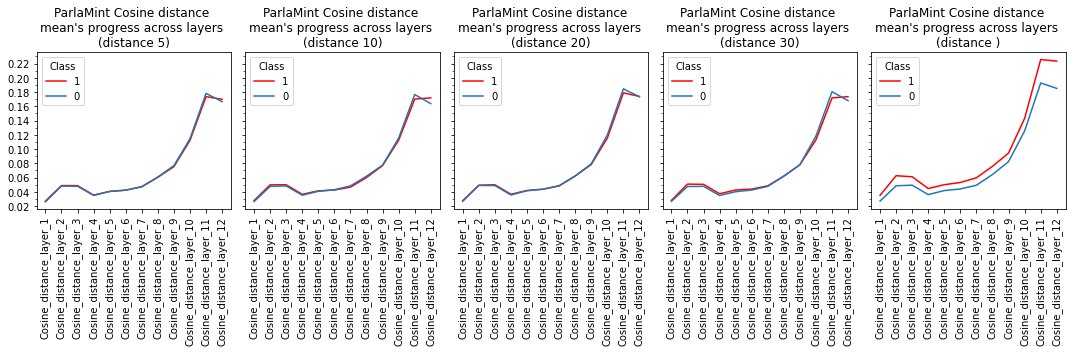

In [53]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict)

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rot

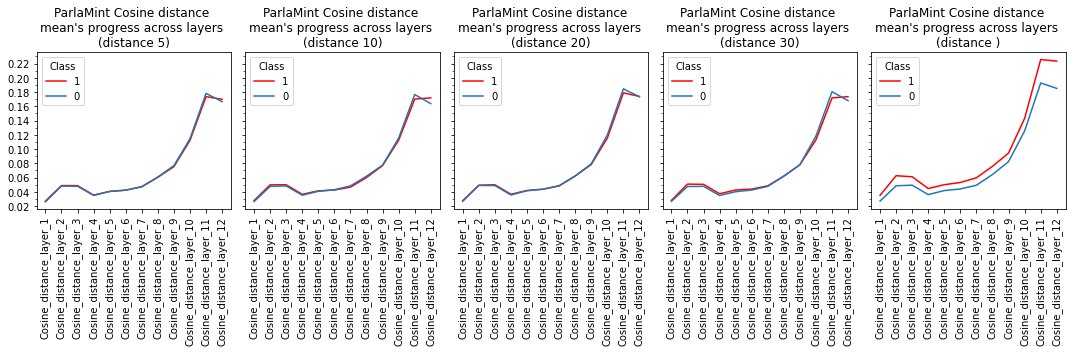

In [54]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict)

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/2966598955.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rot

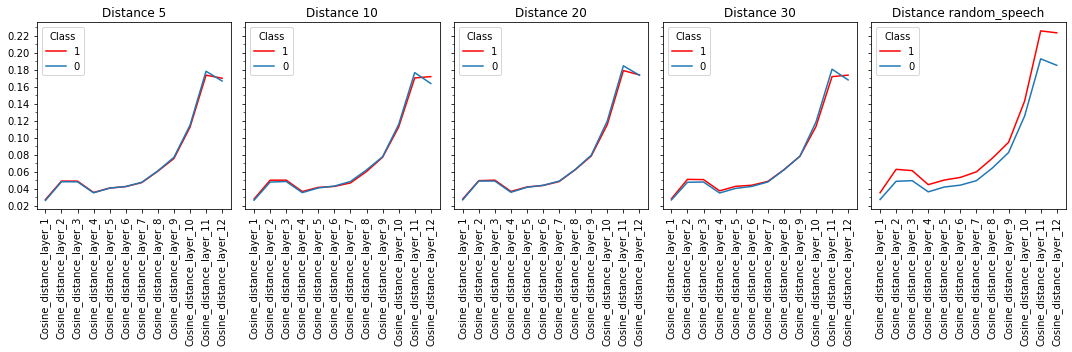

In [55]:
plot_classes_cosine_distance_progress_across_layers(df_cosine_distances_dict, 'ridotto')

In [56]:
def plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, titolo_ridotto=''):
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True)
    
    for n, distance in enumerate(df_cosine_distances_dict):
        
        #layers
        layers = [layer for layer in df_cosine_distances_dict[distance]]
        
        #medie delle distanze coseniche per le classi
        mean_values_1 = [df_cosine_distances_dict[distance][layer]['1']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]
        
        mean_values_0 = [df_cosine_distances_dict[distance][layer]['0']['Mean'] \
                       for layer in df_cosine_distances_dict[distance]]

        ax[n].plot(layers, mean_values_1, label='Eventi non consecutivi', color= 'r')
        ax[n].plot(layers, mean_values_0, label='Eventi consecutivi')
        ax[n].legend(loc='upper left')
        dist = ''.join([i for i in distance if i.isdigit()]) 
        if not dist:
            dist = 'random_speech'
        if not dist:
            dist = 'random_speech'
        title = "{} Cosine distance \nmean's progress across layers \n(distance {})".format(risorsa, ''.join([i for i in distance if i.isdigit()]))
        ax[n].set_title(title)
        if titolo_ridotto:
            title = "Distance {}".format(dist)
        ax[n].set_title(title)
        ax[n].set_xticklabels(layers, rotation=90)
        
        ax[n].yaxis.set_major_locator(MultipleLocator(0.02))
        
        ax[n].yaxis.set_minor_locator(MultipleLocator(0.01))
        
                              
    plt.tight_layout()
    
    tit = "{} Cosine distance mean's progress across layers".format(risorsa)

    if titolo_ridotto:
        fig.savefig(path_images_tit_ridotti + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    else:
        fig.savefig(path_images + tit + '.png', dpi=fig.dpi, bbox_inches='tight')
    
    plt.show()

/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/1660483217.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/1660483217.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/1660483217.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/1660483217.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rotation=90)
/var/folders/zr/x6zkwkj55dl2mb3rc8k8h1_h0000gn/T/ipykernel_1942/1660483217.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n].set_xticklabels(layers, rot

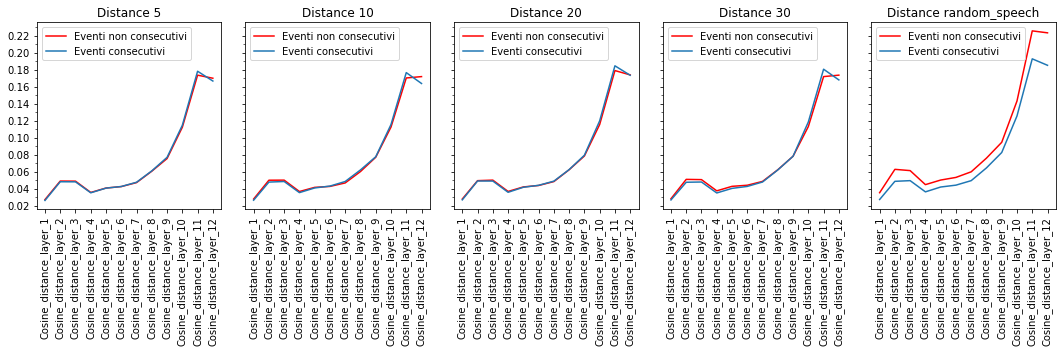

In [57]:
plot_classes_cosine_distance_progress_across_layers_con_labels_specifiche(df_cosine_distances_dict, 'ridotto')

In [58]:
df_dist_5_cosine_distance

Id                                         Sentence_1  \
0       3511            È questo «in nome del popolo italiano»?   
1     443194  Non guardiamo a soluzioni come l'erezione di m...   
2     438394  La popolazione carceraria è scesa a 52.164 e s...   
3     313751  Mi fermo perché non voglio offendere nessuno, ...   
4     488165  La prima riunione europea dei Ministri della s...   
...      ...                                                ...   
2395   35231  Non è un caso che il Governo e la maggioranza ...   
2396  300044  Anzi, svolse sempre con passione e consapevole...   
2397   74207  È chiaro che una catastrofe delle dimensioni d...   
2398  390608  Se doveva cadere così in basso, era più dignit...   
2399  187838  Non ci sono parole per ringraziare i nostri me...   

                                             Sentence_2  Class  \
0     Signor Presidente, ho chiesto di intervenire a...      1   
1     Tutto ciò deve necessariamente avvenire attrav...      1   
2     Sei anni fa i detenuti erano 67.971 e 21.494 l...      0   
3                                     Ci ridono dietro!      1   
4     Siamo un grande Paese, che ha svolto un lavoro...      1   
...                                                 ...    ...   
2395  Ma neanche il testo di mediazione che la Commi...      0   
2396  Con lui scompare una figura importante della s...      0   
2397  Cito, prima di invitare l'Assemblea all'approv...      1   
2398  Un'Assemblea tanto grande quanto debole, i cui...      1   
2399  Penso allo sconforto di chi ha perso un genito...      1   

      Cosine_distance_layer_1  Cosine_distance_layer_2  \
0                      0.0389                   0.0744   
1                      0.0124                   0.0260   
2                      0.0130                   0.0277   
3                      0.0559                   0.0784   
4                      0.0201                   0.0299   
...                       ...                      ...   
2395                   0.0427                   0.0588   
2396                   0.0188                   0.0342   
2397                   0.0250                   0.0534   
2398                   0.0349                   0.0850   
2399                   0.0202                   0.0455   

      Cosine_distance_layer_3  Cosine_distance_layer_4  \
0                      0.0671                   0.0486   
1                      0.0184                   0.0151   
2                      0.0341                   0.0217   
3                      0.0858                   0.0645   
4                      0.0267                   0.0151   
...                       ...                      ...   
2395                   0.0769                   0.0474   
2396                   0.0239                   0.0180   
2397                   0.0756                   0.0465   
2398                   0.0874                   0.0495   
2399                   0.0556                   0.0389   

      Cosine_distance_layer_5  Cosine_distance_layer_6  \
0                      0.0503                   0.0466   
1                      0.0161                   0.0159   
2                      0.0200                   0.0163   
3                      0.0745                   0.0717   
4                      0.0153                   0.0137   
...                       ...                      ...   
2395                   0.0479                   0.0595   
2396                   0.0247                   0.0227   
2397                   0.0647                   0.0588   
2398                   0.0510                   0.0459   
2399                   0.0412                   0.0429   

      Cosine_distance_layer_7  Cosine_distance_layer_8  \
0                      0.0550                   0.1028   
1                      0.0244                   0.0252   
2                      0.0177                   0.0198   
3                      0.1765                   0.2912   
4                      0.0146  

In [23]:
def plot_mean_and_stdev(df):
    
    for layer in range(1,13):
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
        
        for cl in [0, 1]:
            
            sns.distplot(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)], \
                        bins = 'auto', hist=True, hist_kws={'edgecolor' : 'k', 'color':'c', 'alpha':0.3}, \
                         ax=ax[cl], fit=norm, kde_kws={'lw':2, 'label':'KDE', 'color':'red'}, \
                         fit_kws={'label':'Normal distribution', 'color':'blue'})

            m = statistics.mean(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            sd = statistics.stdev(df[df['Class'] == cl]['Cosine_distance_layer_{}'.format(layer)])
            print("Mean: %.4f" %m)
            print("StDev: %.4f" %sd)
            ax[cl].axvline(m, color = 'k', linestyle='dashed', label='Mean')
            ax[cl].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
            ax[cl].axvline(m - sd, color='orange', linestyle='dashed')

            handles, labels = ax[cl].get_legend_handles_labels()
            ax[cl].legend(handles, labels, title = "Mean and stdev")
            
            ax[cl].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                            "Non segue" if cl == 1 else "Segue"))
            
            ax[cl].set_xlabel("Cosine distances")
            
        
        plt.tight_layout()
        plt.show()

In [24]:
def plot_mean_and_stdev_vecchio(df):
        
    for layer in range(1,13):
        
        ax[0] = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, edgecolor= 'k', color='c', alpha=0.3, \
                   )

        
        m = statistics.mean(df['Cosine_distance_layer_{}'.format(layer)])
        sd = statistics.stdev(df['Cosine_distance_layer_{}'.format(layer)])
        print("Mean: %.4f" %m)
        print("StDev: %.4f" %sd)
        ax[0].axvline(m, color = 'k', linestyle='dashed', label='Mean')
        ax[0].axvline(m + sd, color='orange', linestyle='dashed', label='Mean ± stdev')
        ax[0].axvline(m - sd, color='orange', linestyle='dashed')

        handles, labels = ax[0].get_legend_handles_labels()
        ax[0].legend(handles, labels, title = "Mean and stdev")
        

        ax[0].set_title("{} Layer {} mean and standard deviation of class {} ({})".format(risorsa, layer, cl, \
                                                                        "Non segue" if cl == 1 else "Segue"))

        ax[0].set_xlabel("Cosine distances")
        
        #sns.displot(data=df, x=df['Cosine_distance_layer_1'], kind='kde', hue='Class', ax=ax[1])
            
        
        plt.tight_layout()
        plt.show()

In [25]:
def plot_mean_and_standard_deviation(df, stat, color):
    
    for layer in range(1,13):
        g = sns.displot(df, x=df['Cosine_distance_layer_{}'.format(layer)], \
                    bins = 'auto', kde=True, col='Class', stat=stat, color=color)
        
        diz_c_mean = {'cornflowerblue': 'deeppink',
                     'darkorange': 'darkolivegreen',
                      'purple': 'darkorange',
                      'orangered': 'blue',
                      'forestgreen': 'darkslategrey'
                     }
        def stats(x, **kwargs):
            plt.axvline(statistics.mean(x), c='k', ls='dashed', label='Mean')
            plt.axvline(statistics.mean(x) + statistics.stdev(x), c=diz_c_mean[color], ls='dashed', label='Mean ± stdev')
            plt.axvline(statistics.mean(x) - statistics.stdev(x), c=diz_c_mean[color], ls='dashed')

        g.map(stats,'Cosine_distance_layer_{}'.format(layer))
        plt.legend(bbox_to_anchor=(1.4, 1))
    plt.show()

### Count

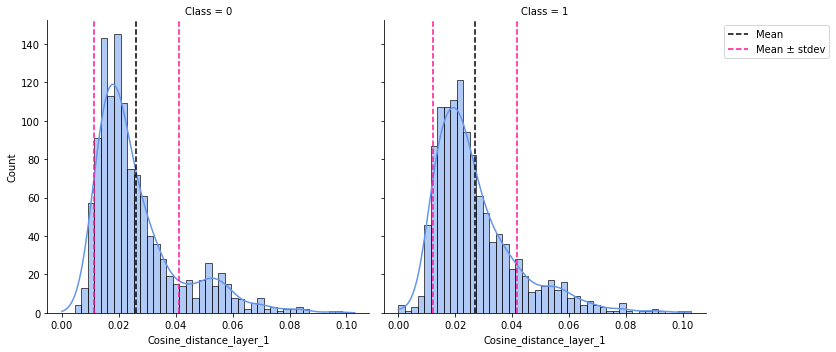

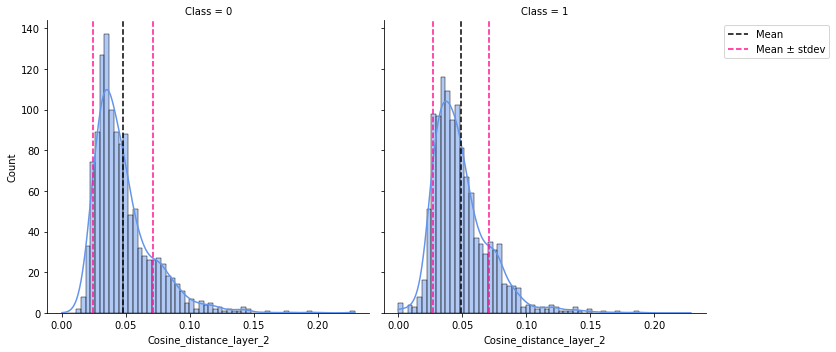

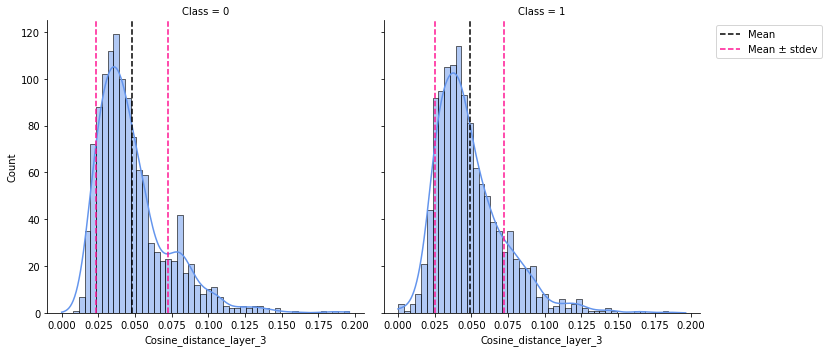

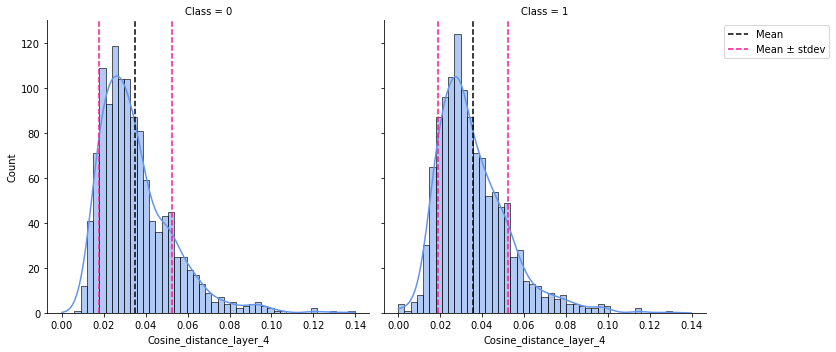

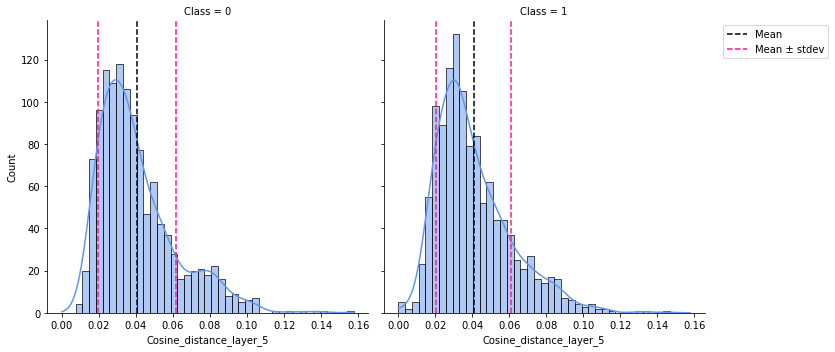

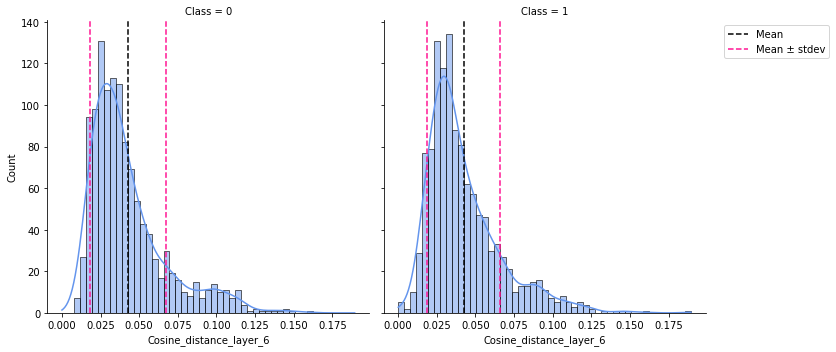

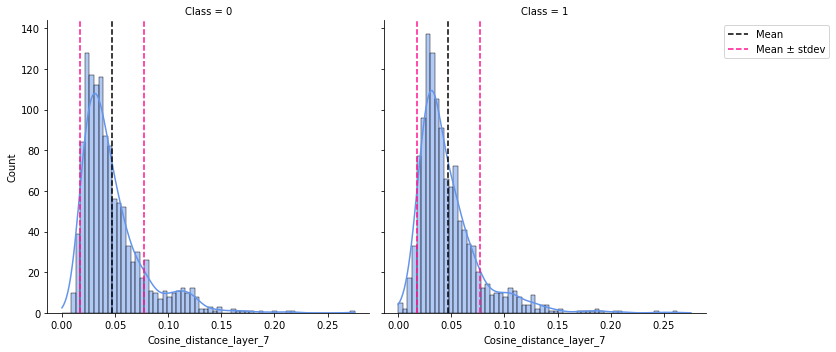

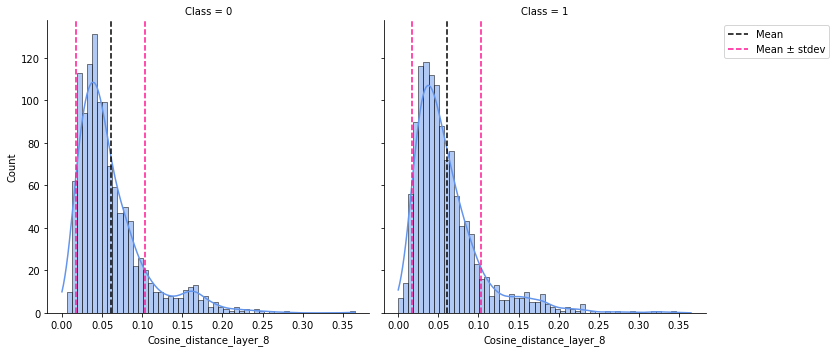

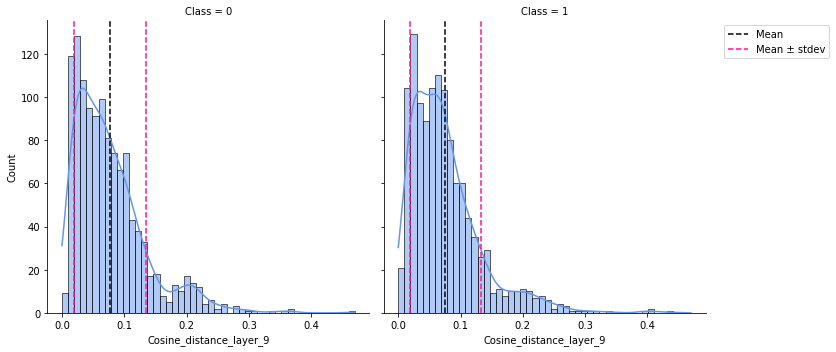

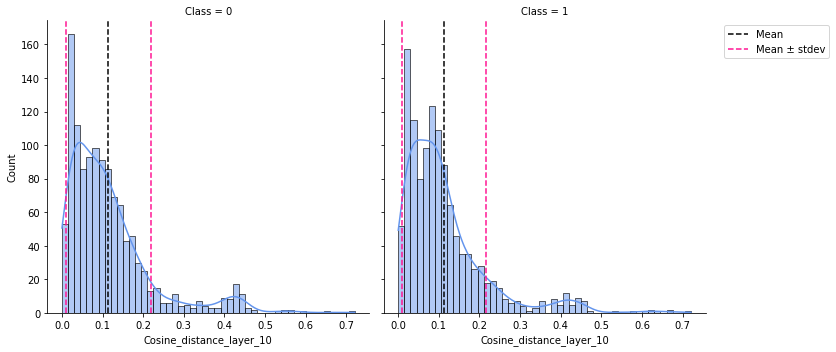

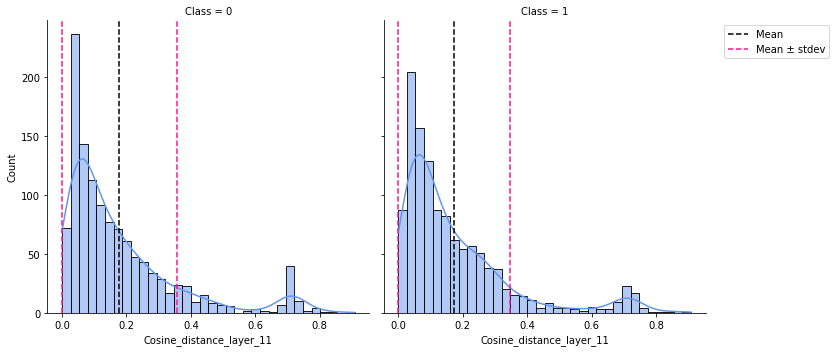

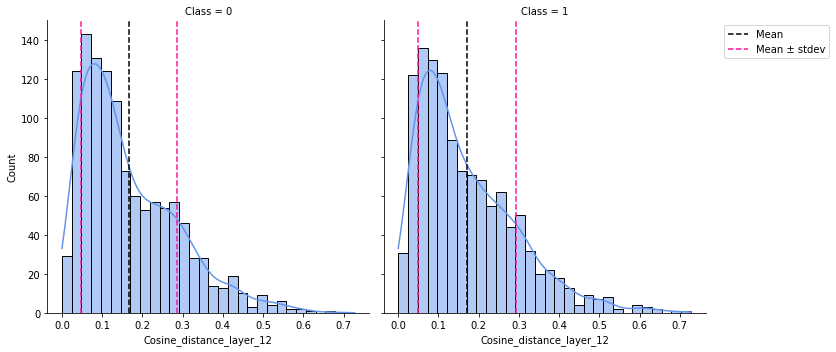

In [26]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance, 'count', 'cornflowerblue')

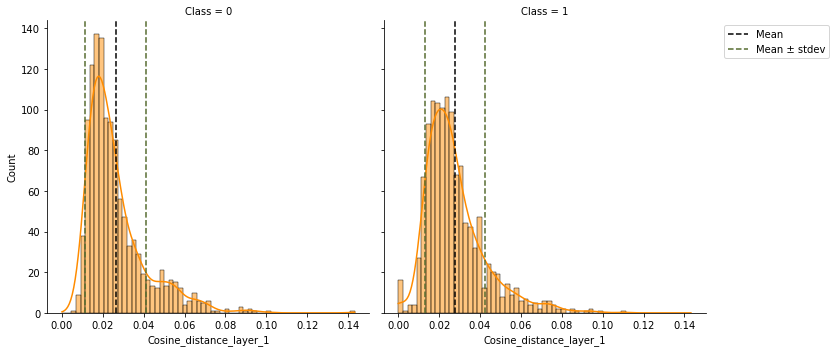

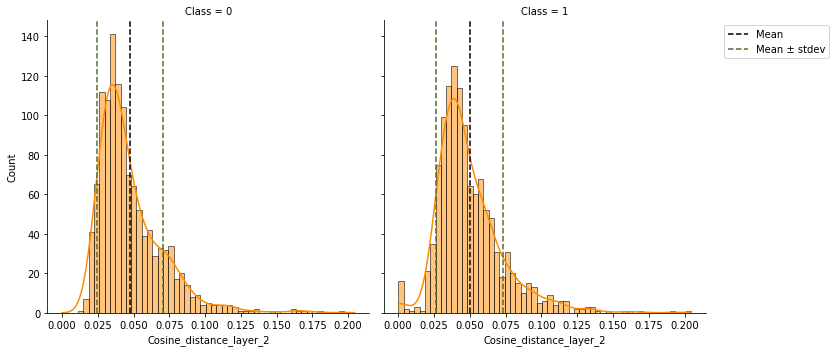

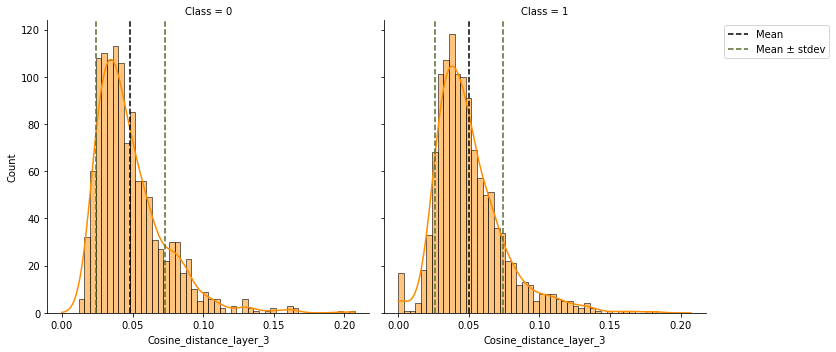

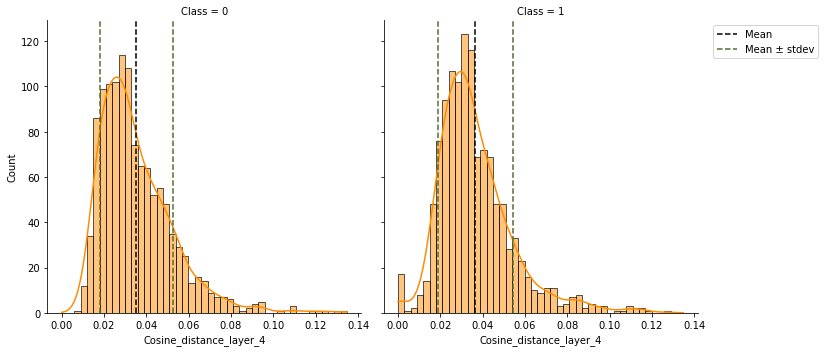

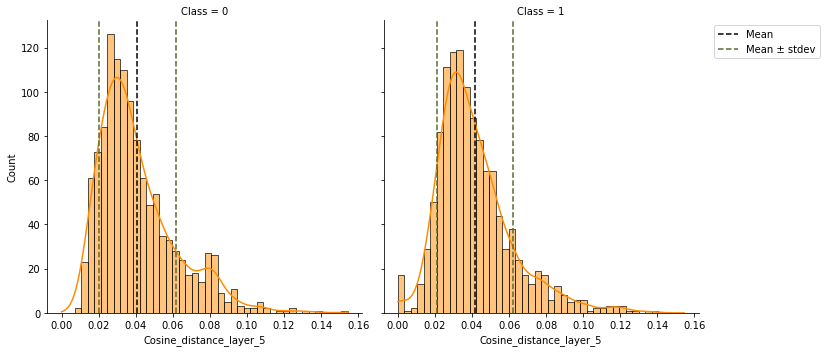

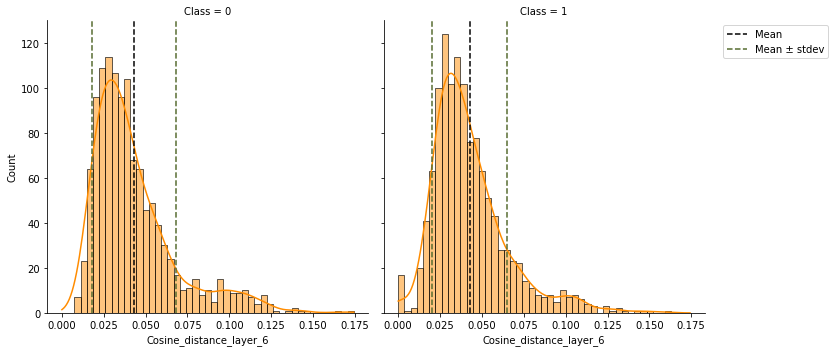

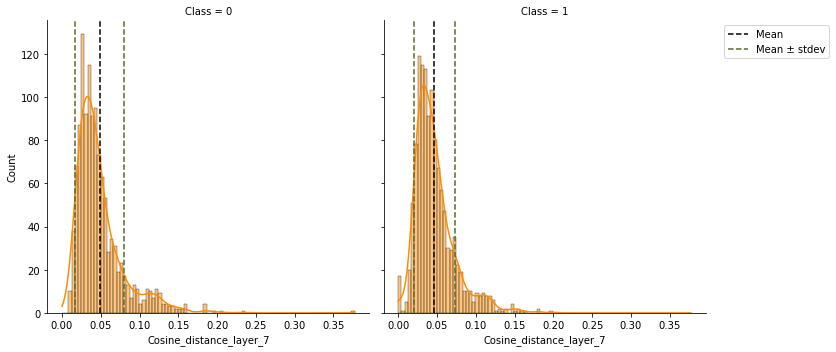

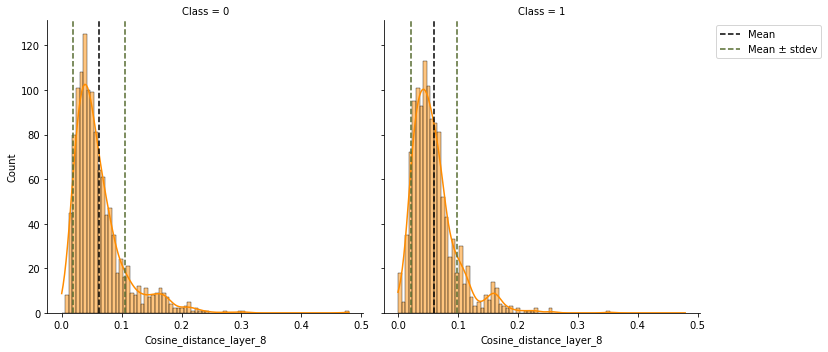

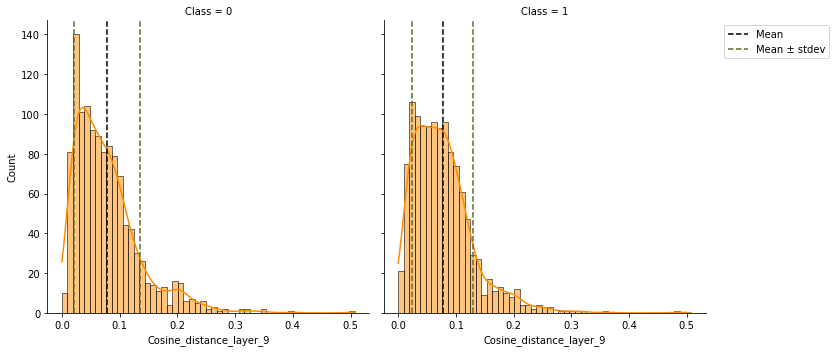

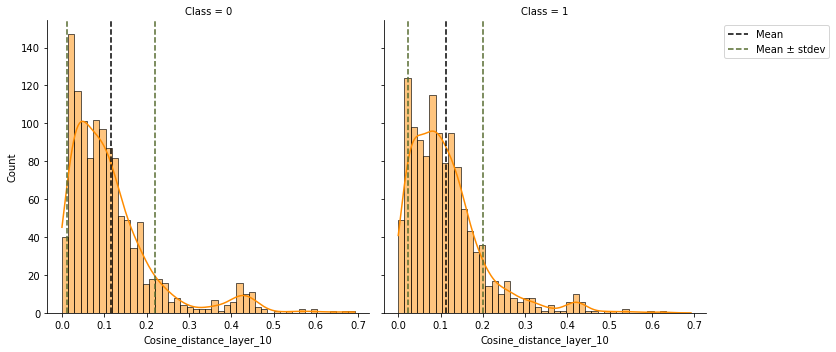

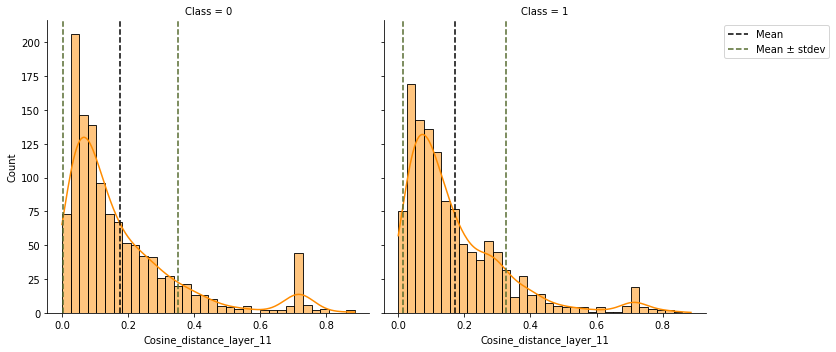

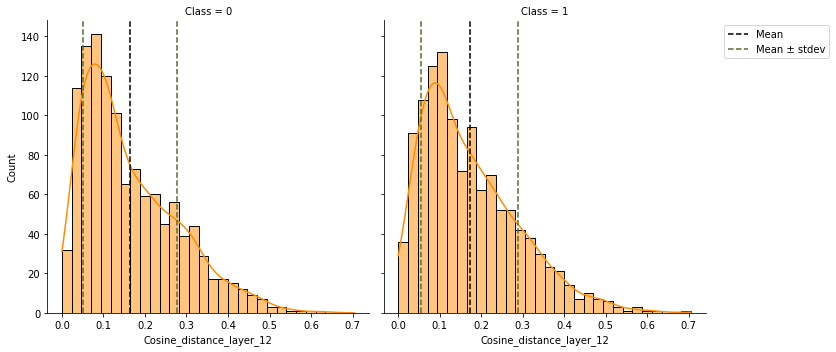

In [27]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance, 'count', 'darkorange')

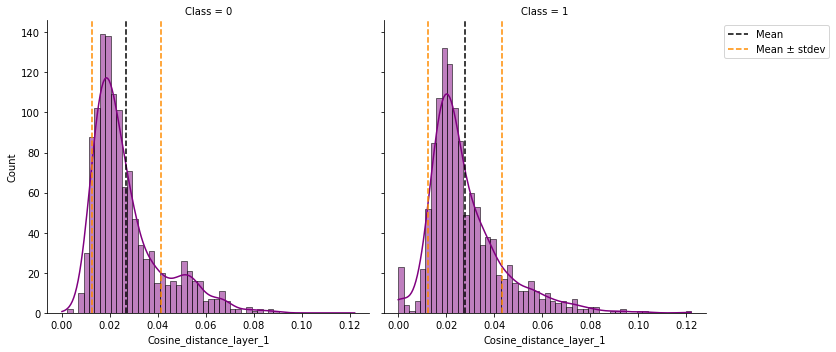

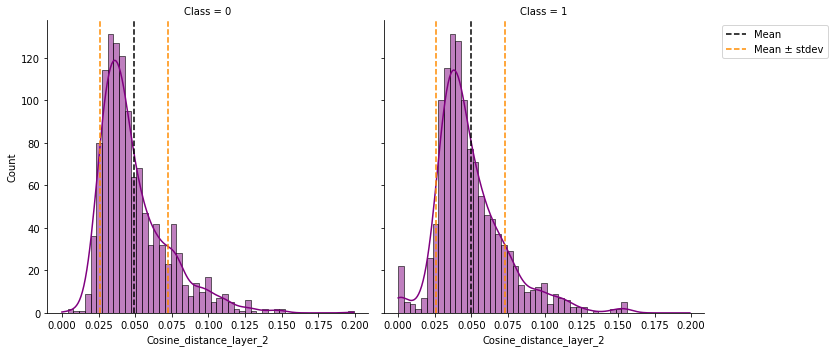

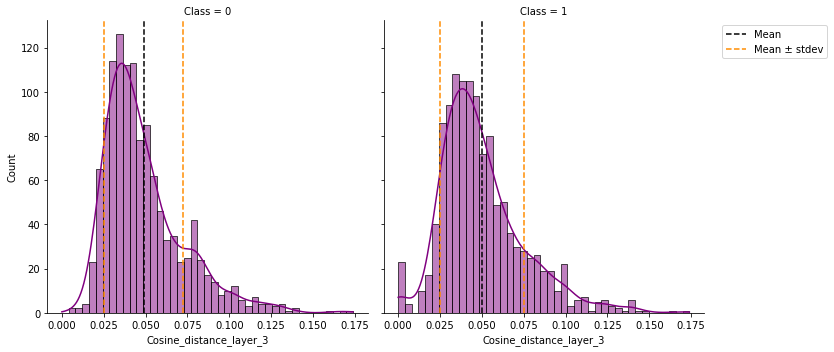

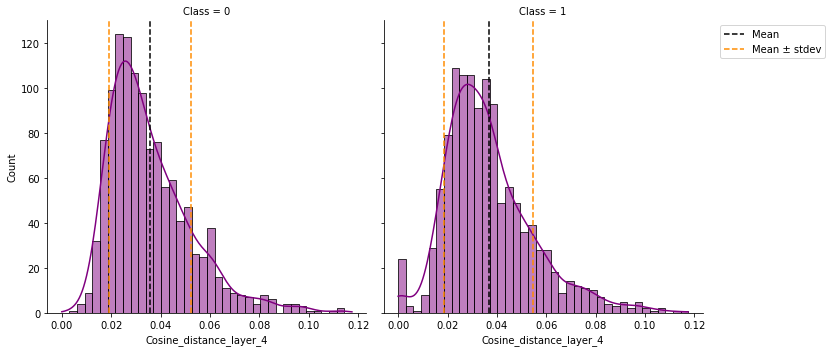

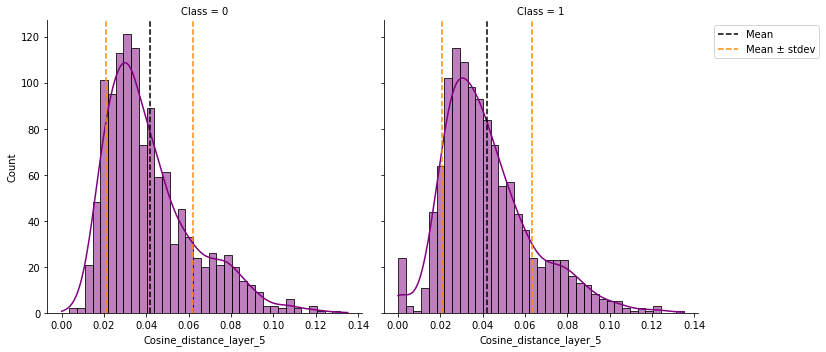

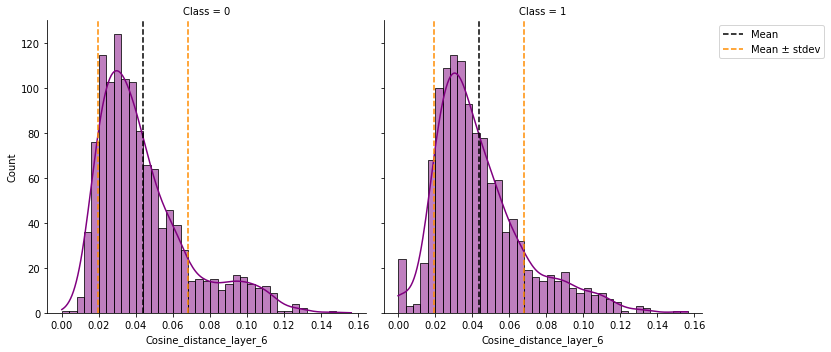

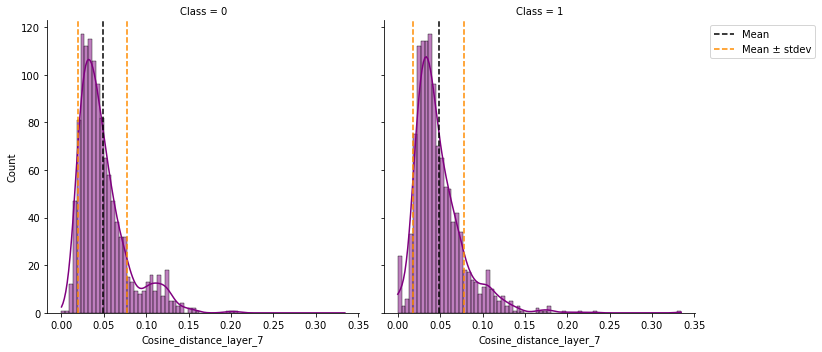

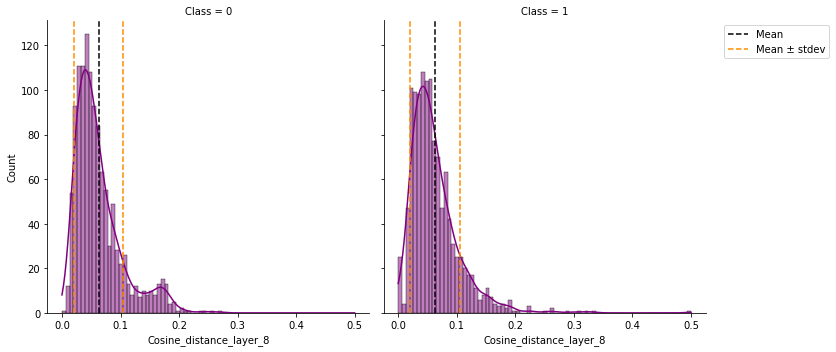

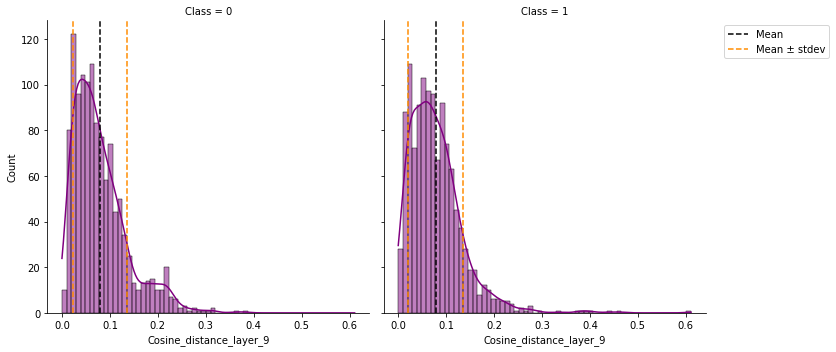

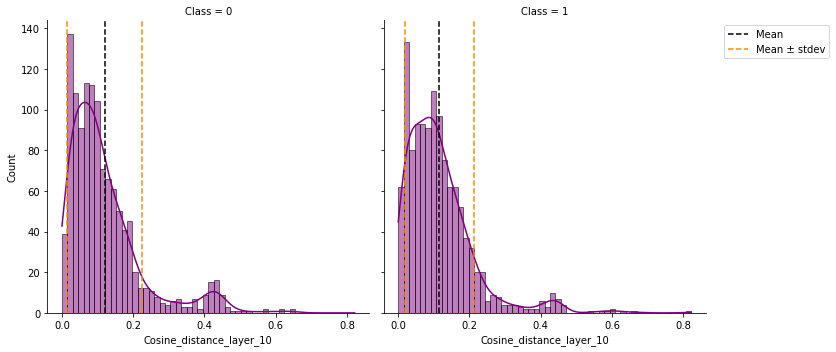

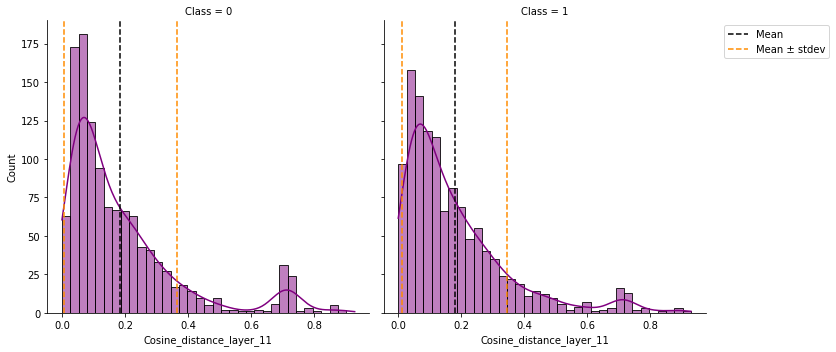

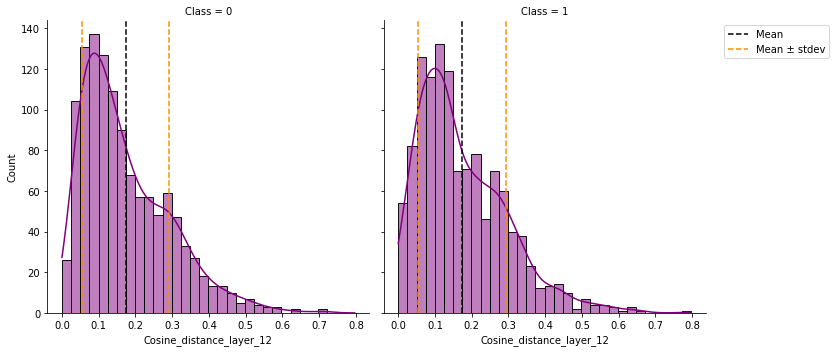

In [28]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance, 'count', 'purple')

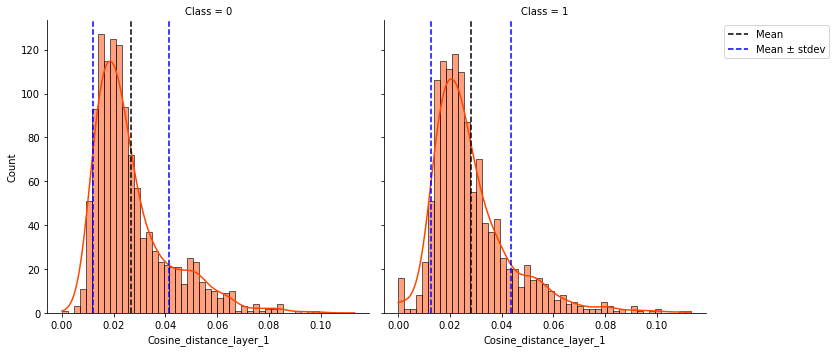

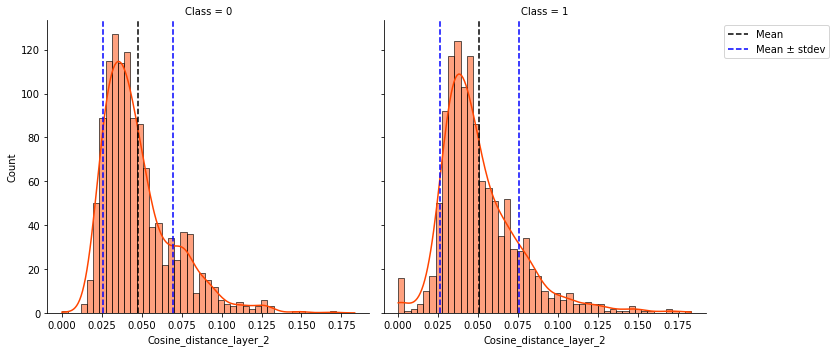

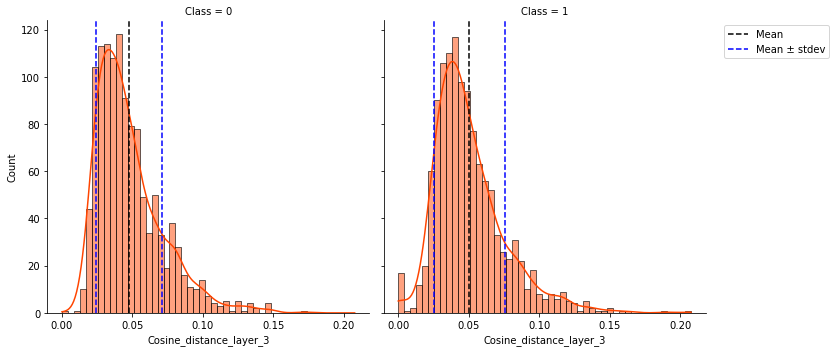

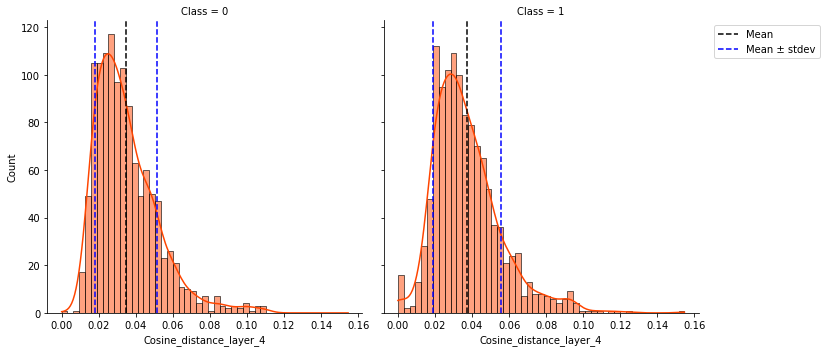

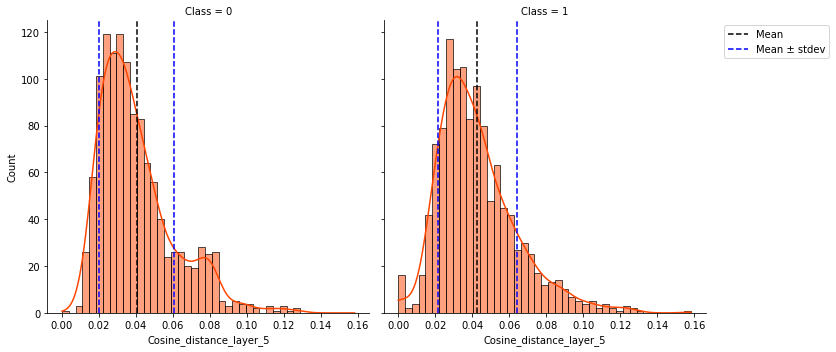

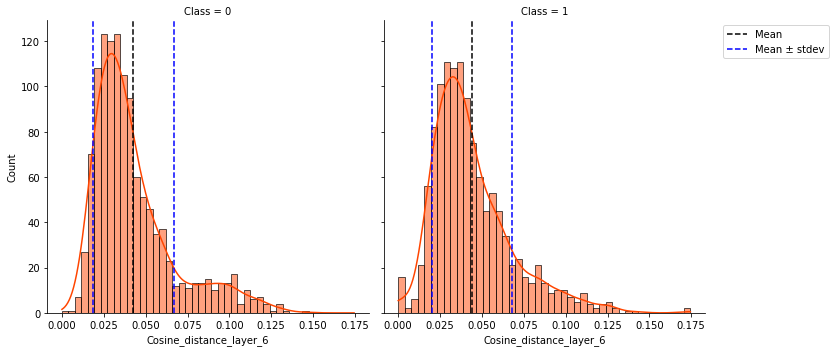

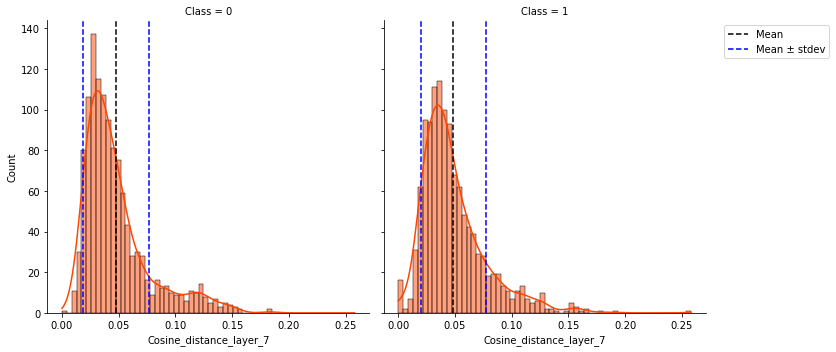

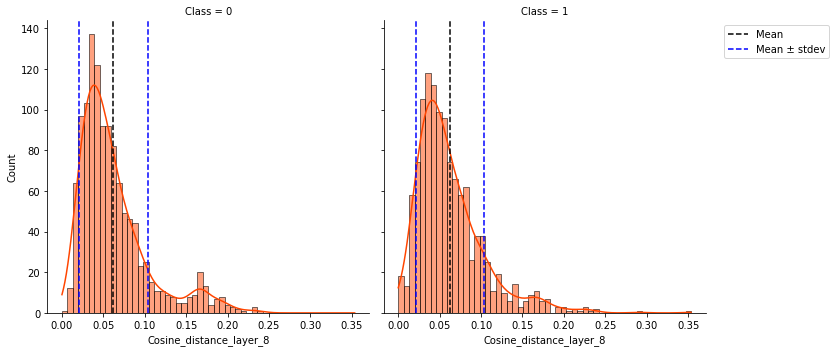

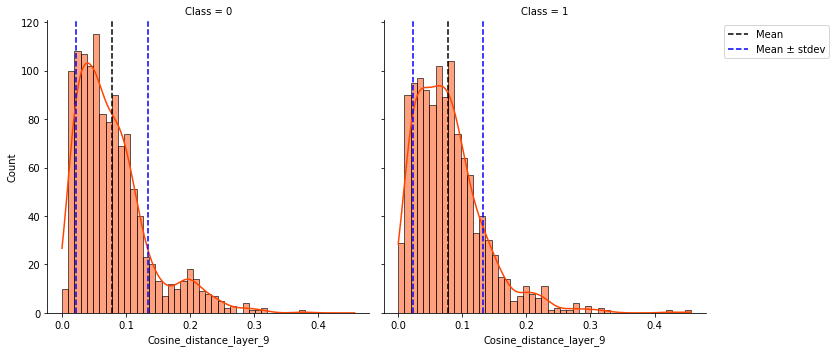

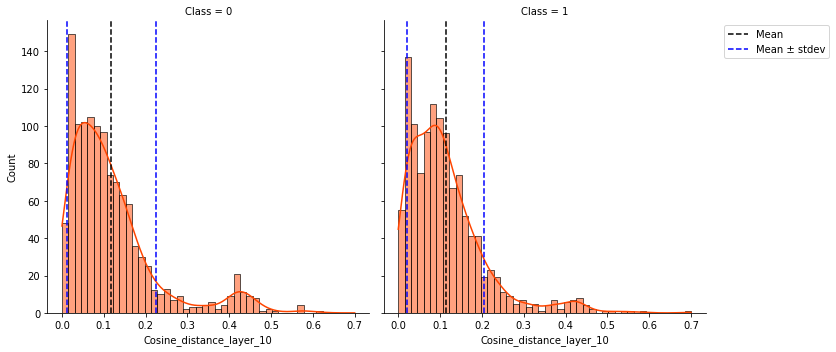

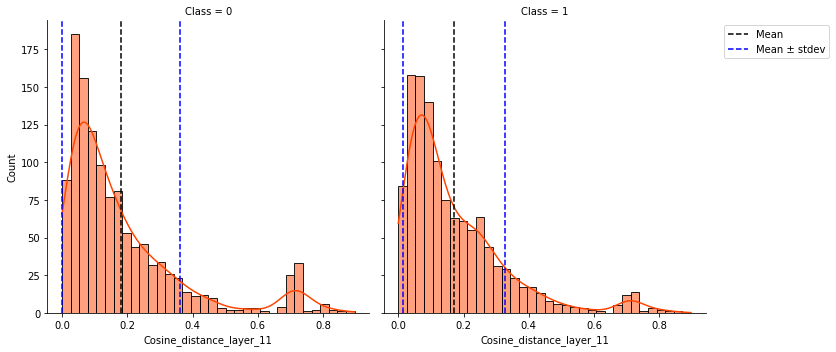

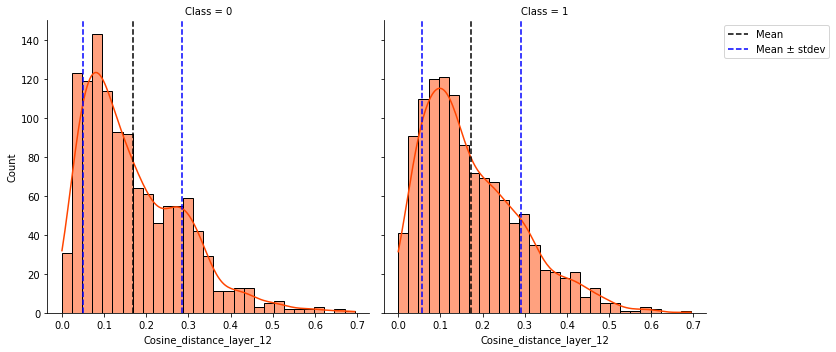

In [29]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance, 'count', 'orangered')

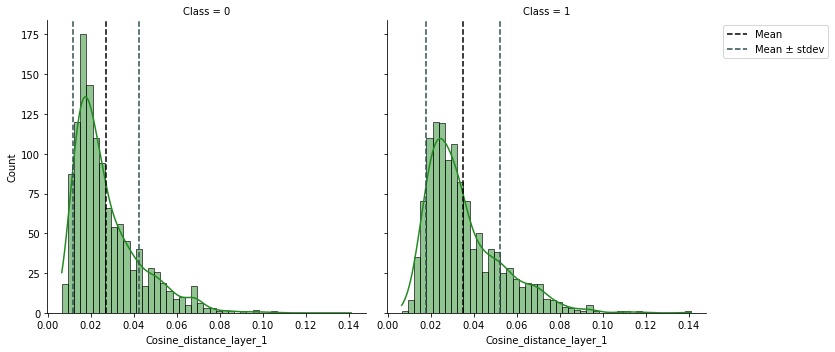

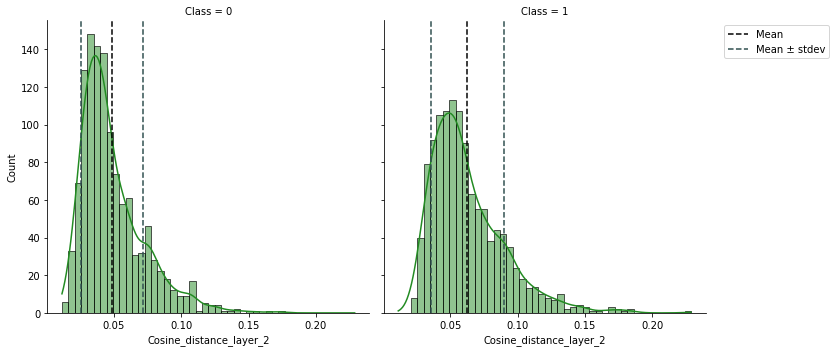

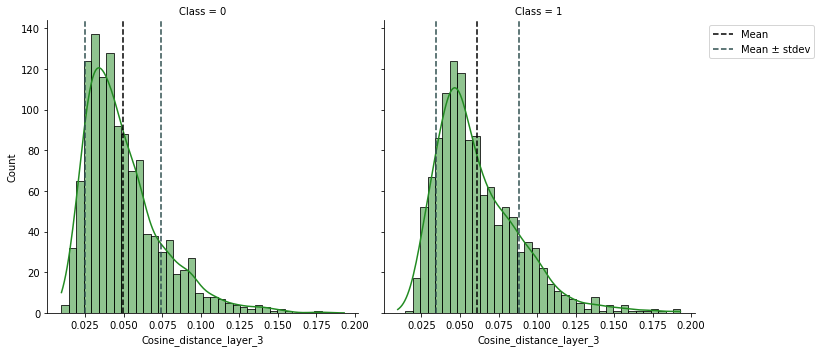

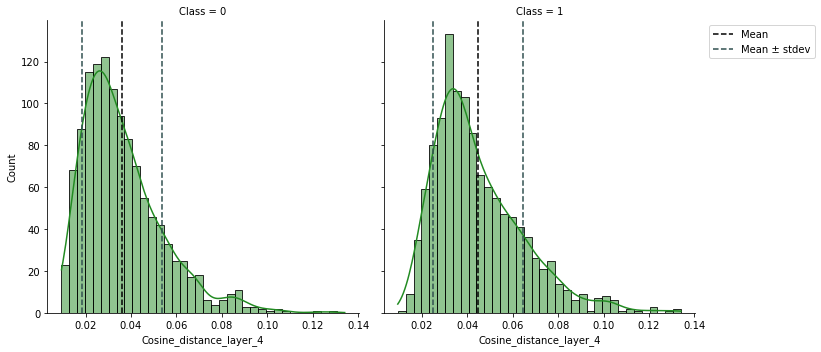

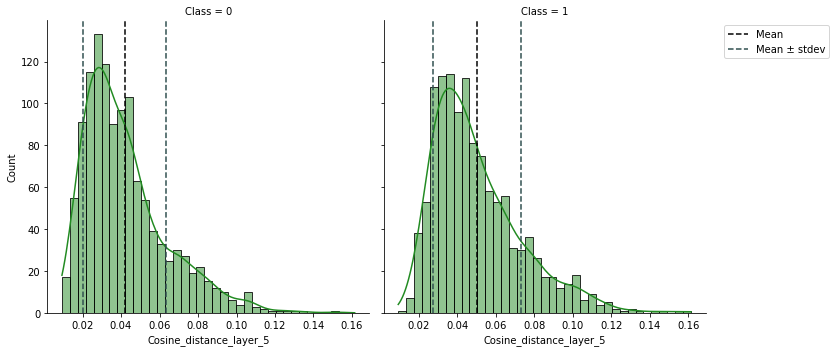

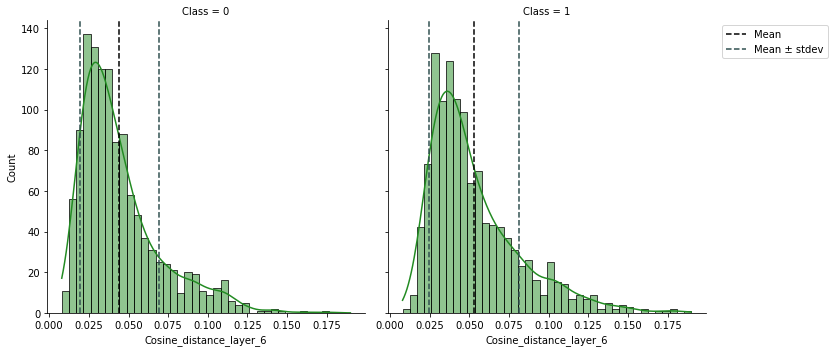

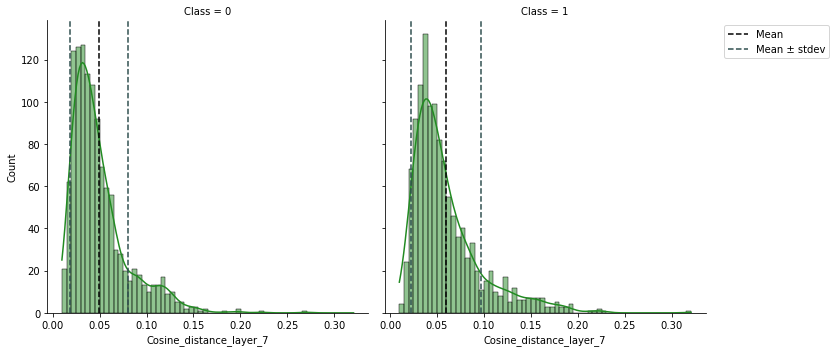

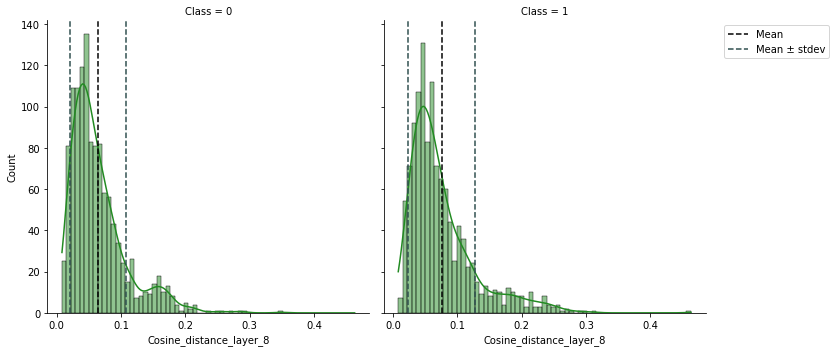

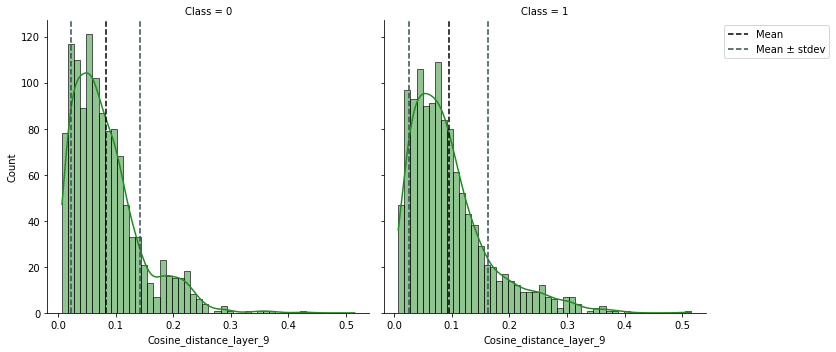

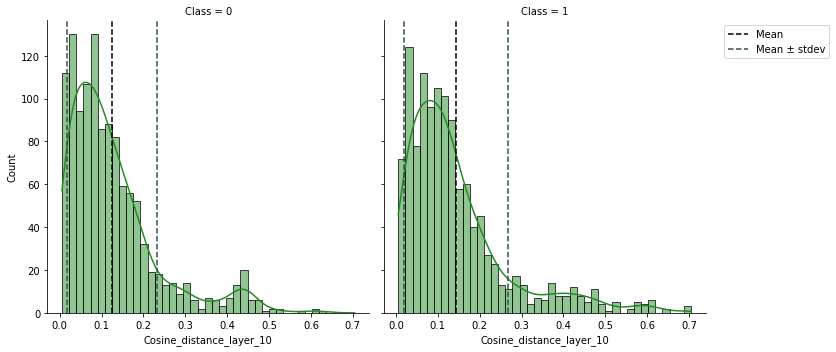

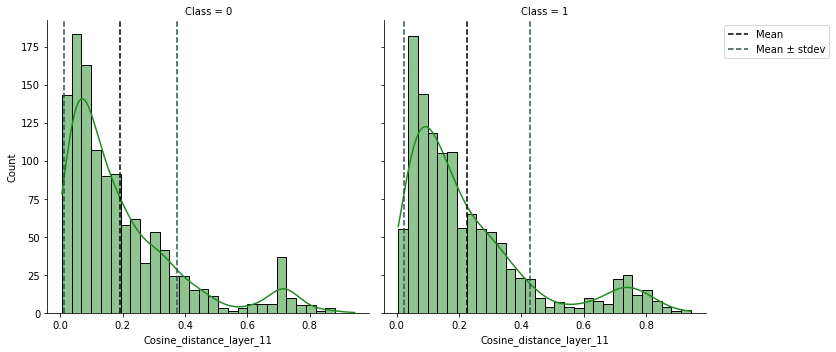

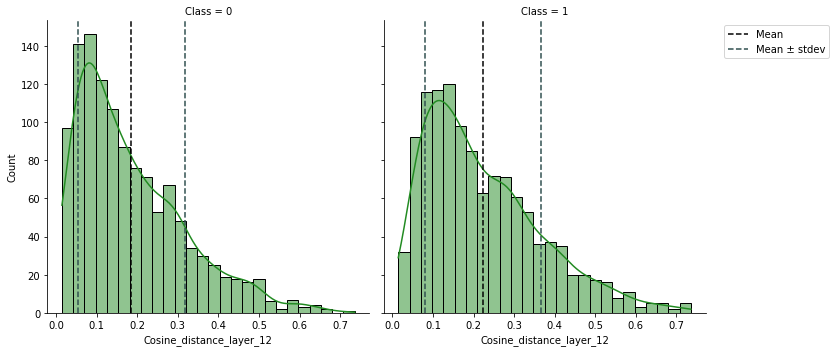

In [30]:
plot_mean_and_standard_deviation(df_random_speech_cosine_distance, 'count', 'forestgreen')

### Density

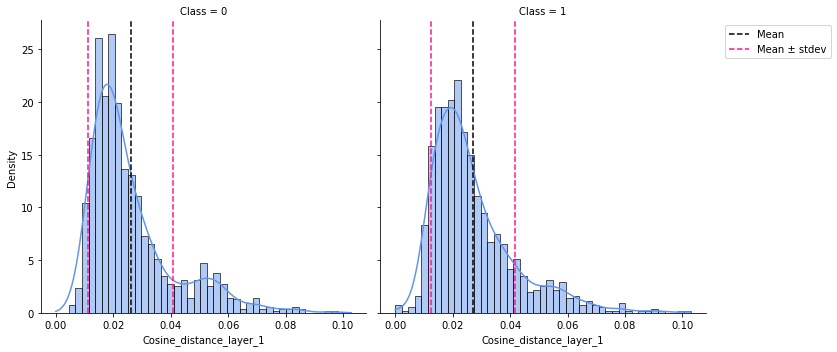

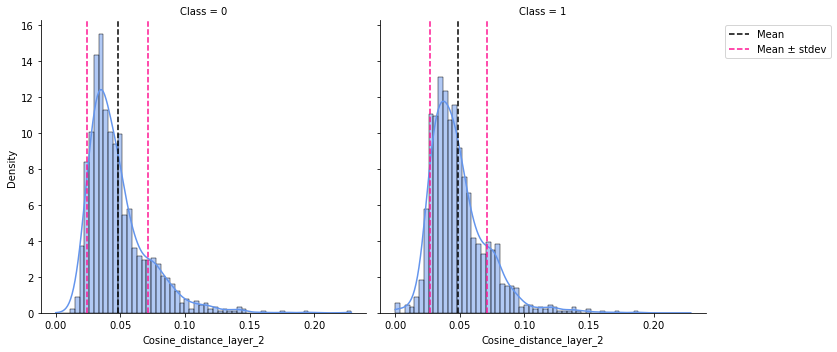

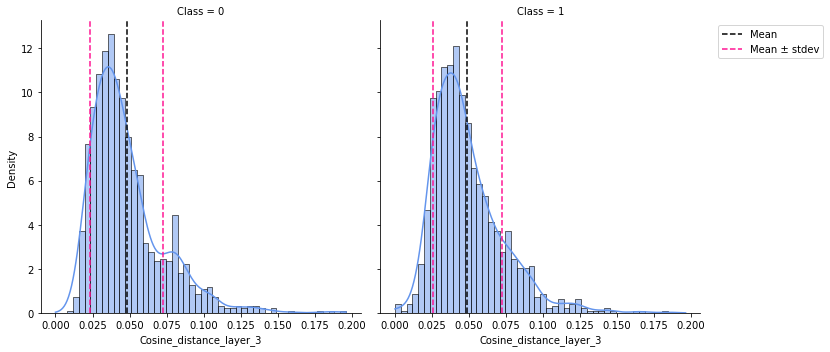

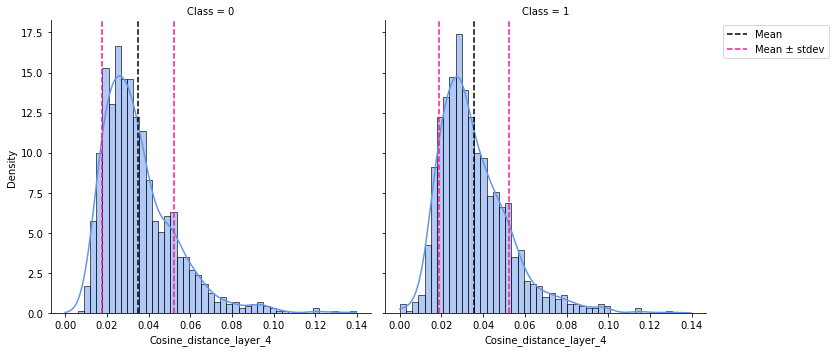

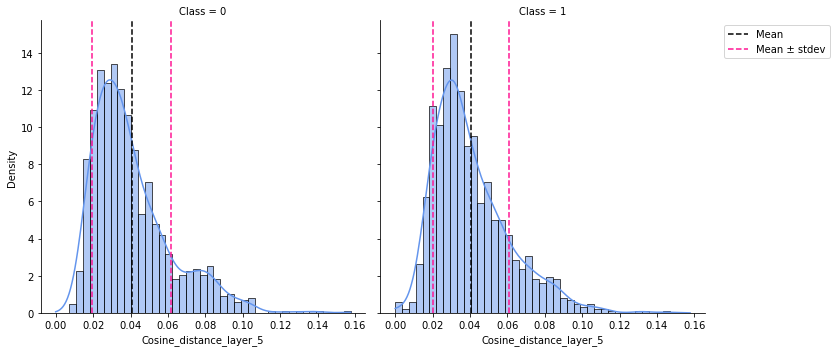

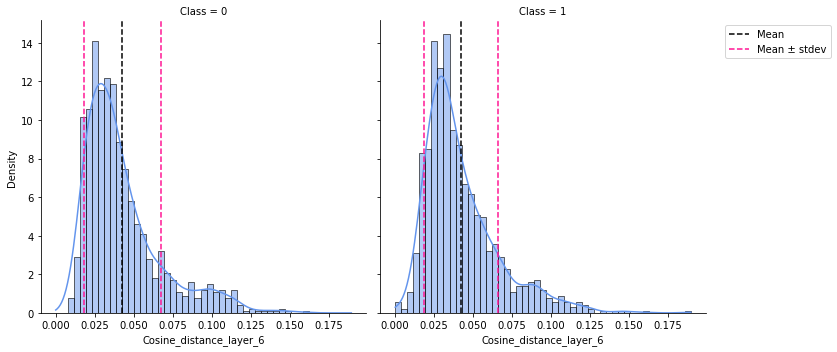

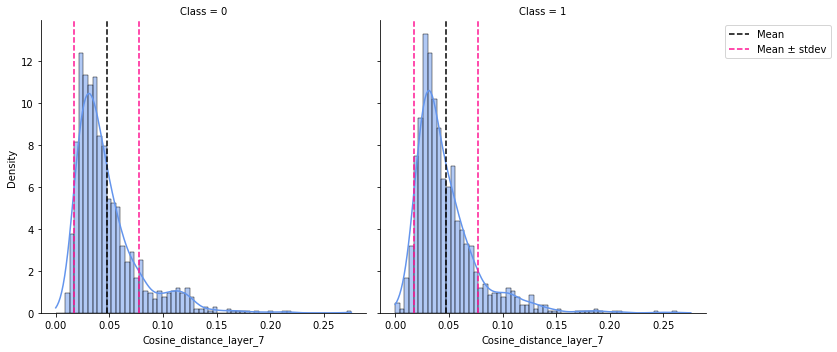

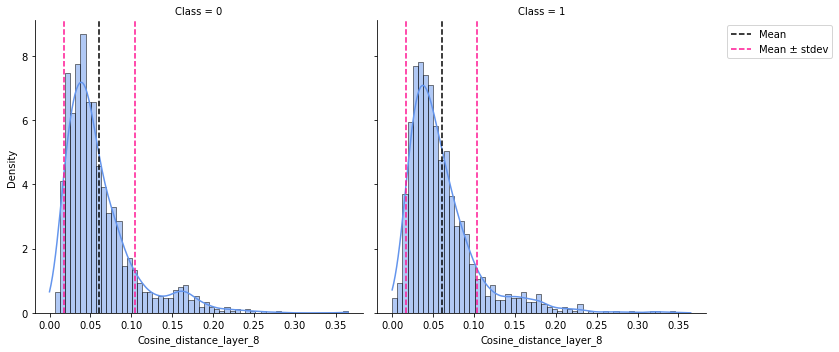

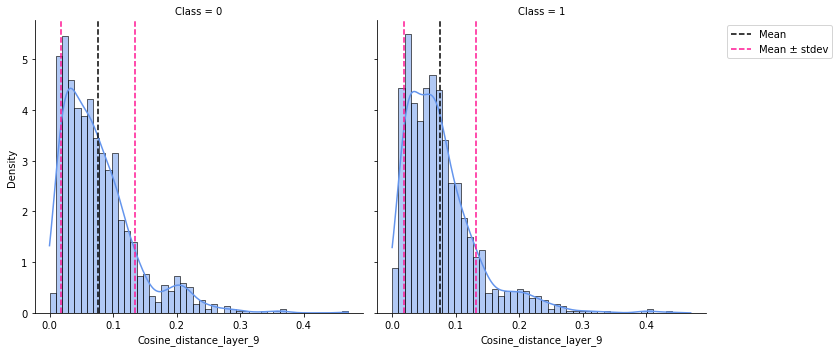

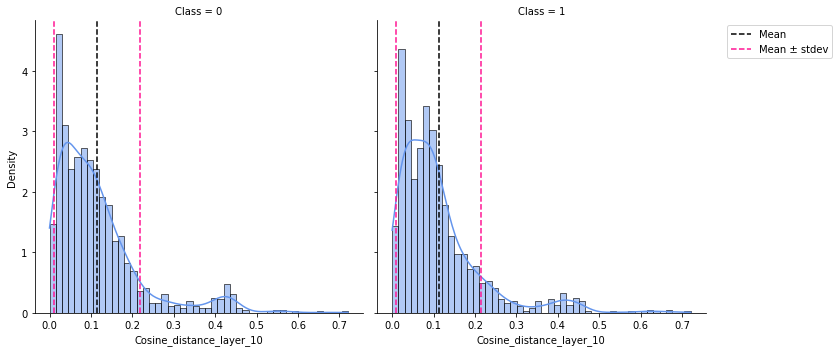

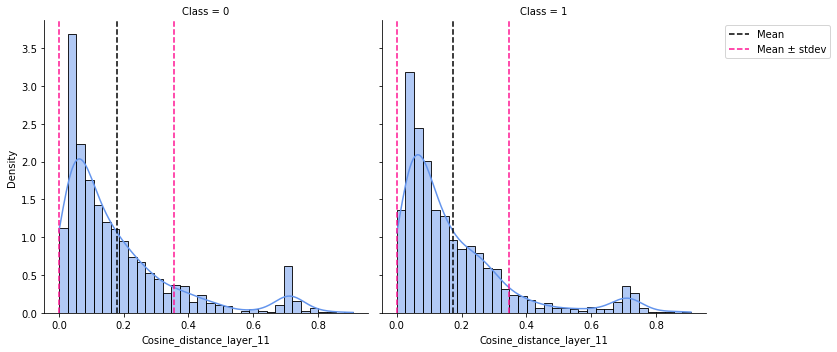

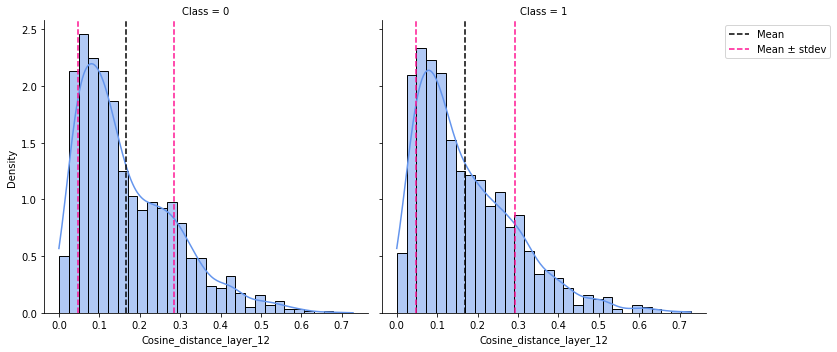

In [31]:
plot_mean_and_standard_deviation(df_dist_5_cosine_distance, 'density', 'cornflowerblue')

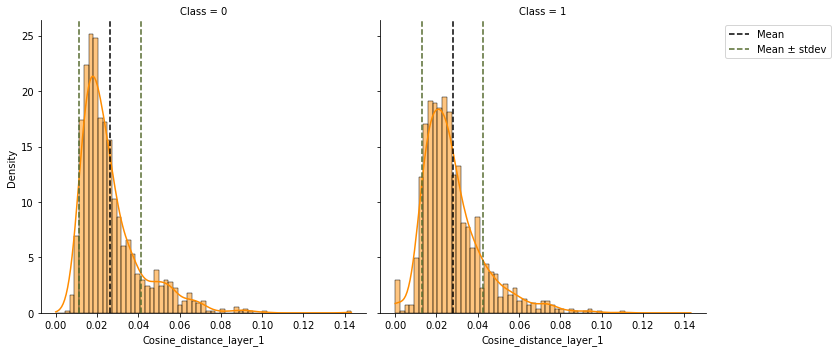

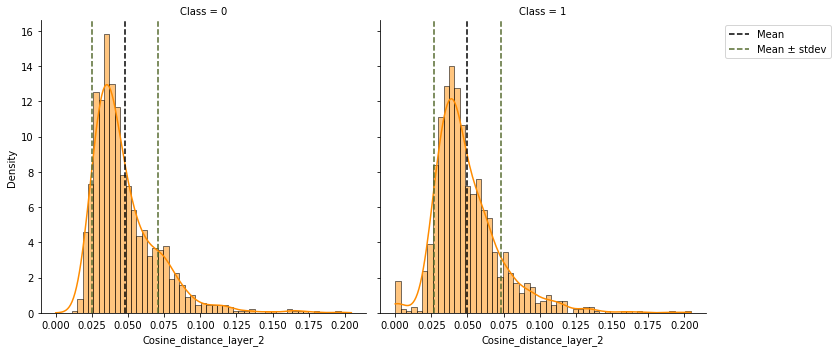

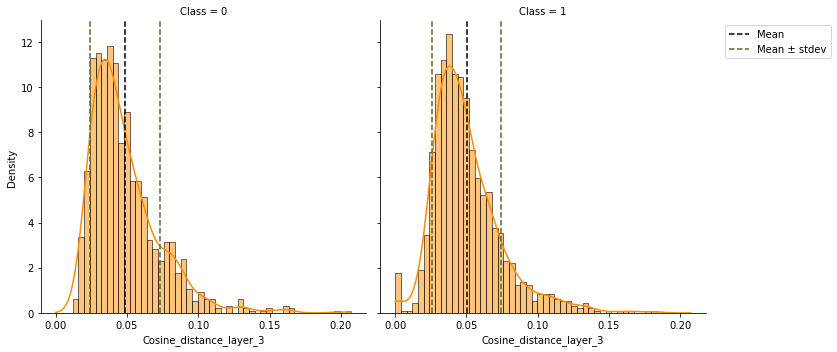

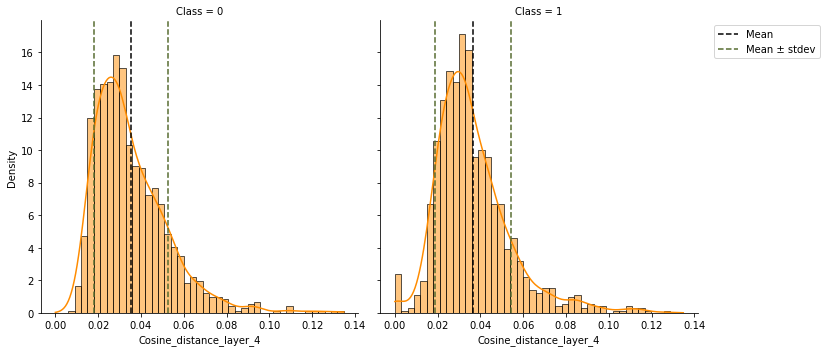

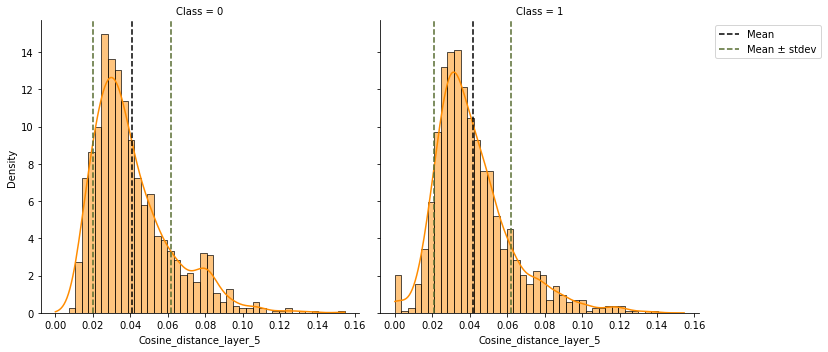

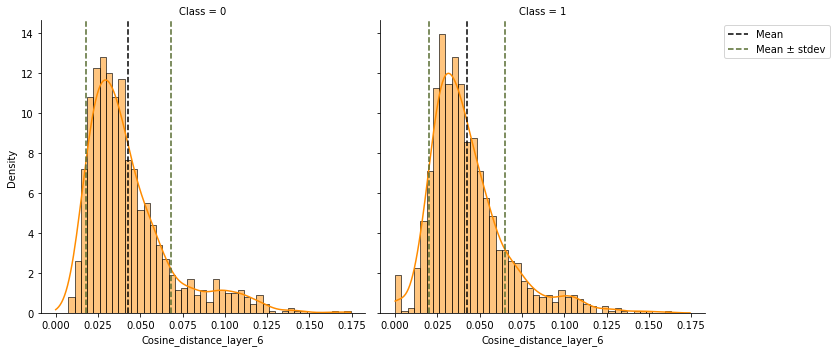

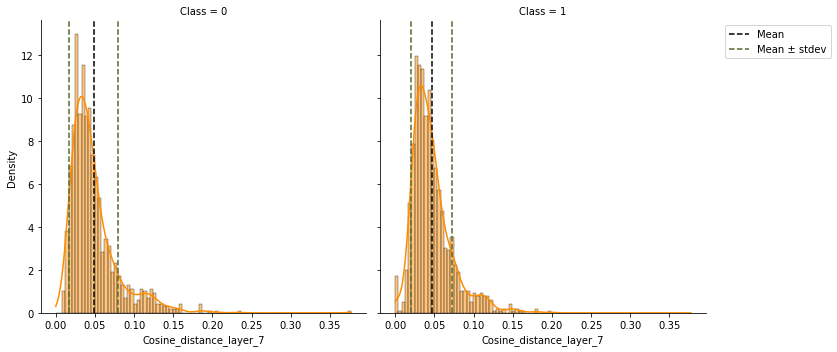

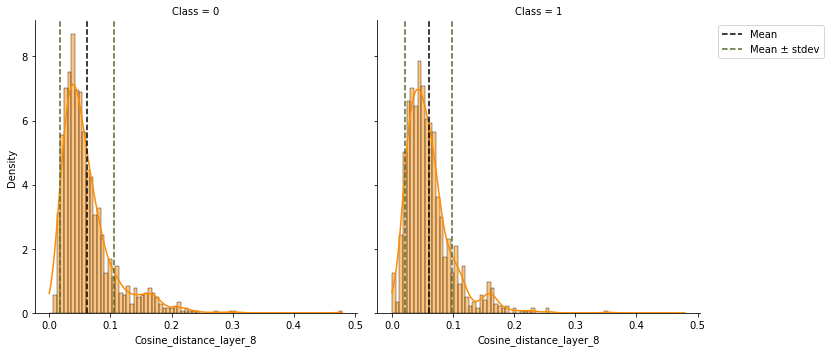

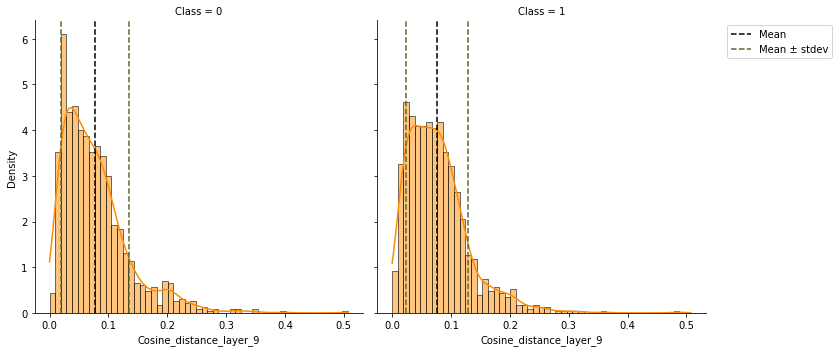

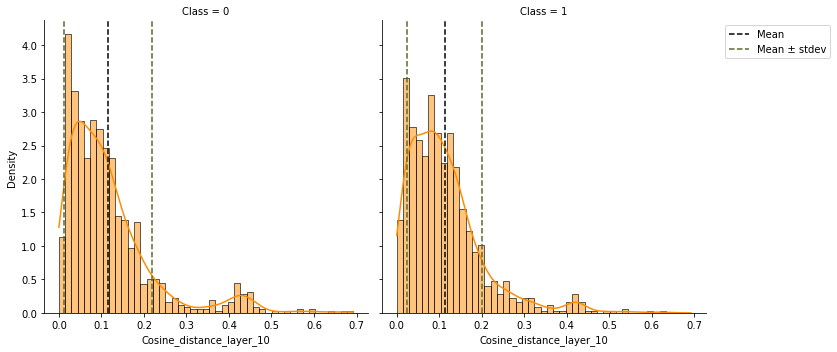

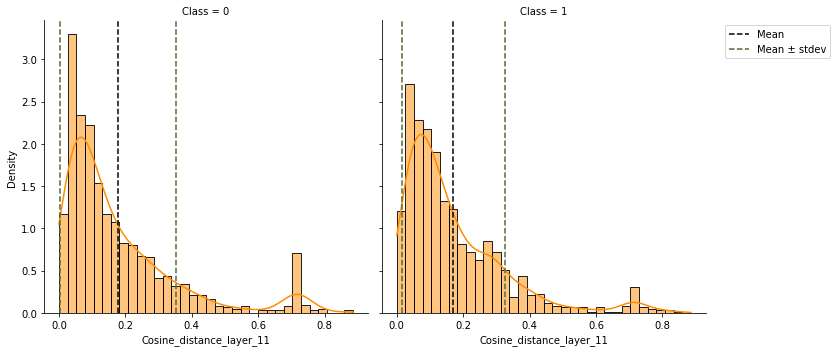

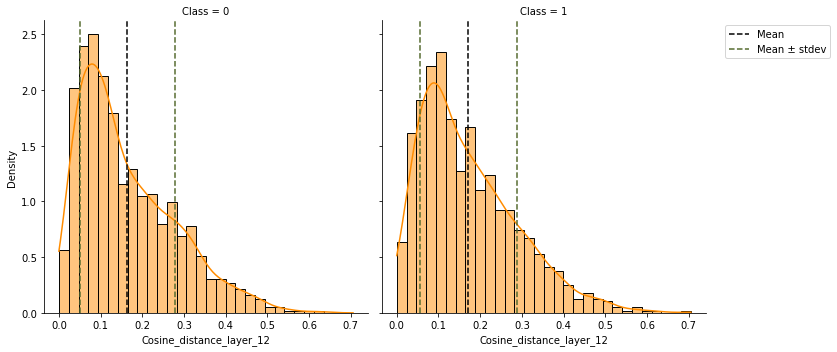

In [32]:
plot_mean_and_standard_deviation(df_dist_10_cosine_distance, 'density', 'darkorange')

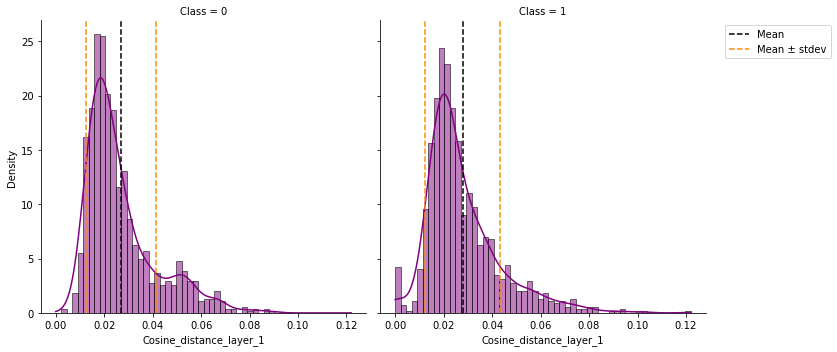

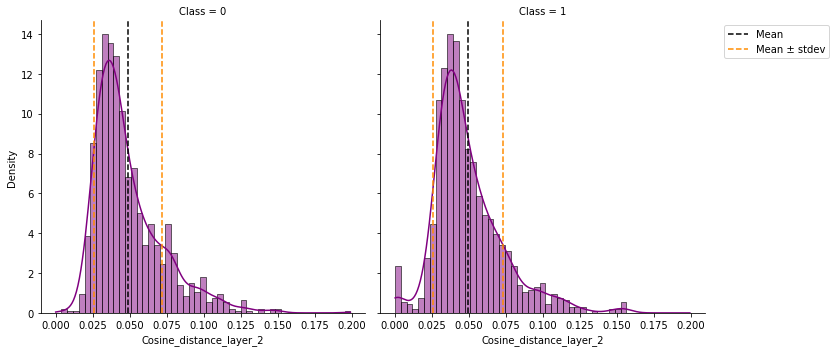

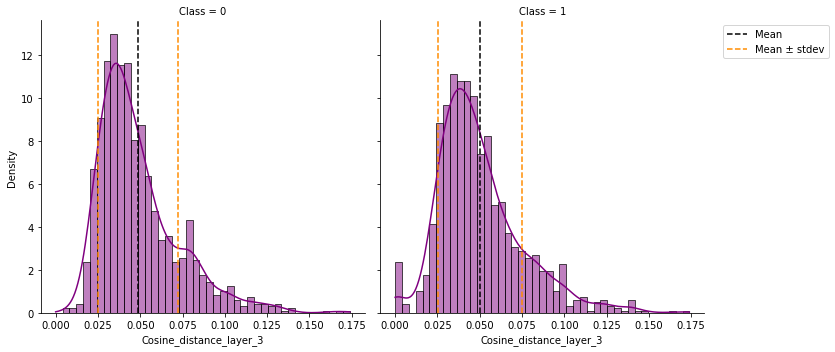

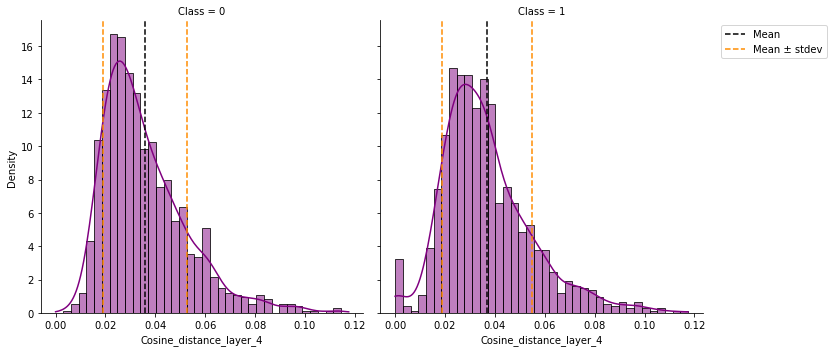

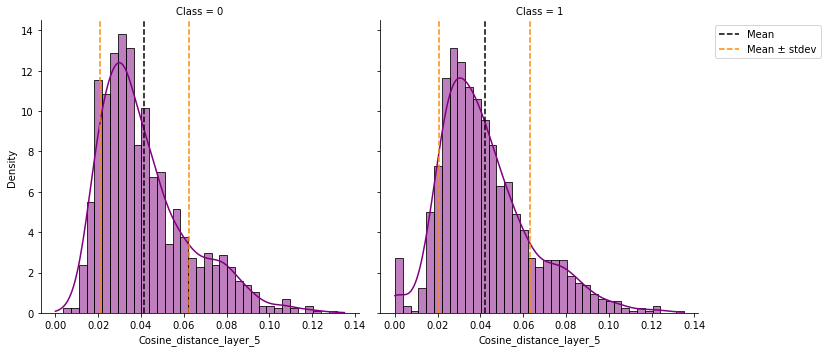

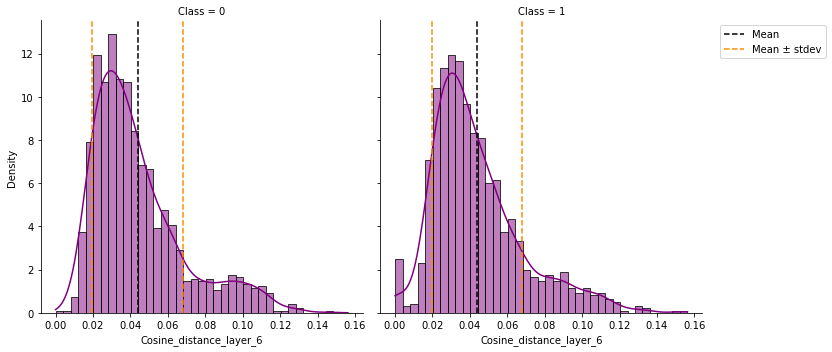

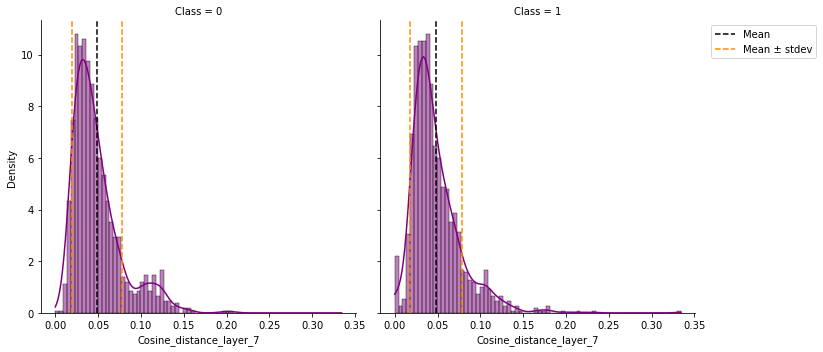

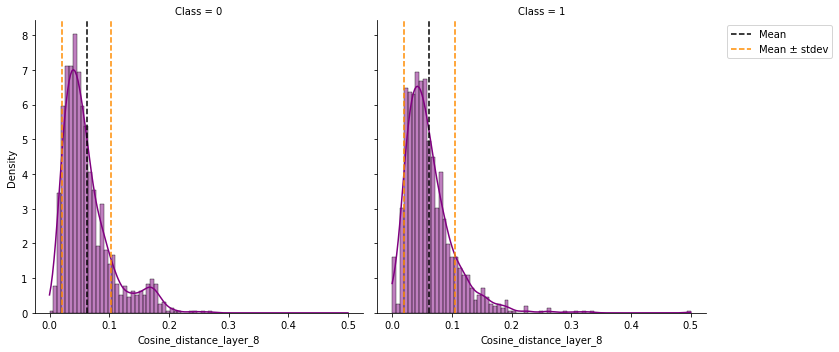

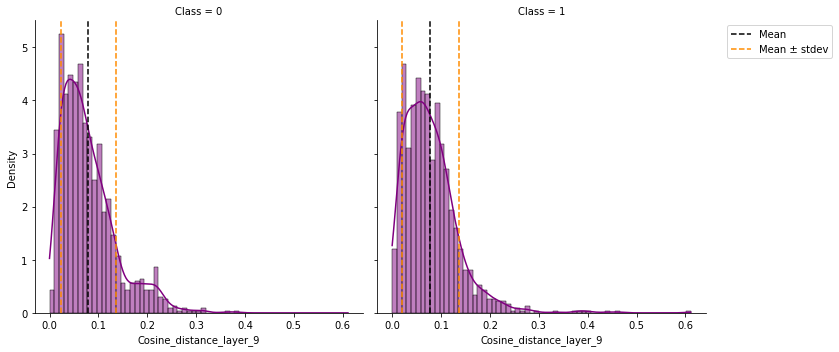

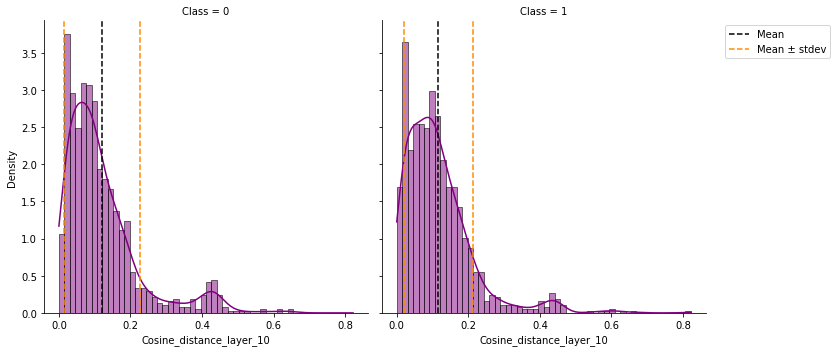

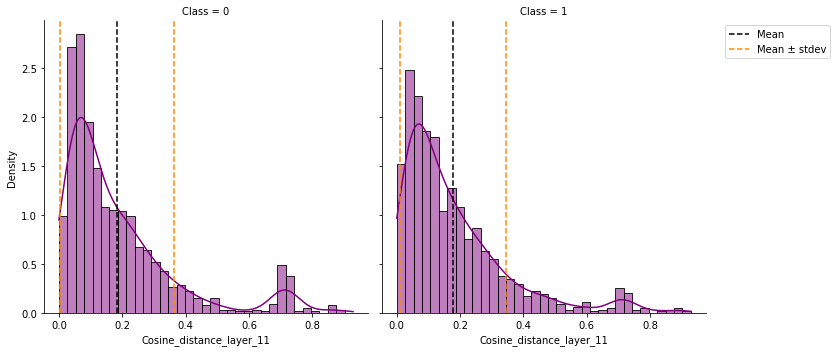

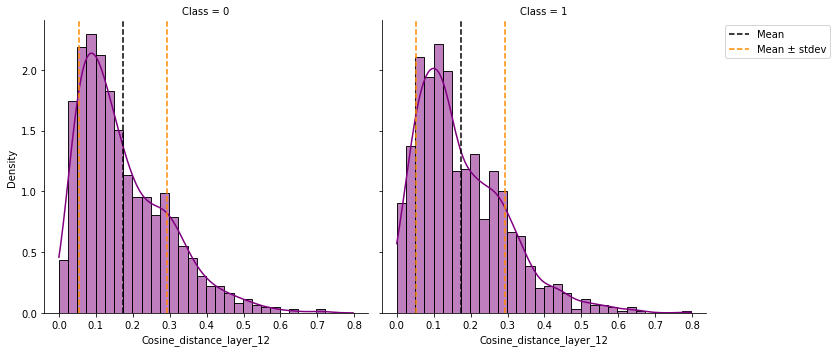

In [33]:
plot_mean_and_standard_deviation(df_dist_20_cosine_distance, 'density', 'purple')

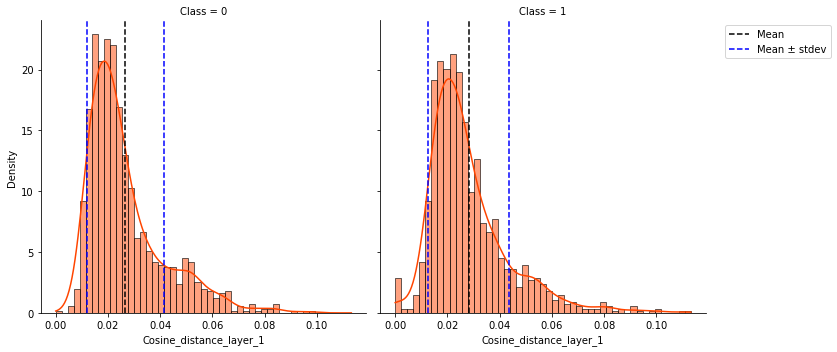

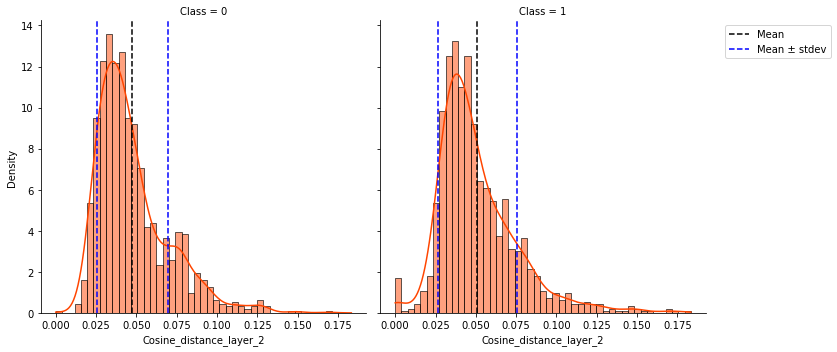

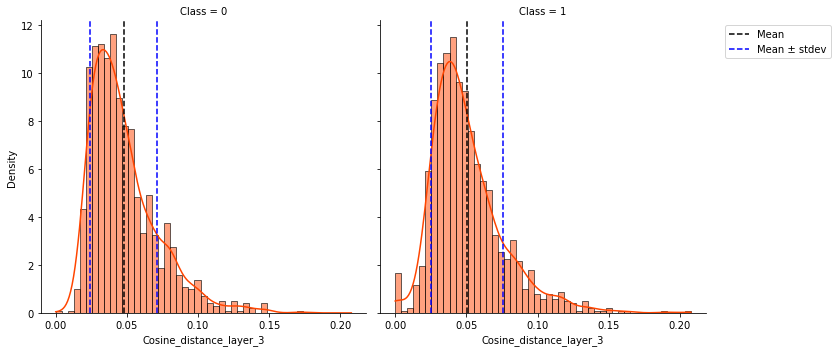

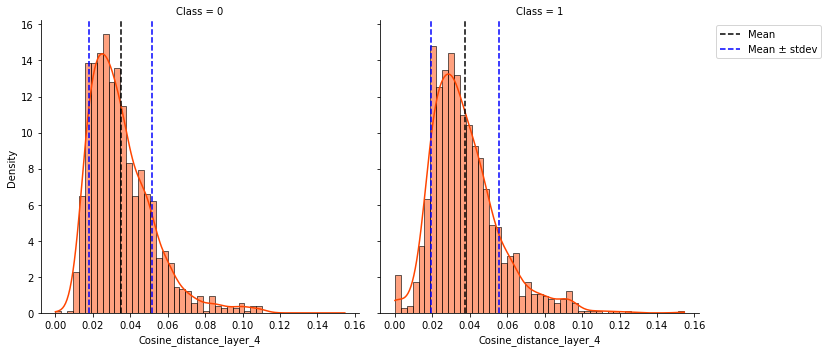

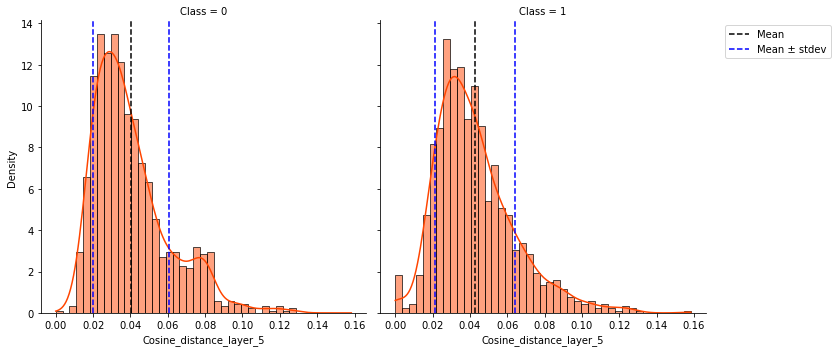

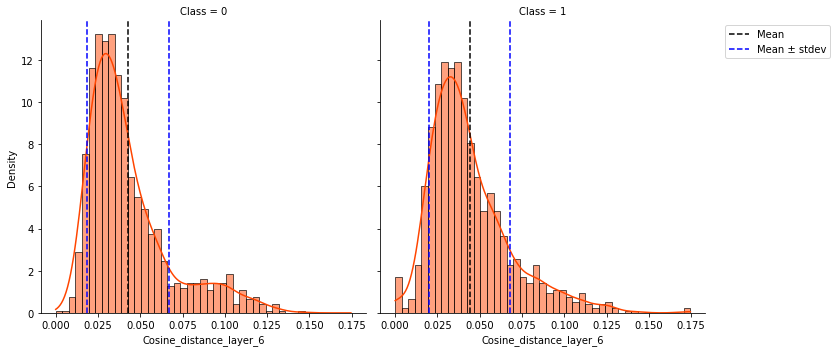

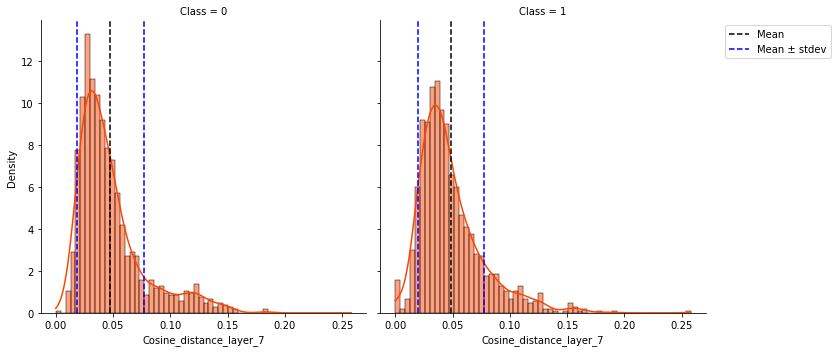

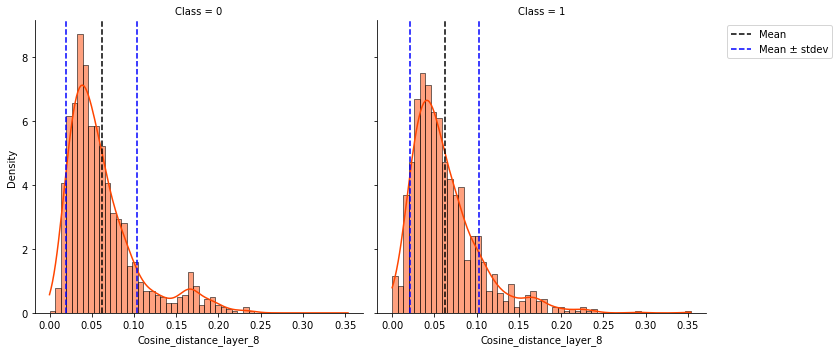

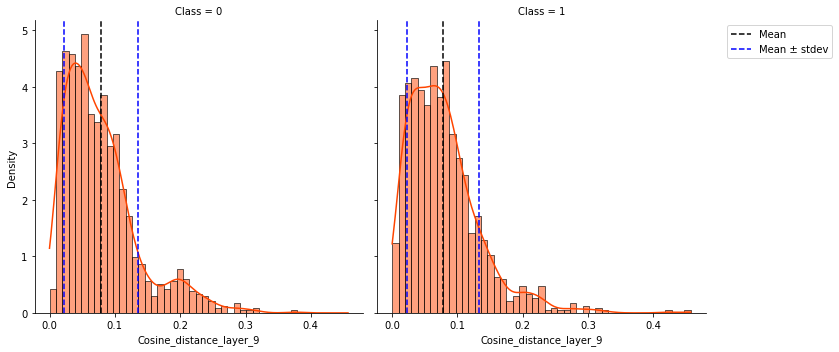

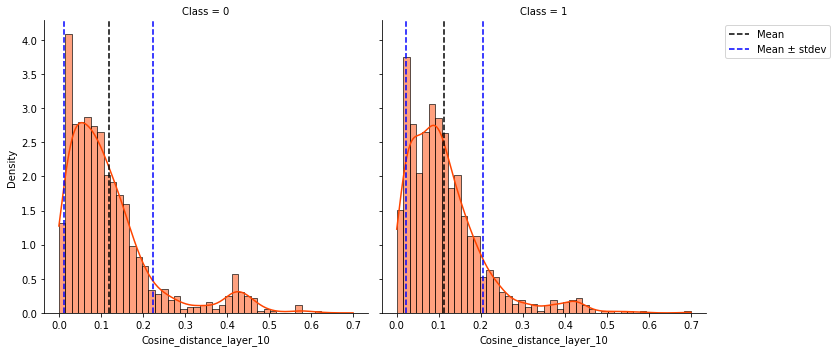

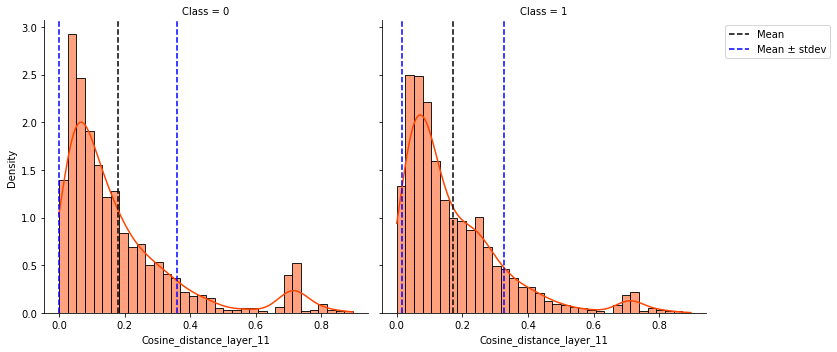

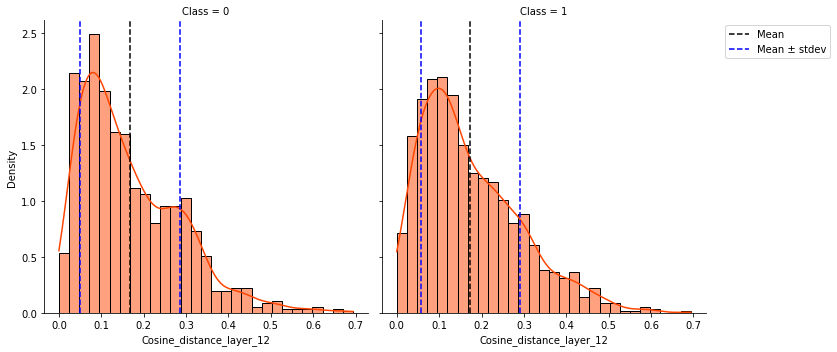

In [34]:
plot_mean_and_standard_deviation(df_dist_30_cosine_distance, 'density', 'orangered')

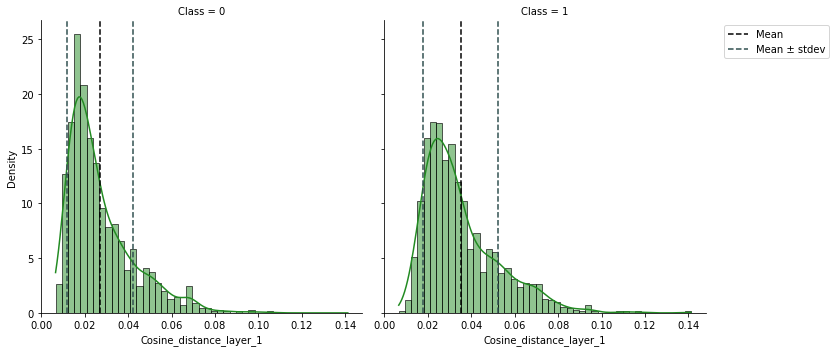

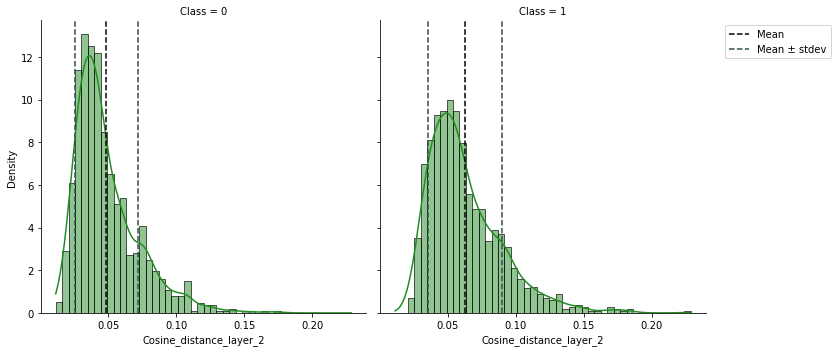

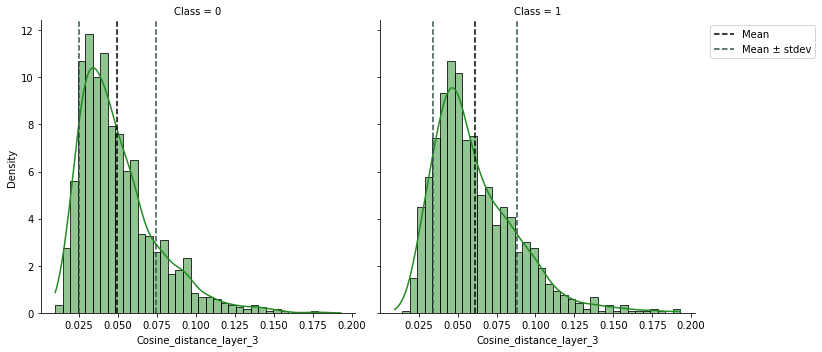

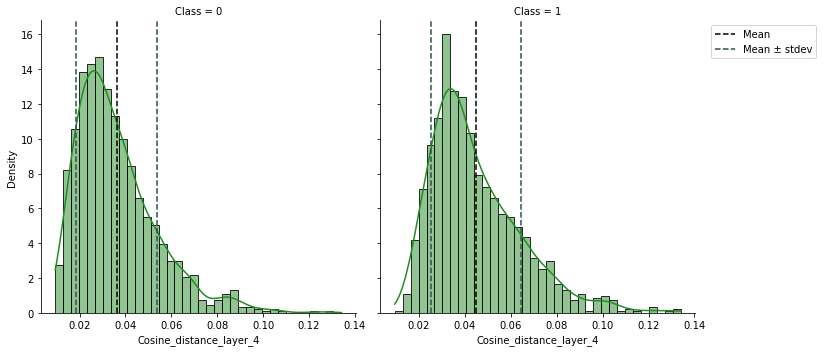

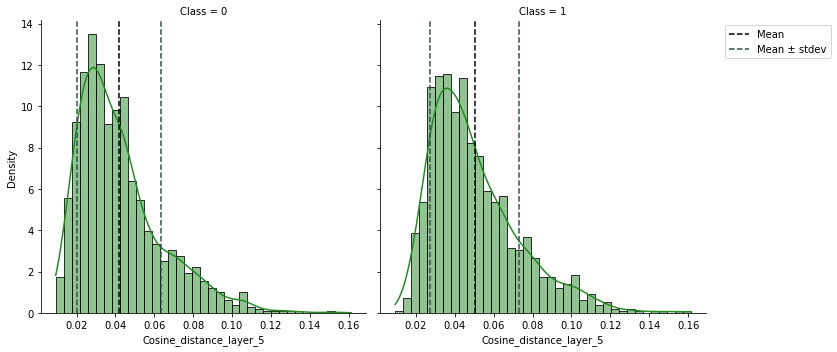

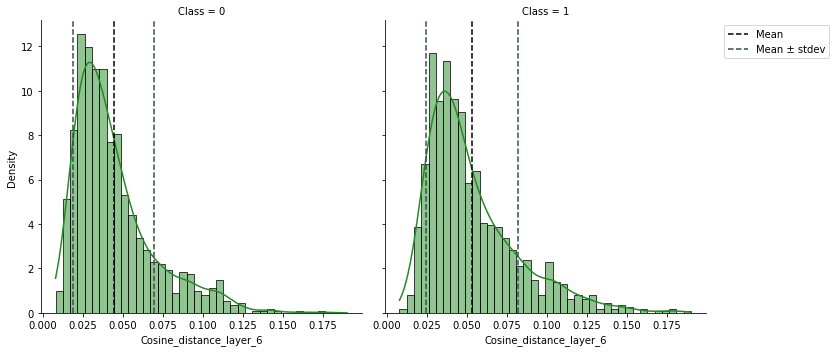

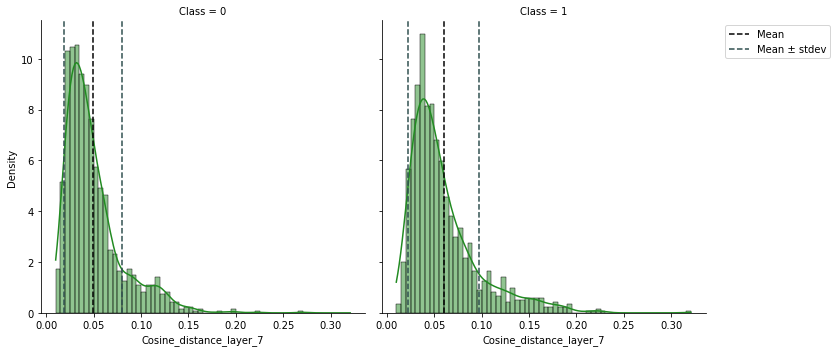

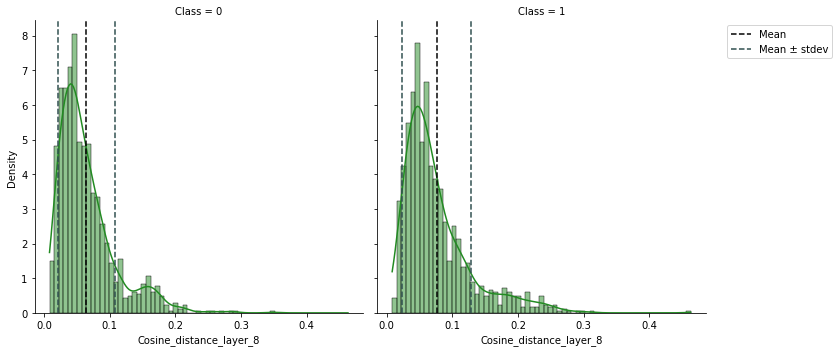

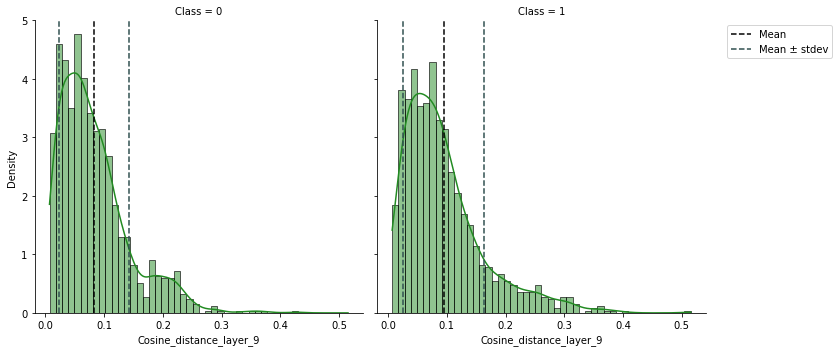

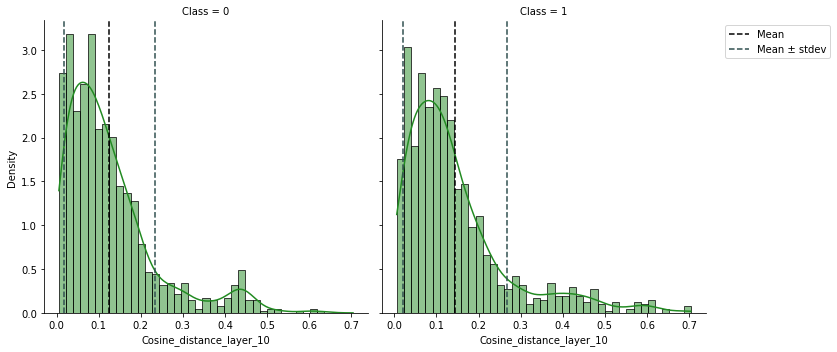

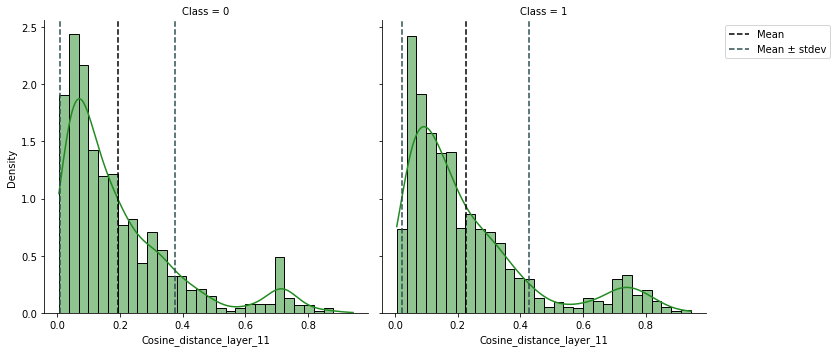

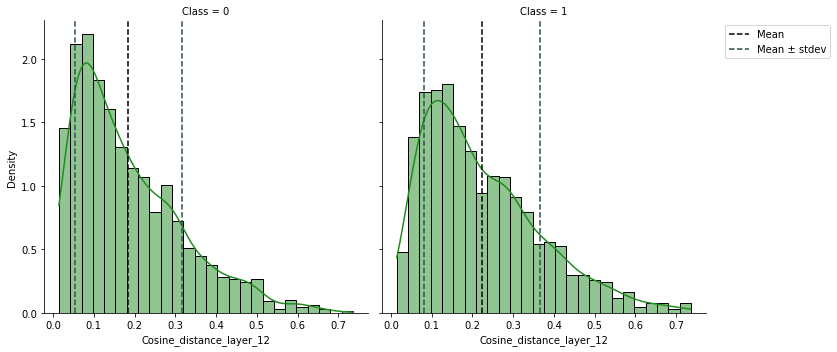

In [35]:
plot_mean_and_standard_deviation(df_random_speech_cosine_distance, 'density', 'forestgreen')

In [36]:
#sns.displot(data=df_dist_5_cosine_distance, x=df_dist_5_cosine_distance['Cosine_distance_layer_1'], \
#            kind='kde', hue='Class')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0261
StDev: 0.0149
Mean: 0.0271
StDev: 0.0147


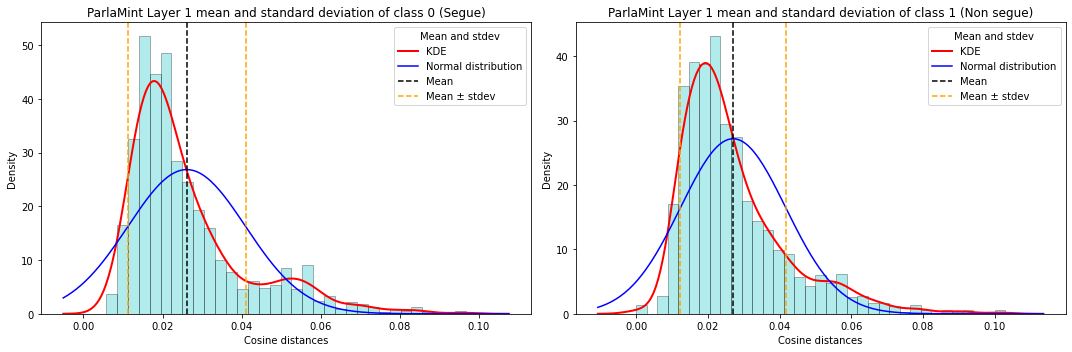

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0481
StDev: 0.0235
Mean: 0.0489
StDev: 0.0221


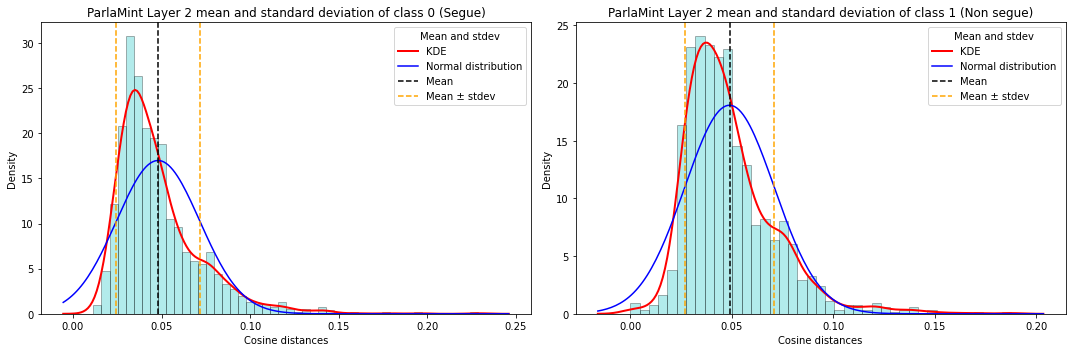

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0480
StDev: 0.0244
Mean: 0.0488
StDev: 0.0234


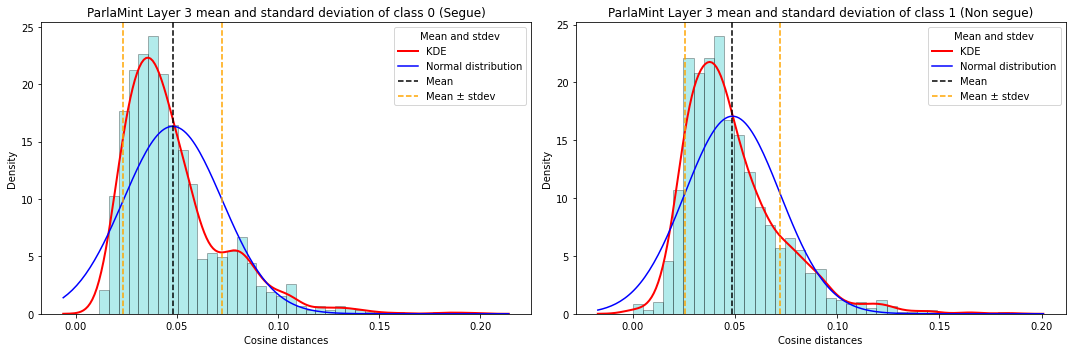

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0351
StDev: 0.0173
Mean: 0.0355
StDev: 0.0167


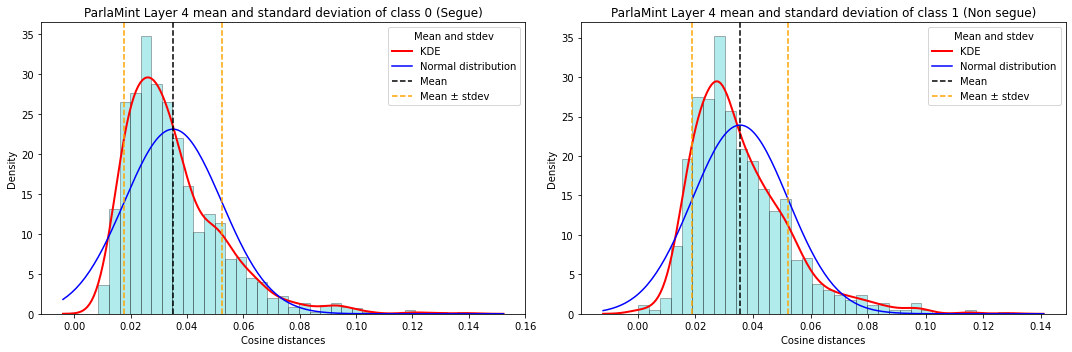

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0406
StDev: 0.0210
Mean: 0.0407
StDev: 0.0202


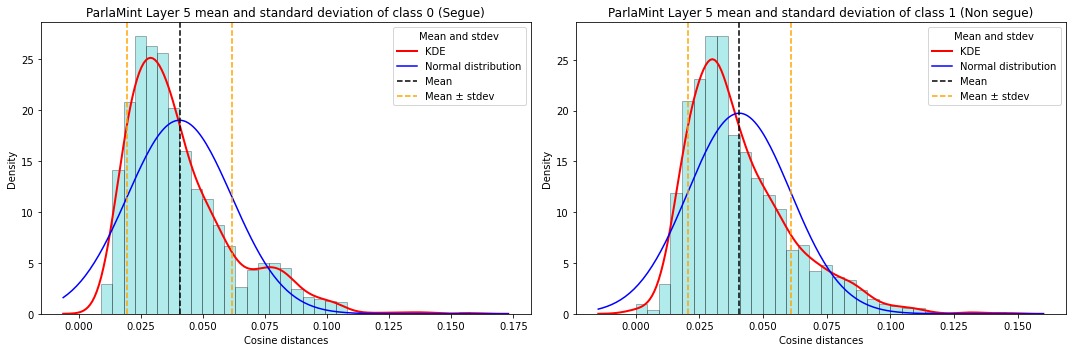

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0425
StDev: 0.0246
Mean: 0.0424
StDev: 0.0238


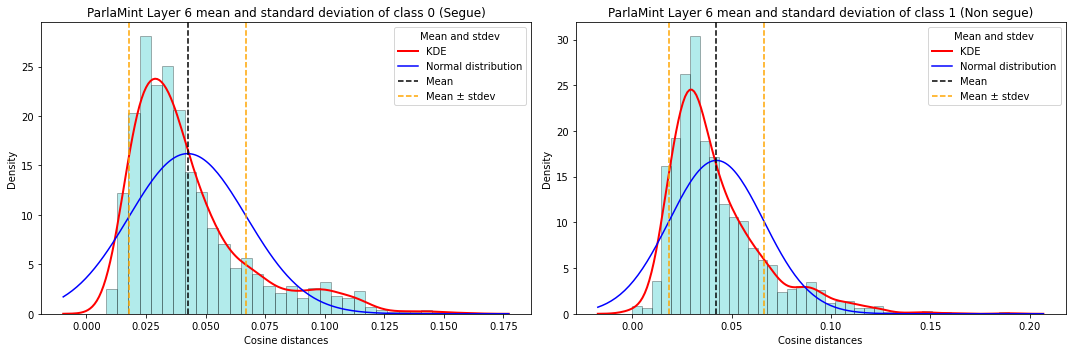

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0475
StDev: 0.0301
Mean: 0.0471
StDev: 0.0298


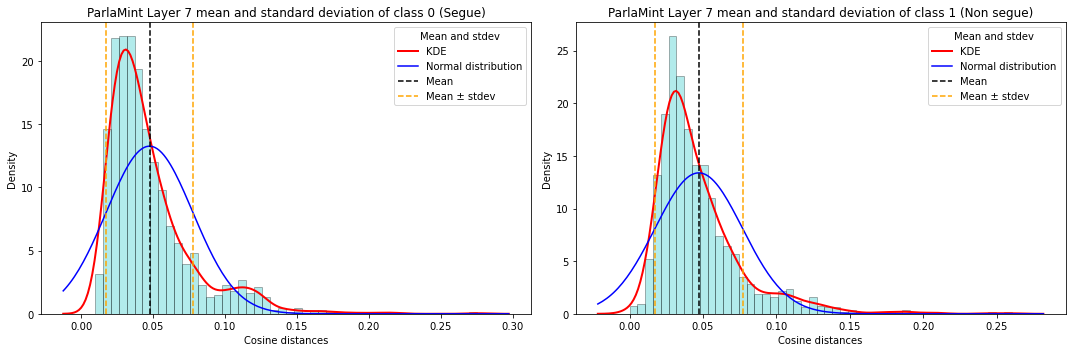

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0609
StDev: 0.0431
Mean: 0.0605
StDev: 0.0430


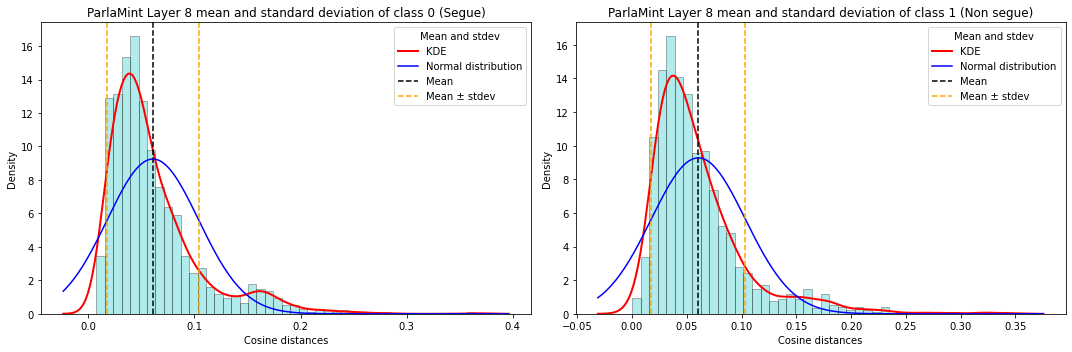

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0768
StDev: 0.0581
Mean: 0.0754
StDev: 0.0572


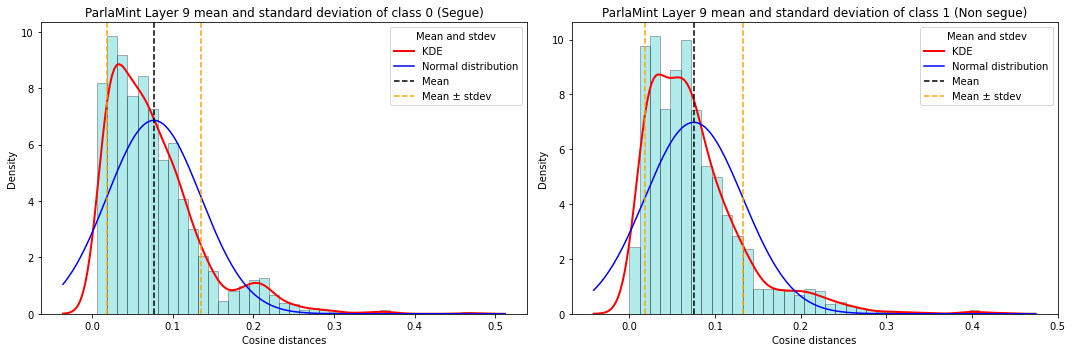

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1145
StDev: 0.1042
Mean: 0.1122
StDev: 0.1031


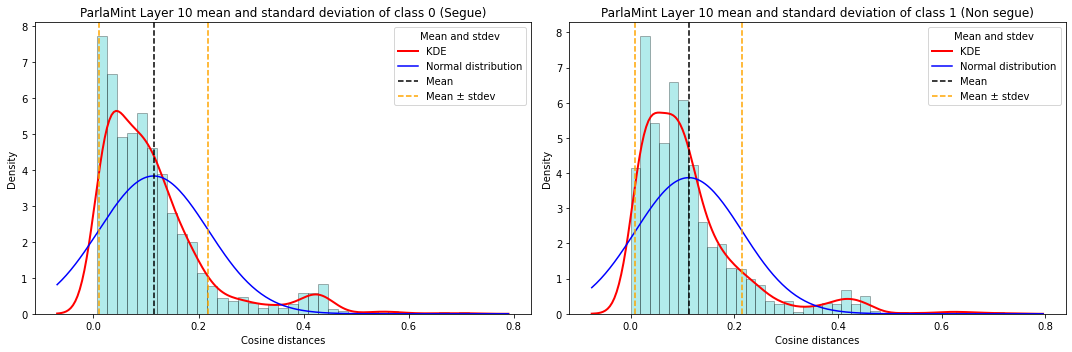

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1781
StDev: 0.1773
Mean: 0.1735
StDev: 0.1727


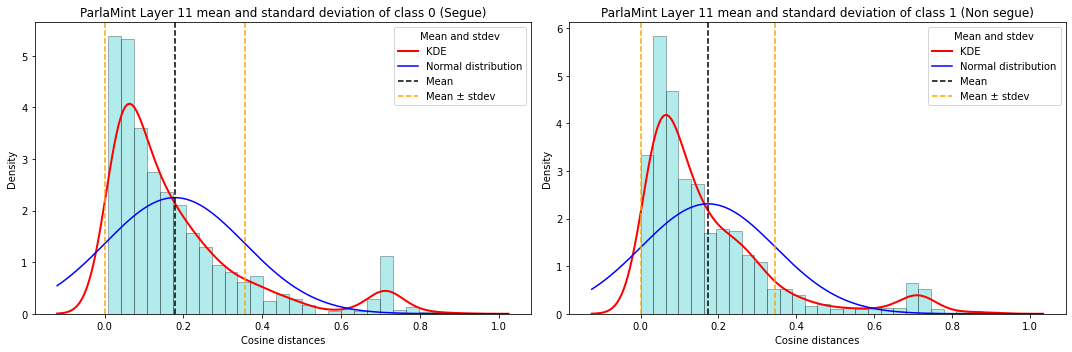

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1666
StDev: 0.1191
Mean: 0.1699
StDev: 0.1220


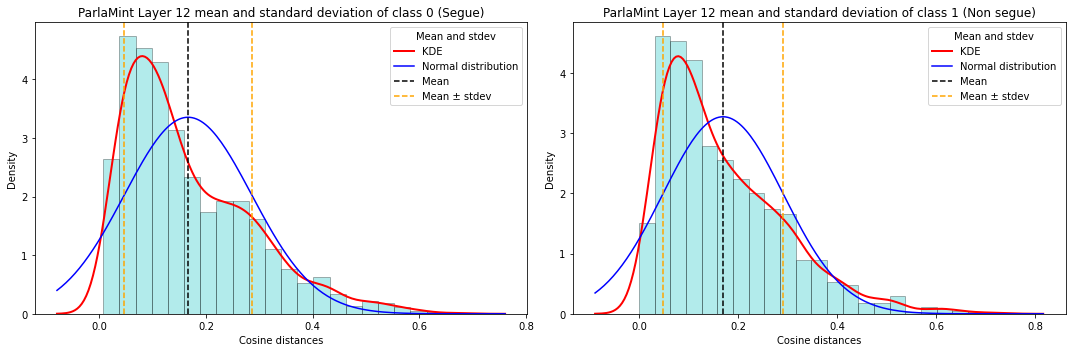

In [37]:
plot_mean_and_stdev(df_dist_5_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0264
StDev: 0.0149
Mean: 0.0278
StDev: 0.0148


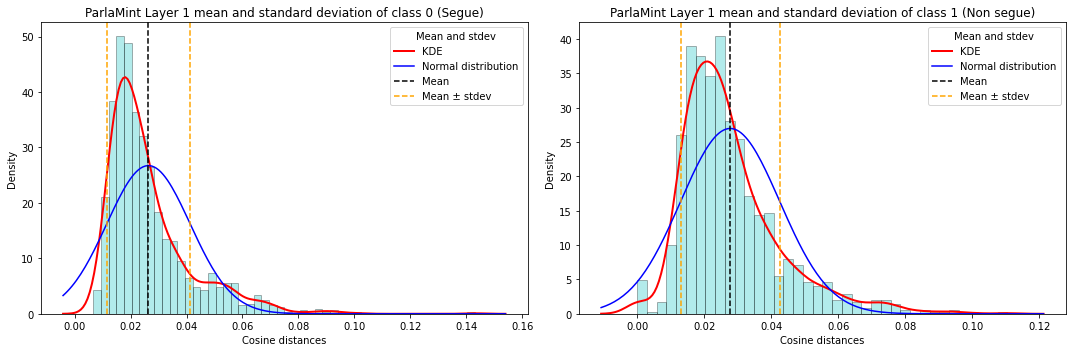

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0477
StDev: 0.0230
Mean: 0.0499
StDev: 0.0234


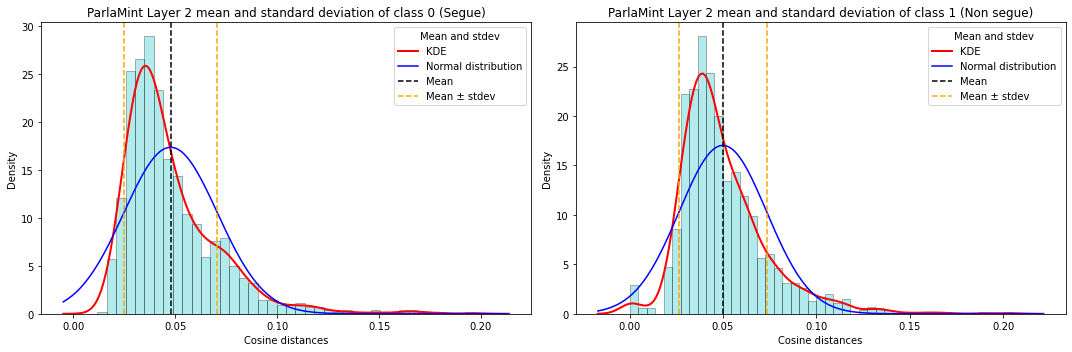

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0484
StDev: 0.0244
Mean: 0.0500
StDev: 0.0243


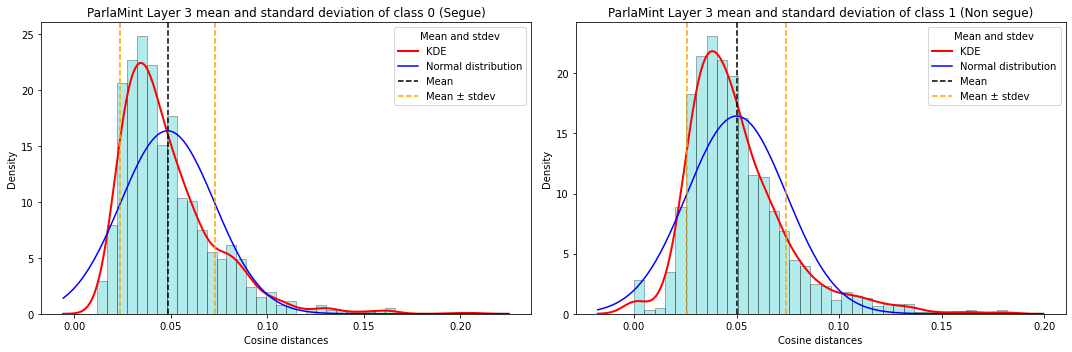

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0353
StDev: 0.0173
Mean: 0.0366
StDev: 0.0176


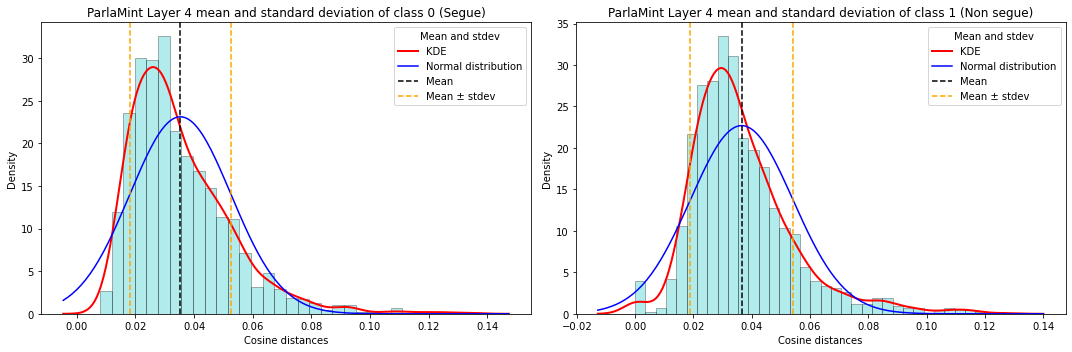

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0408
StDev: 0.0209
Mean: 0.0415
StDev: 0.0204


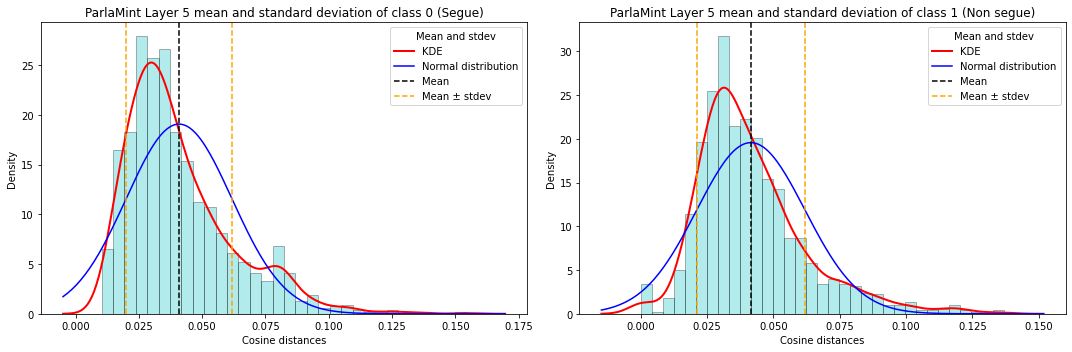

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0430
StDev: 0.0249
Mean: 0.0426
StDev: 0.0225


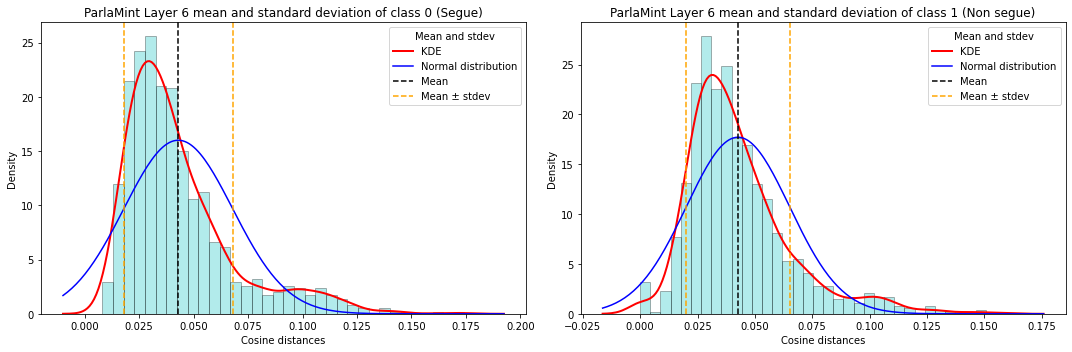

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0484
StDev: 0.0316
Mean: 0.0467
StDev: 0.0261


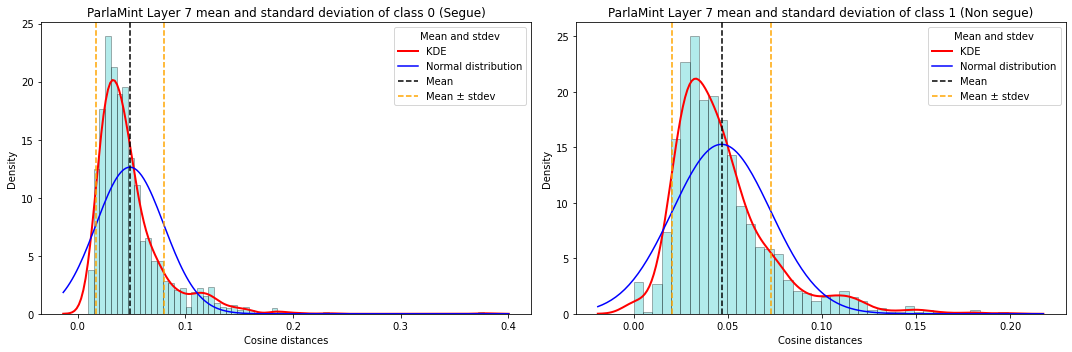

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0620
StDev: 0.0439
Mean: 0.0601
StDev: 0.0382


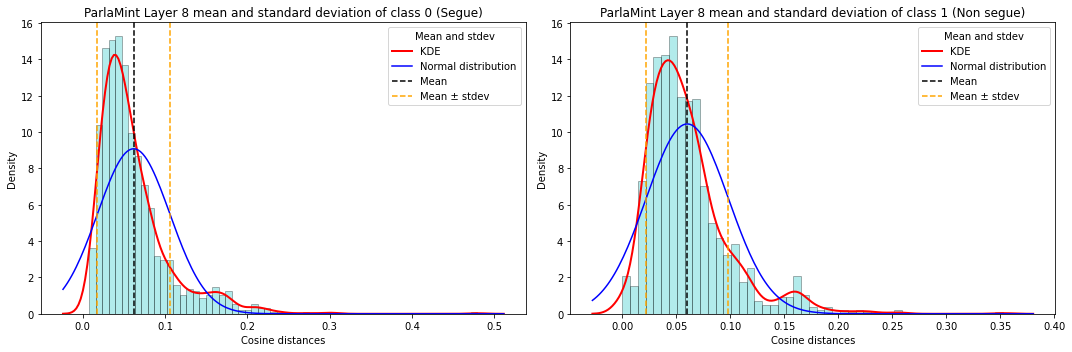

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0775
StDev: 0.0572
Mean: 0.0769
StDev: 0.0526


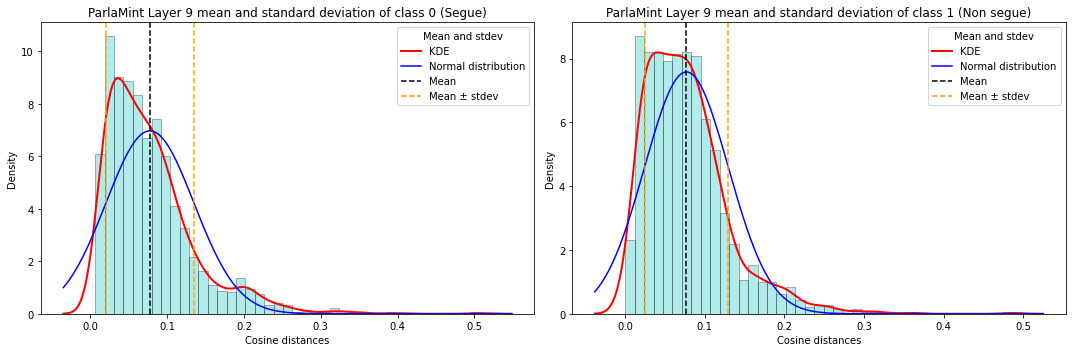

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1154
StDev: 0.1042
Mean: 0.1124
StDev: 0.0890


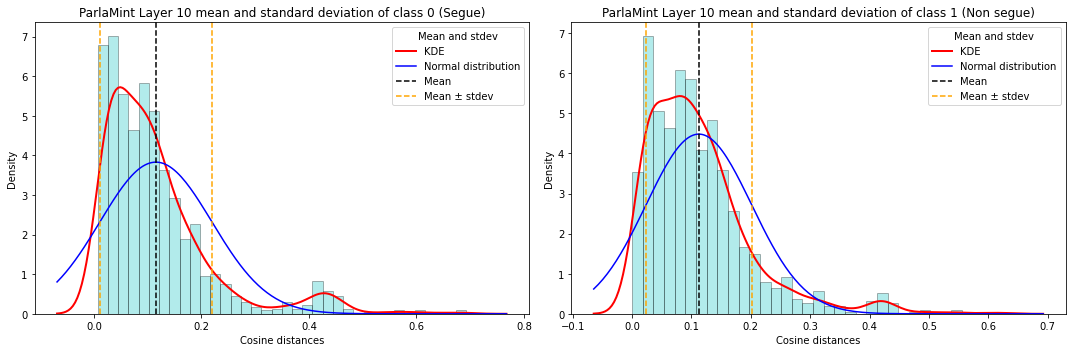

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1765
StDev: 0.1747
Mean: 0.1702
StDev: 0.1547


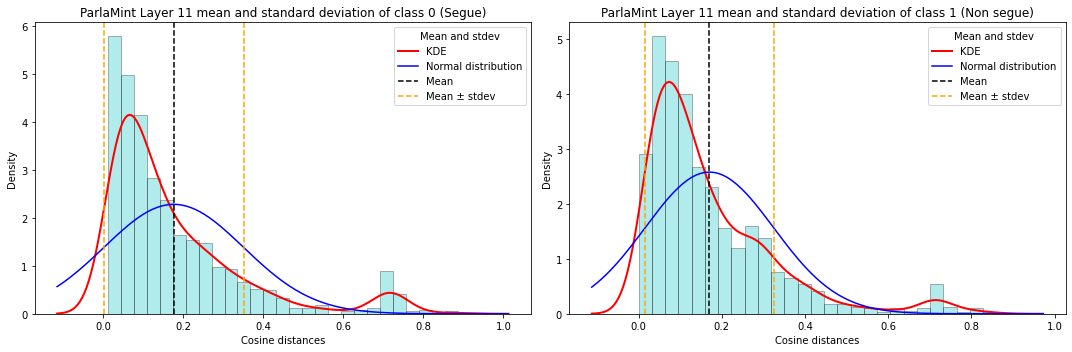

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1637
StDev: 0.1142
Mean: 0.1718
StDev: 0.1158


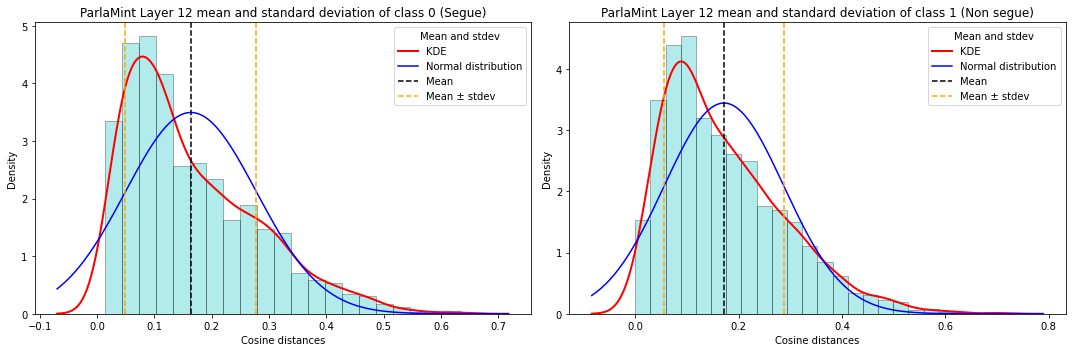

In [38]:
plot_mean_and_stdev(df_dist_10_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0268
StDev: 0.0144
Mean: 0.0278
StDev: 0.0154


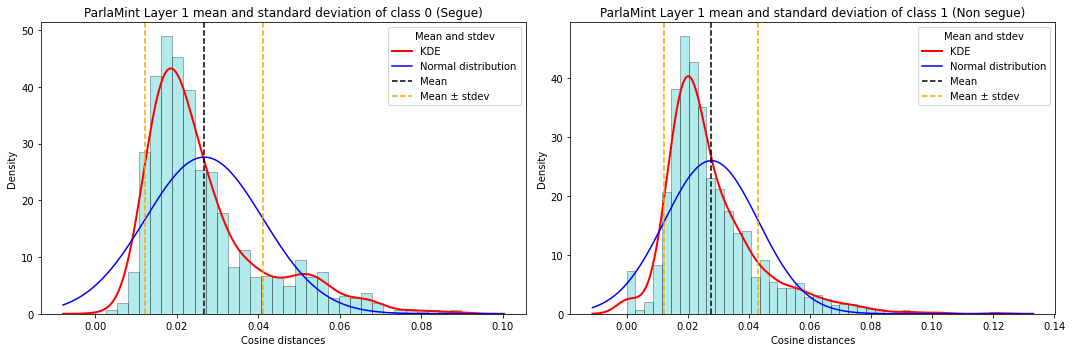

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0490
StDev: 0.0231
Mean: 0.0494
StDev: 0.0237


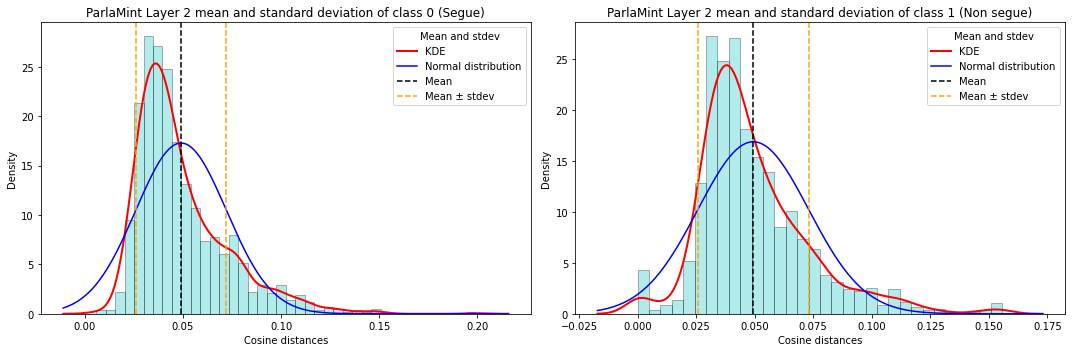

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0489
StDev: 0.0236
Mean: 0.0500
StDev: 0.0249


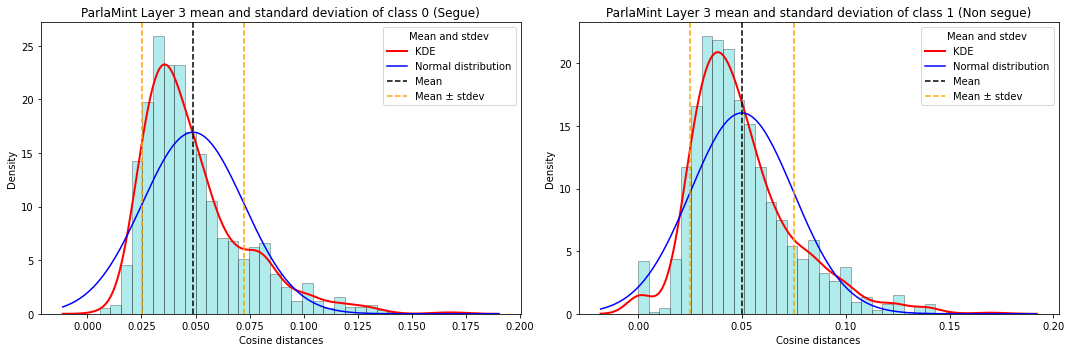

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0357
StDev: 0.0168
Mean: 0.0367
StDev: 0.0180


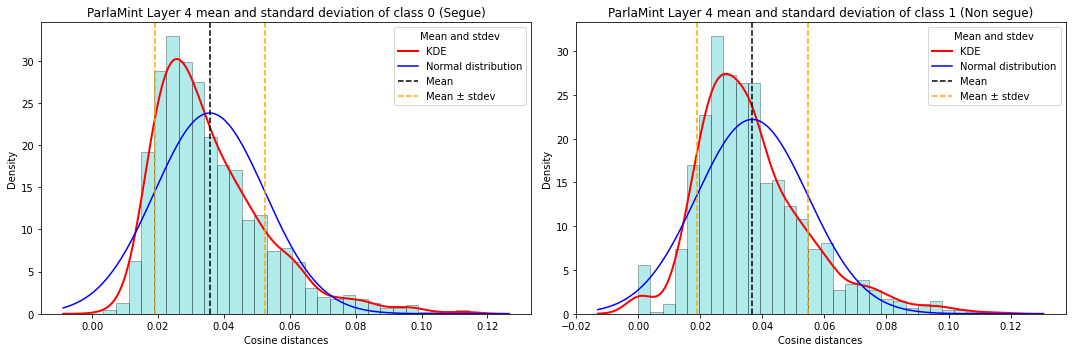

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0416
StDev: 0.0207
Mean: 0.0420
StDev: 0.0212


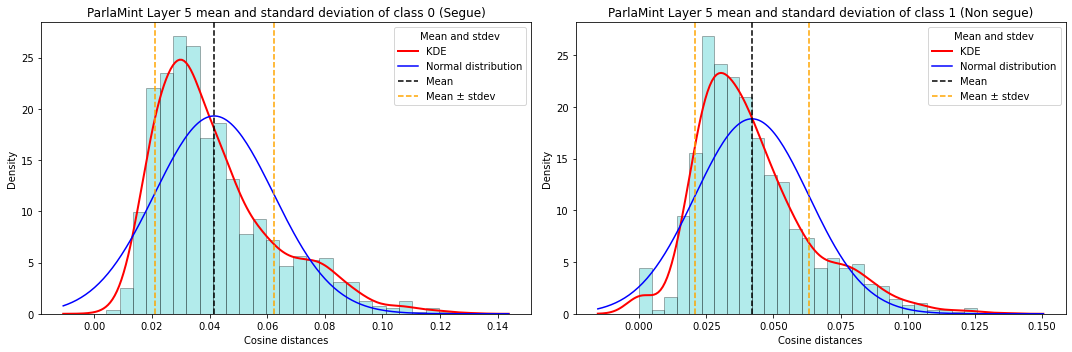

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0439
StDev: 0.0243
Mean: 0.0437
StDev: 0.0242


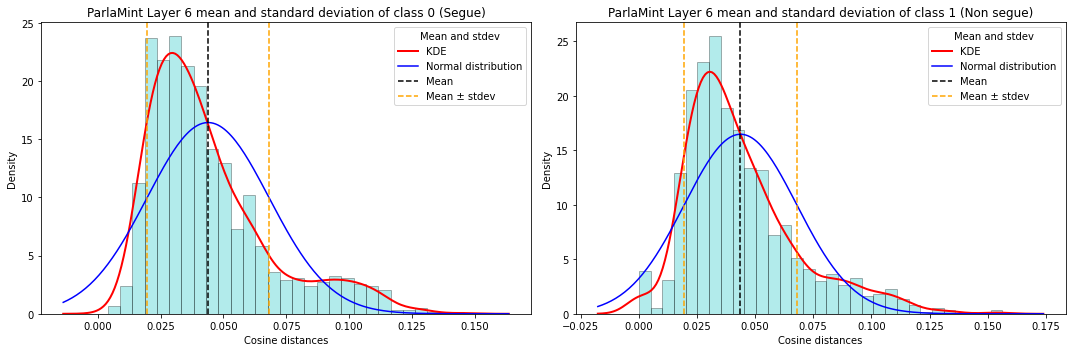

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0488
StDev: 0.0290
Mean: 0.0483
StDev: 0.0299


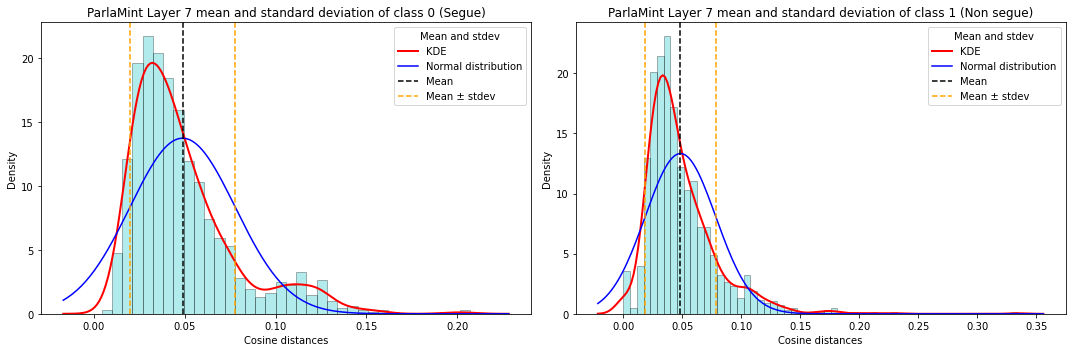

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0624
StDev: 0.0412
Mean: 0.0622
StDev: 0.0428


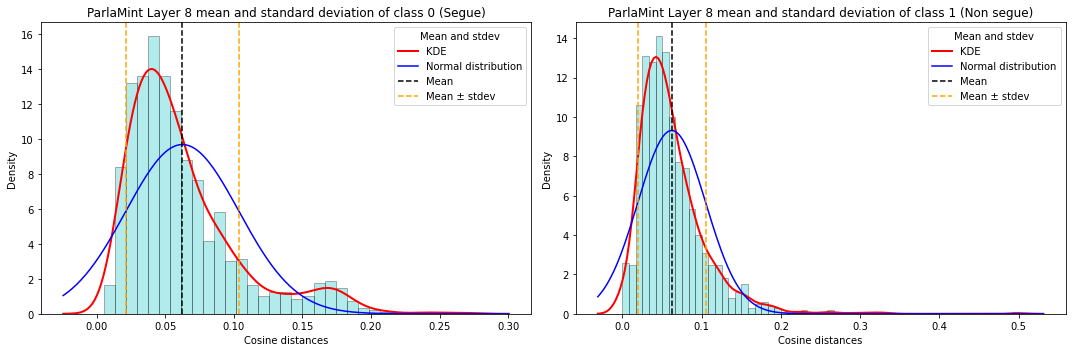

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0793
StDev: 0.0562
Mean: 0.0784
StDev: 0.0574


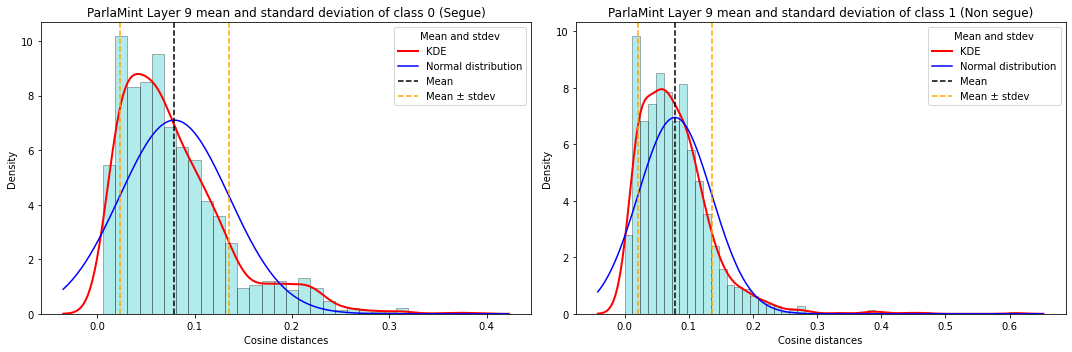

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1197
StDev: 0.1055
Mean: 0.1154
StDev: 0.0965


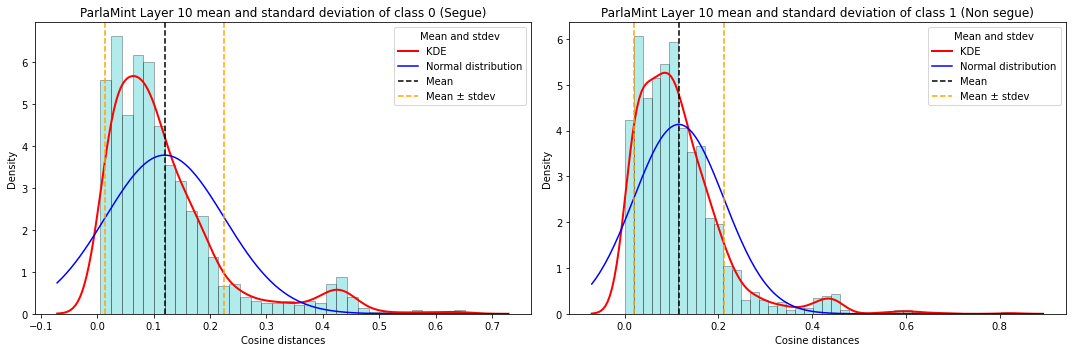

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1845
StDev: 0.1795
Mean: 0.1789
StDev: 0.1672


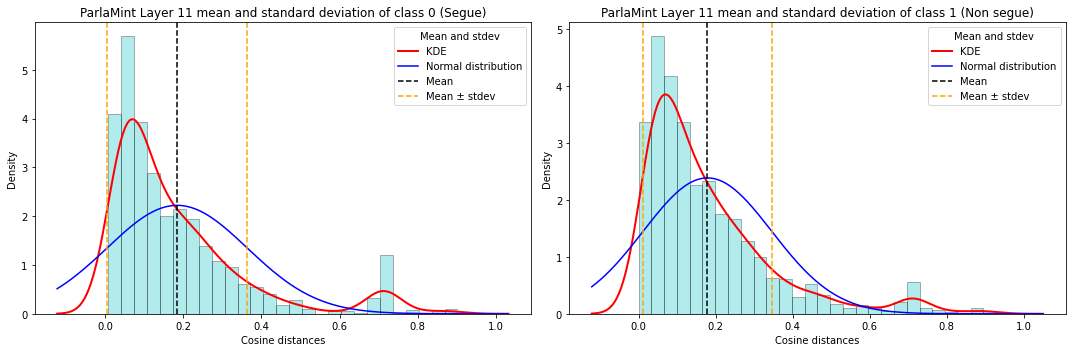

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1734
StDev: 0.1191
Mean: 0.1738
StDev: 0.1204


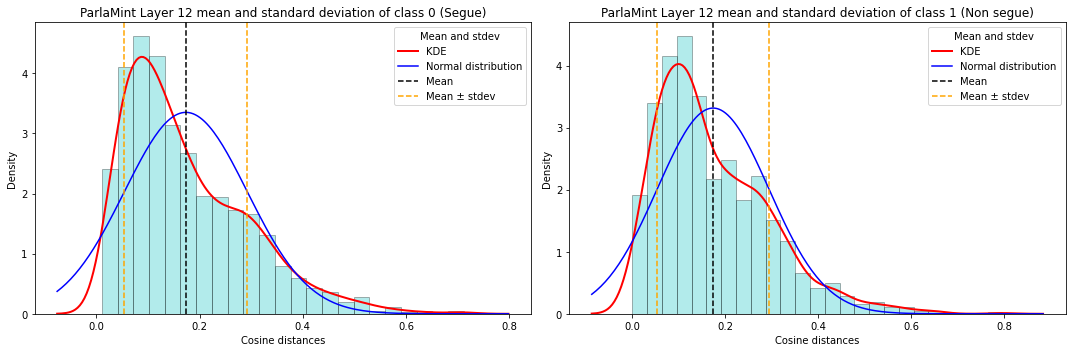

In [39]:
plot_mean_and_stdev(df_dist_20_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0267
StDev: 0.0147
Mean: 0.0281
StDev: 0.0155


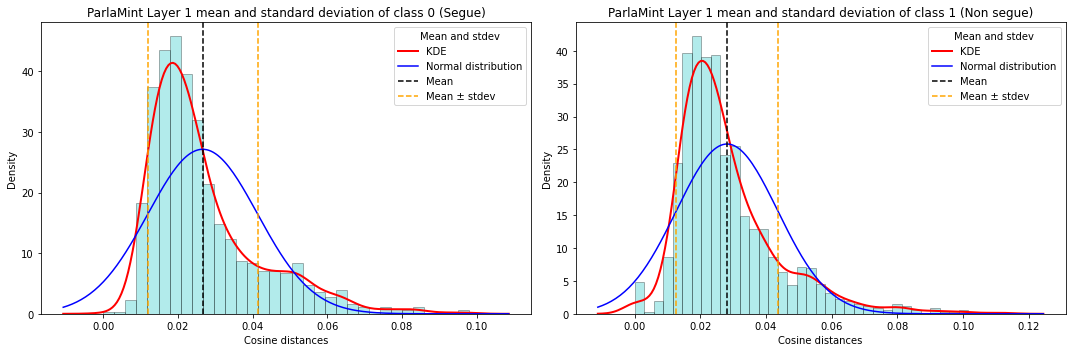

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0475
StDev: 0.0222
Mean: 0.0509
StDev: 0.0246


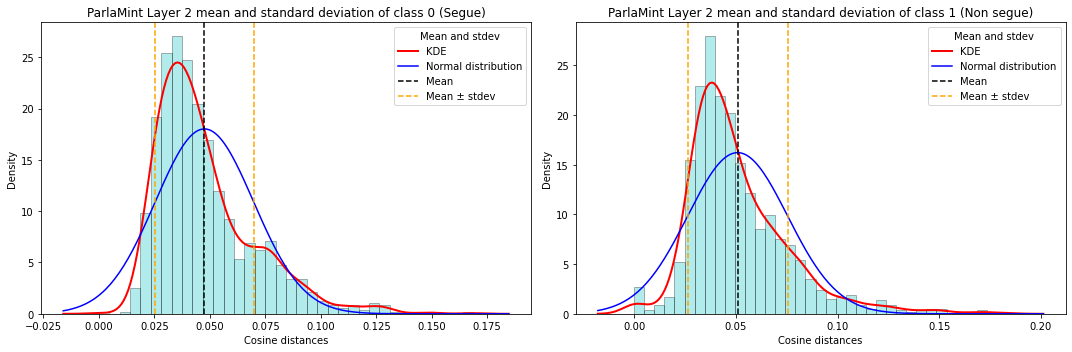

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0478
StDev: 0.0235
Mean: 0.0506
StDev: 0.0253


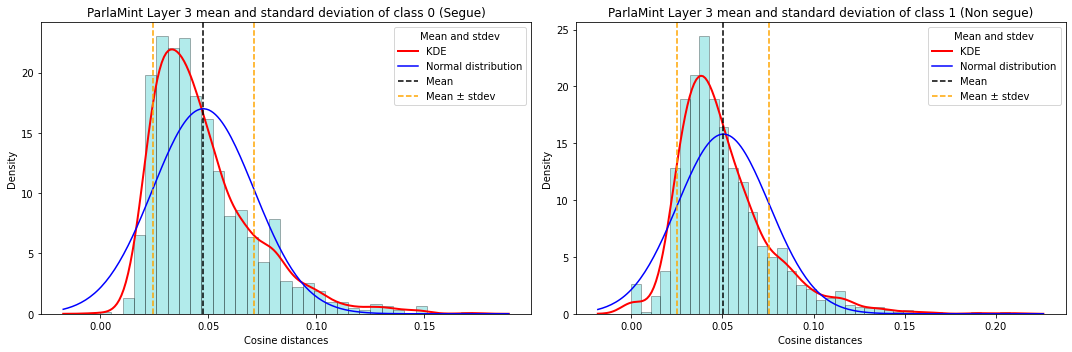

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0349
StDev: 0.0168
Mean: 0.0374
StDev: 0.0183


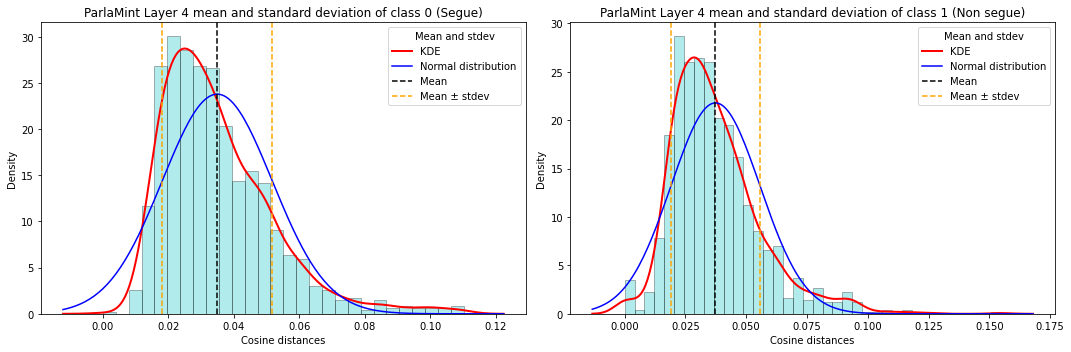

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0403
StDev: 0.0202
Mean: 0.0427
StDev: 0.0213


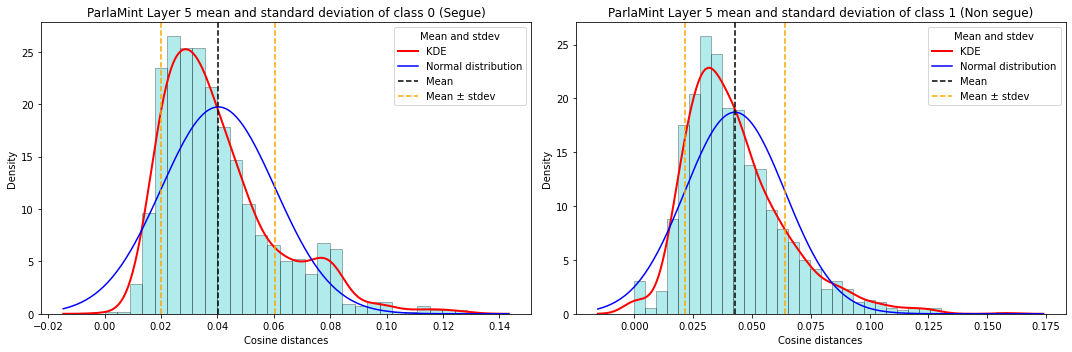

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0426
StDev: 0.0244
Mean: 0.0440
StDev: 0.0241


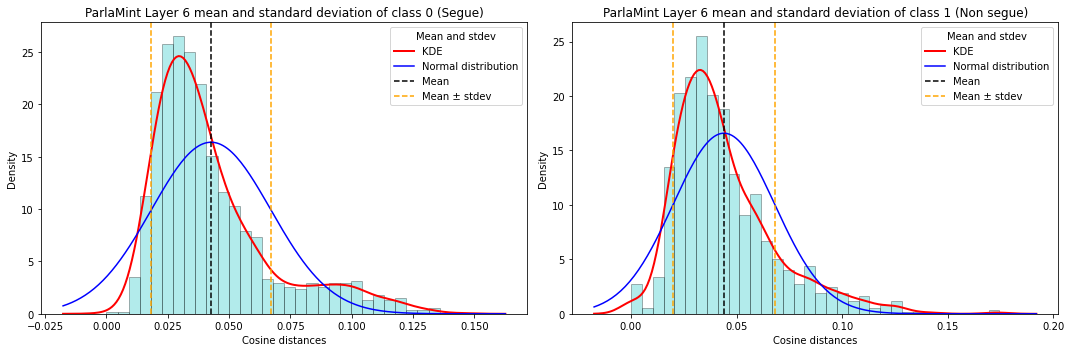

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0478
StDev: 0.0292
Mean: 0.0485
StDev: 0.0287


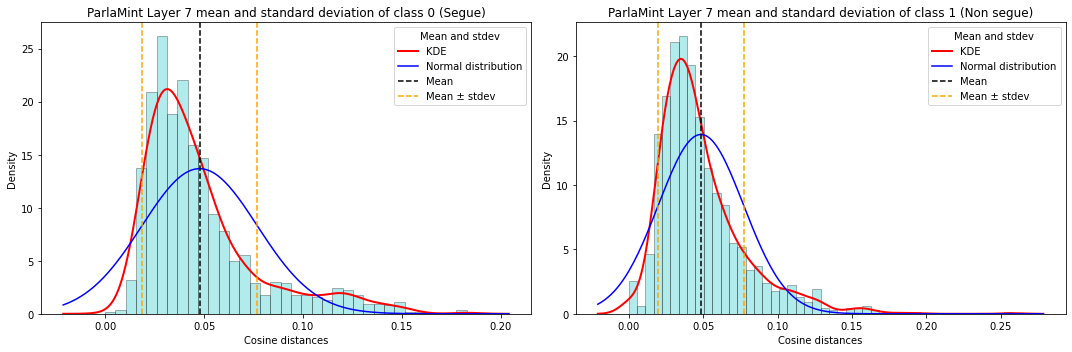

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0620
StDev: 0.0419
Mean: 0.0622
StDev: 0.0410


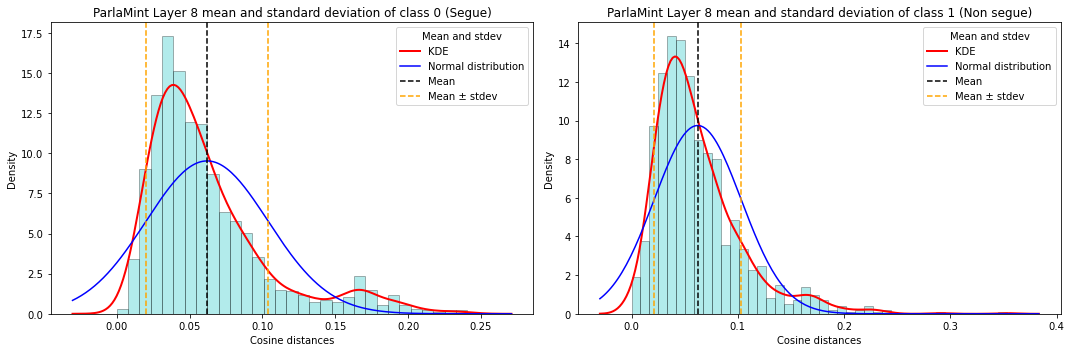

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0781
StDev: 0.0566
Mean: 0.0781
StDev: 0.0550


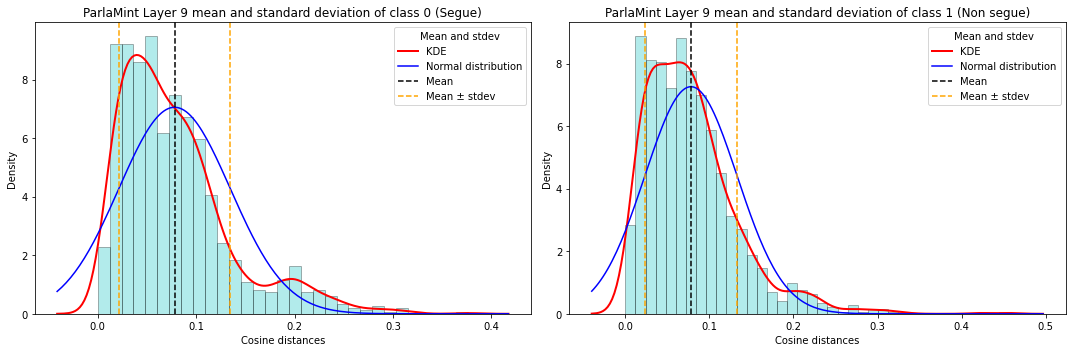

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1184
StDev: 0.1061
Mean: 0.1130
StDev: 0.0920


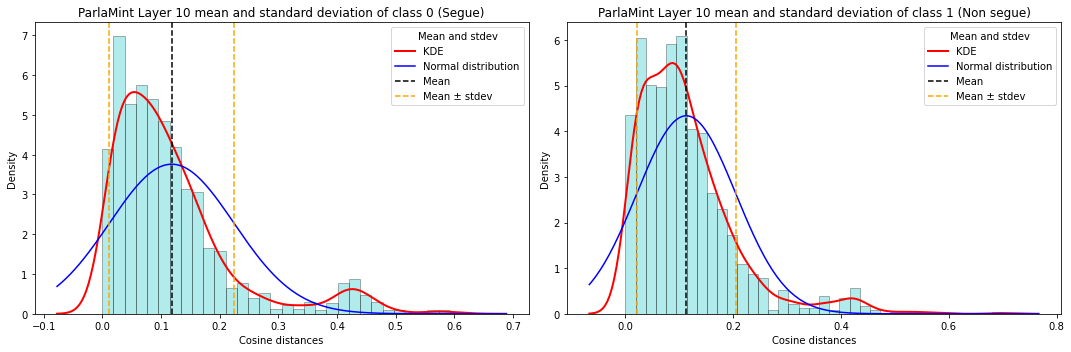

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1805
StDev: 0.1809
Mean: 0.1718
StDev: 0.1559


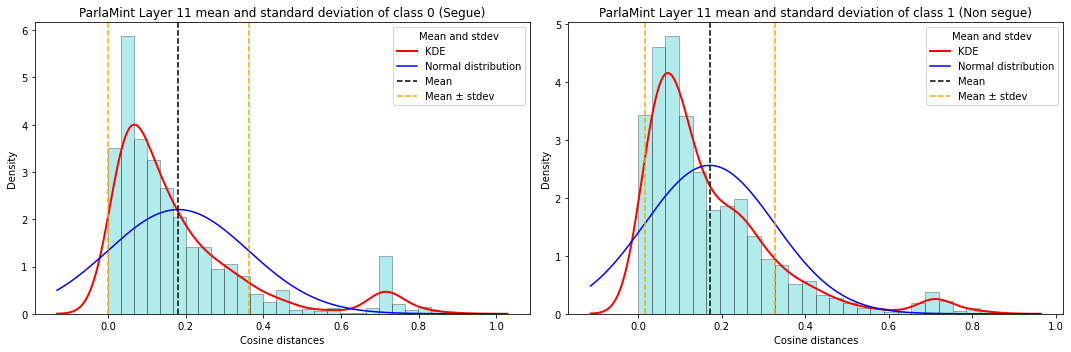

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1679
StDev: 0.1176
Mean: 0.1735
StDev: 0.1174


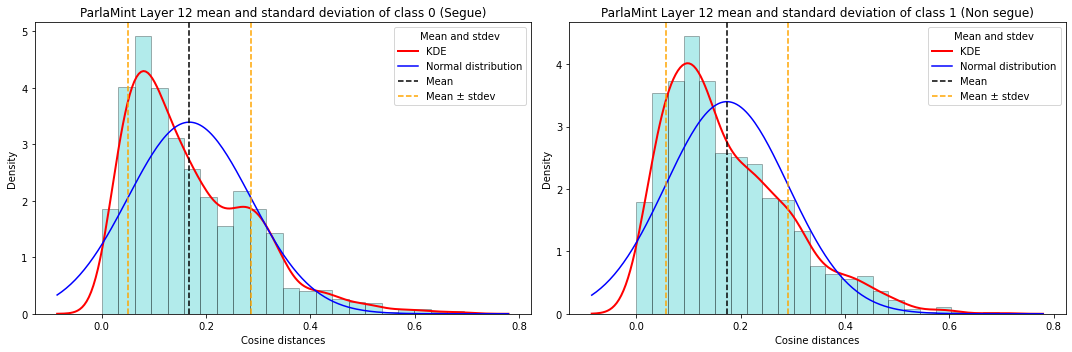

In [40]:
plot_mean_and_stdev(df_dist_30_cosine_distance)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0272
StDev: 0.0152
Mean: 0.0352
StDev: 0.0172


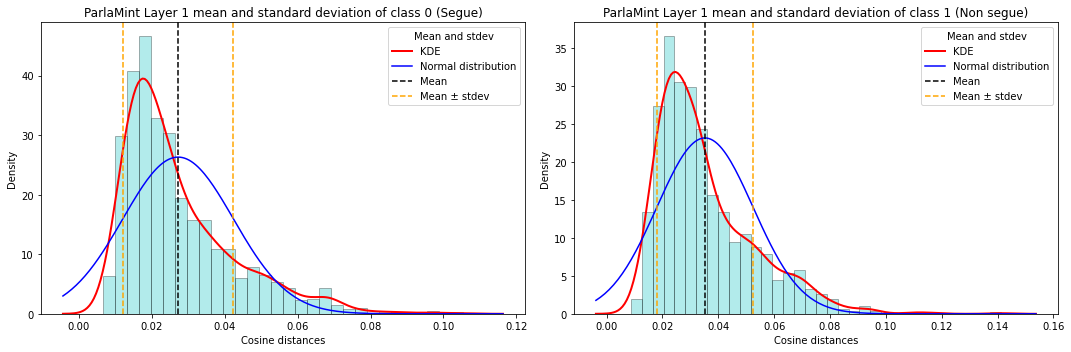

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0486
StDev: 0.0232
Mean: 0.0627
StDev: 0.0271


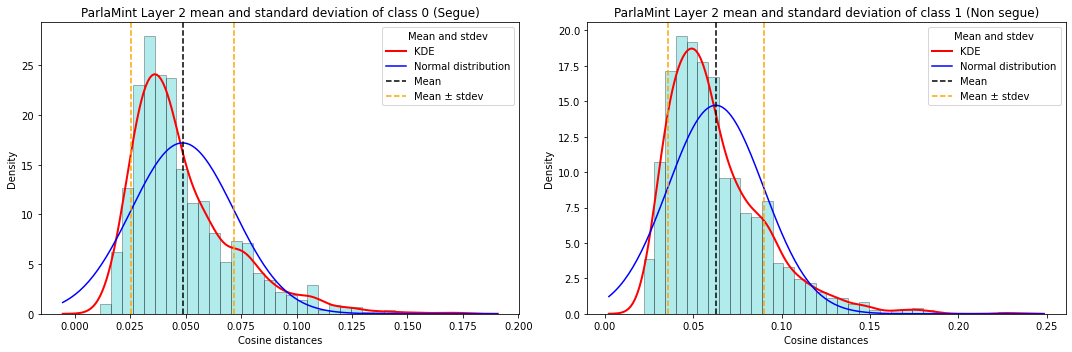

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0494
StDev: 0.0247
Mean: 0.0612
StDev: 0.0271


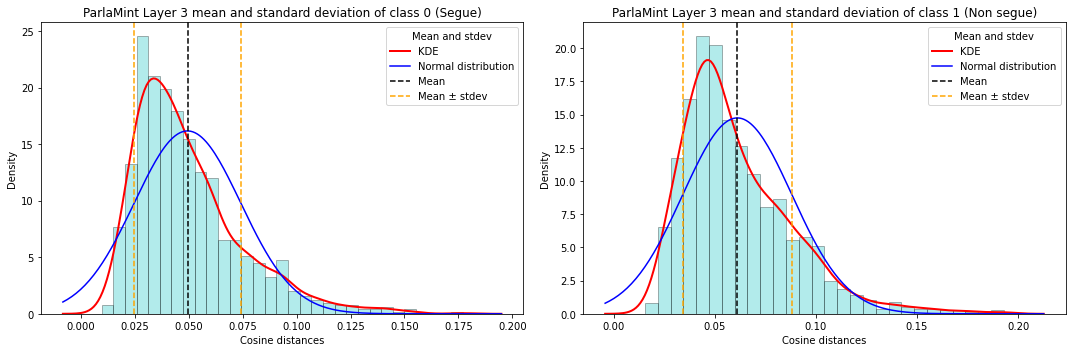

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0362
StDev: 0.0176
Mean: 0.0447
StDev: 0.0196


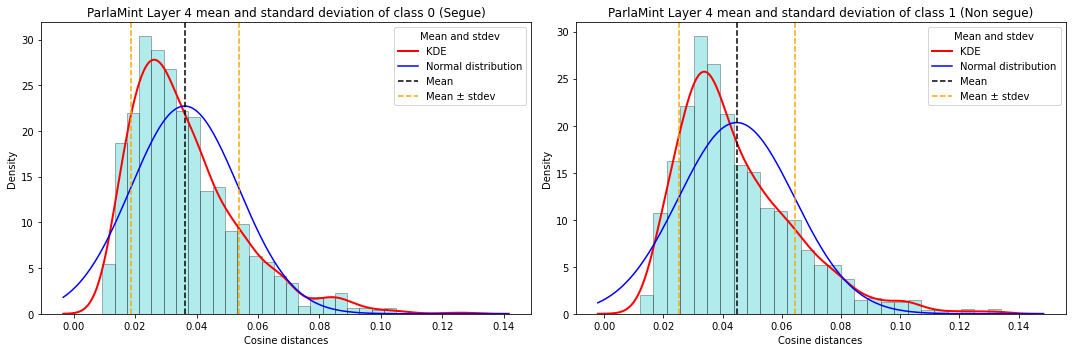

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0419
StDev: 0.0215
Mean: 0.0501
StDev: 0.0229


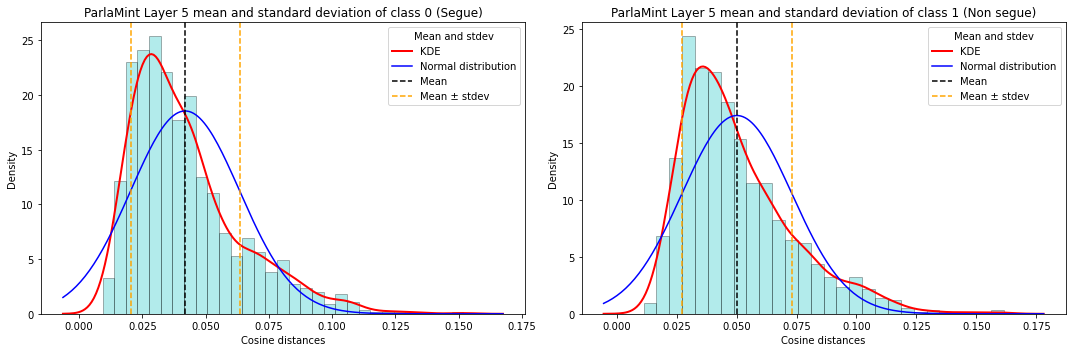

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0441
StDev: 0.0251
Mean: 0.0532
StDev: 0.0284


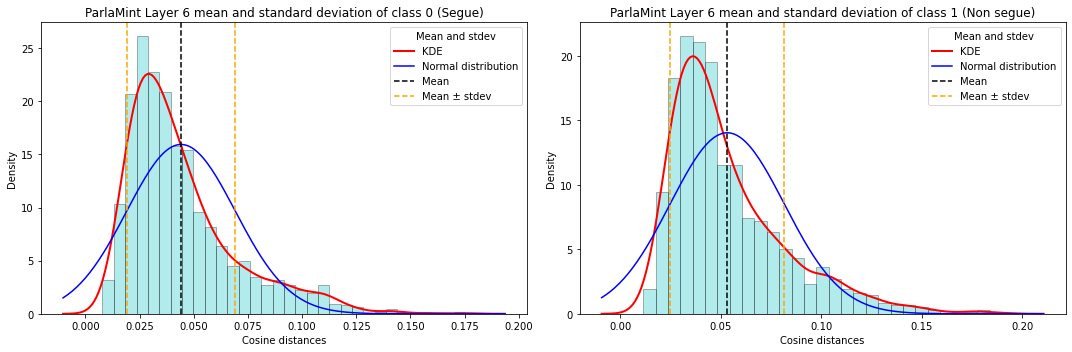

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0494
StDev: 0.0305
Mean: 0.0598
StDev: 0.0372


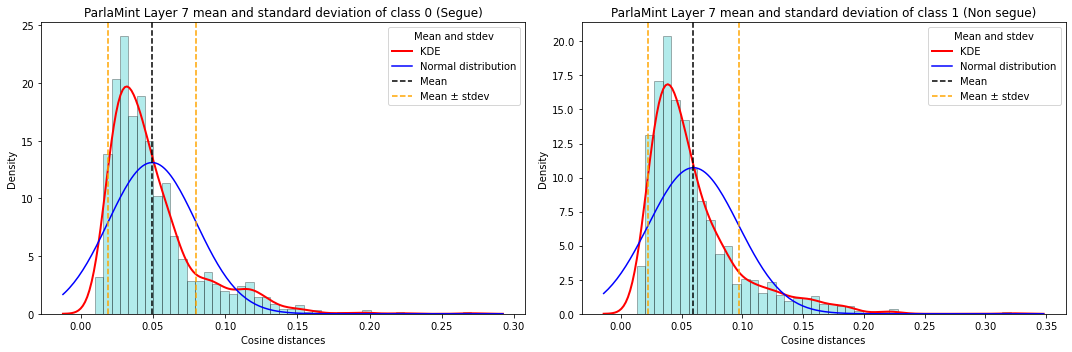

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0644
StDev: 0.0436
Mean: 0.0759
StDev: 0.0523


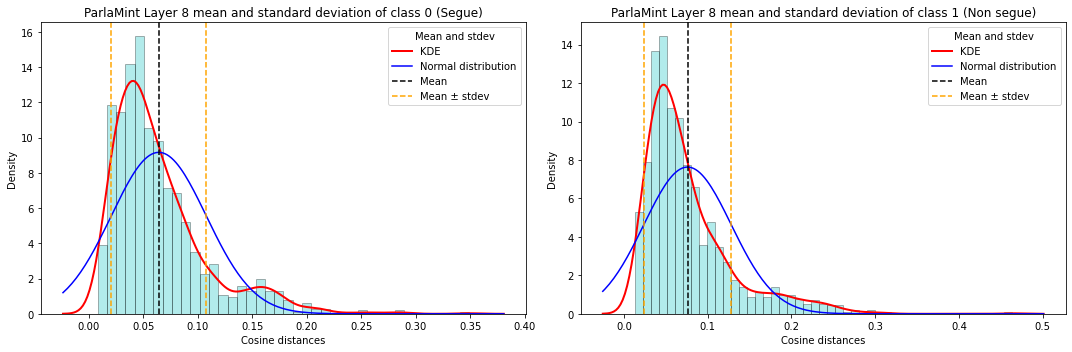

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.0825
StDev: 0.0592
Mean: 0.0945
StDev: 0.0691


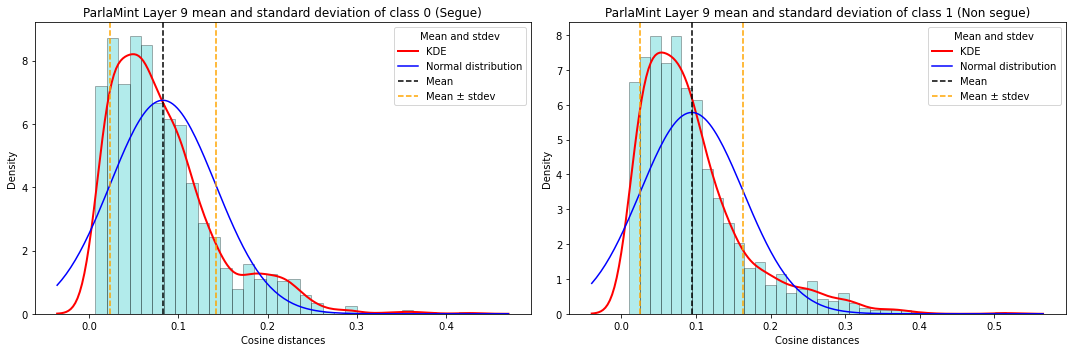

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1255
StDev: 0.1075
Mean: 0.1431
StDev: 0.1235


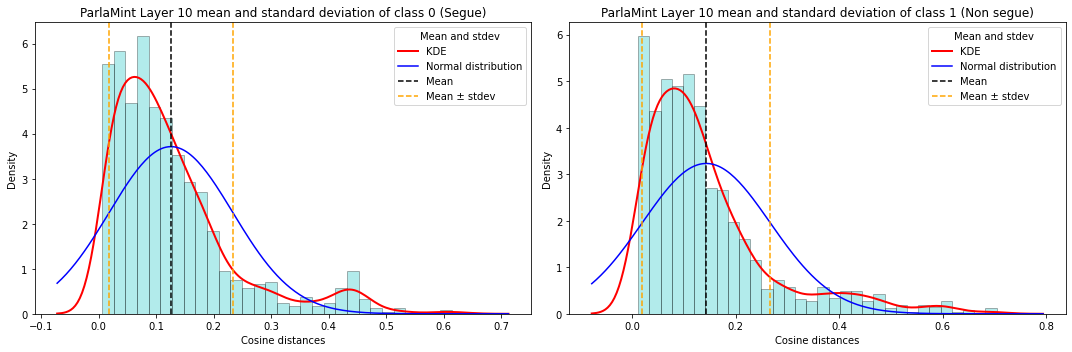

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1927
StDev: 0.1827
Mean: 0.2256
StDev: 0.2023


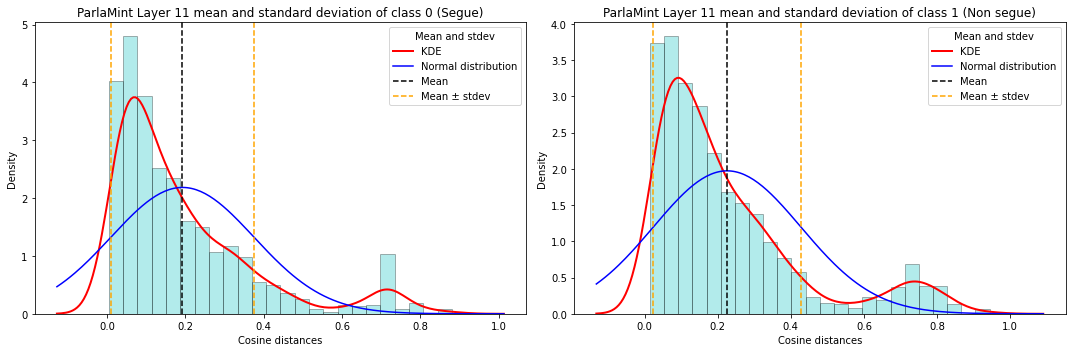

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 0.1851
StDev: 0.1323
Mean: 0.2233
StDev: 0.1426


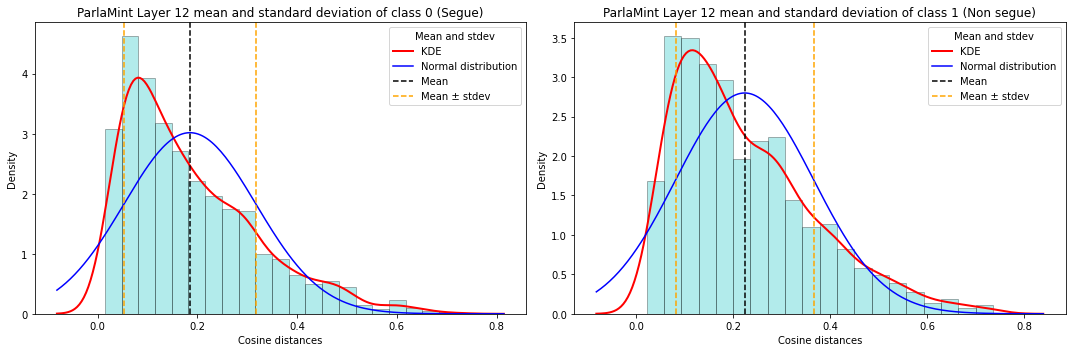

In [41]:
plot_mean_and_stdev(df_random_speech_cosine_distance)

In [42]:
df_cosine_distances_dict['df_dist_5']

{'Cosine_distance_layer_1': {'1': {'Mean': 0.0271, 'Standard Deviation': 0.01},
  '0': {'Mean': 0.0261, 'Standard Deviation': 0.01}},
 'Cosine_distance_layer_2': {'1': {'Mean': 0.0489, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.0481, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_3': {'1': {'Mean': 0.0488, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.048, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_4': {'1': {'Mean': 0.0355, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.0351, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_5': {'1': {'Mean': 0.0407, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.0406, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_6': {'1': {'Mean': 0.0424, 'Standard Deviation': 0.02},
  '0': {'Mean': 0.0425, 'Standard Deviation': 0.02}},
 'Cosine_distance_layer_7': {'1': {'Mean': 0.0471, 'Standard Deviation': 0.03},
  '0': {'Mean': 0.0475, 'Standard Deviation': 0.03}},
 'Cosine_distance_layer_8': {'1': {'Mean': 0.0605, 'Standard De

In [43]:
def plot_distribution_mean_and_sd(df, title, df_name):

    '''
    To apply "hue", seaborn needs the dataframe in "long" form. 
    df.melt() is a pandas function that converts the numeric columns into 2 new columns: 
    - one called "variable" with the old name of the column;
    - one called "value" with the values. 
    The resulting dataframe will be 4 times as long so that "value" can be used for x=, and "variable" for y=
    '''
    figure(figsize=(13, 9), dpi=80)
    df_long = df.melt(id_vars=['Id', 'Class'], value_vars = [col for col in df if 'Cosine' in col])
    print(df_name.title())
    display(df_long)
    ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", \
                     palette="Set2", hue="Class", hue_order =[1, 0])
    handles, labels = ax.get_legend_handles_labels()
    
    plt.tight_layout()
    plt.title(risorsa + " " + df_name + ' Cosine distances distribution')
    plt.show()
    
    figure(figsize=(13, 9), dpi=80)
    sns.barplot(x = "value", y = "variable",data = df_long, ci = "sd", hue='Class', palette="Set2", hue_order =[1, 0])

    plt.tight_layout()
    plt.title(title)
    plt.show()
    
    print()
    print("-------------------------------------------------------------------------------------------------------------------")
    print()

Df_Dist_5


Id  Class                  variable   value
0        3511      1   Cosine_distance_layer_1  0.0389
1      443194      1   Cosine_distance_layer_1  0.0124
2      438394      0   Cosine_distance_layer_1  0.0130
3      313751      1   Cosine_distance_layer_1  0.0559
4      488165      1   Cosine_distance_layer_1  0.0201
...       ...    ...                       ...     ...
28795   35231      0  Cosine_distance_layer_12  0.2281
28796  300044      0  Cosine_distance_layer_12  0.0530
28797   74207      1  Cosine_distance_layer_12  0.3438
28798  390608      1  Cosine_distance_layer_12  0.3227
28799  187838      1  Cosine_distance_layer_12  0.1657

[28800 rows x 4 columns]

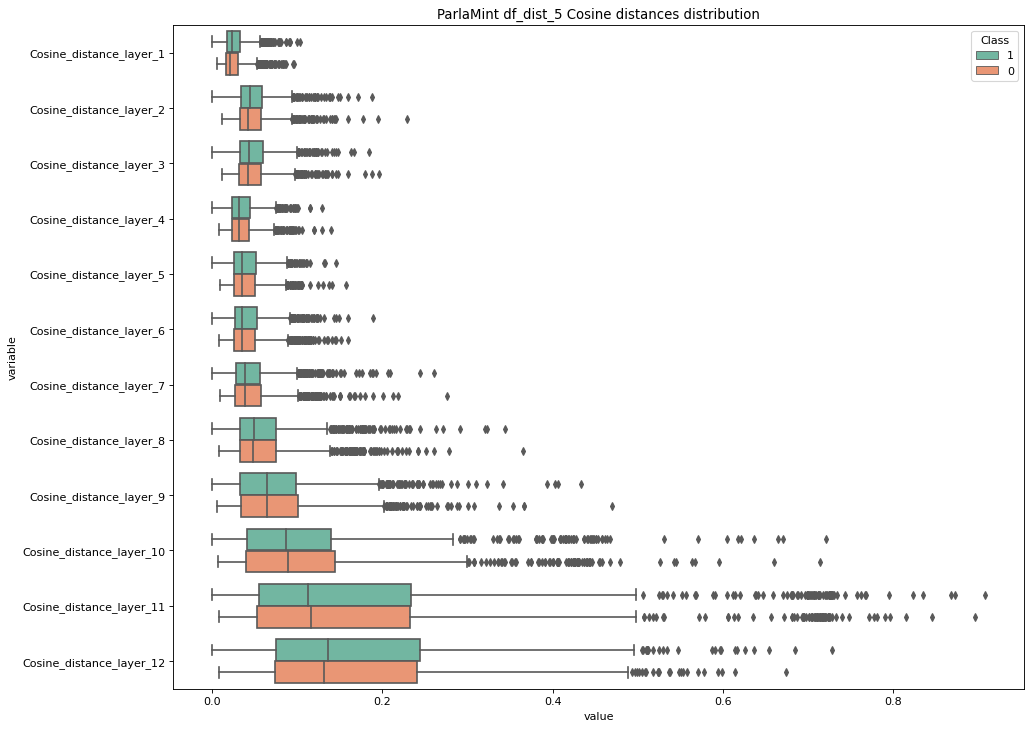

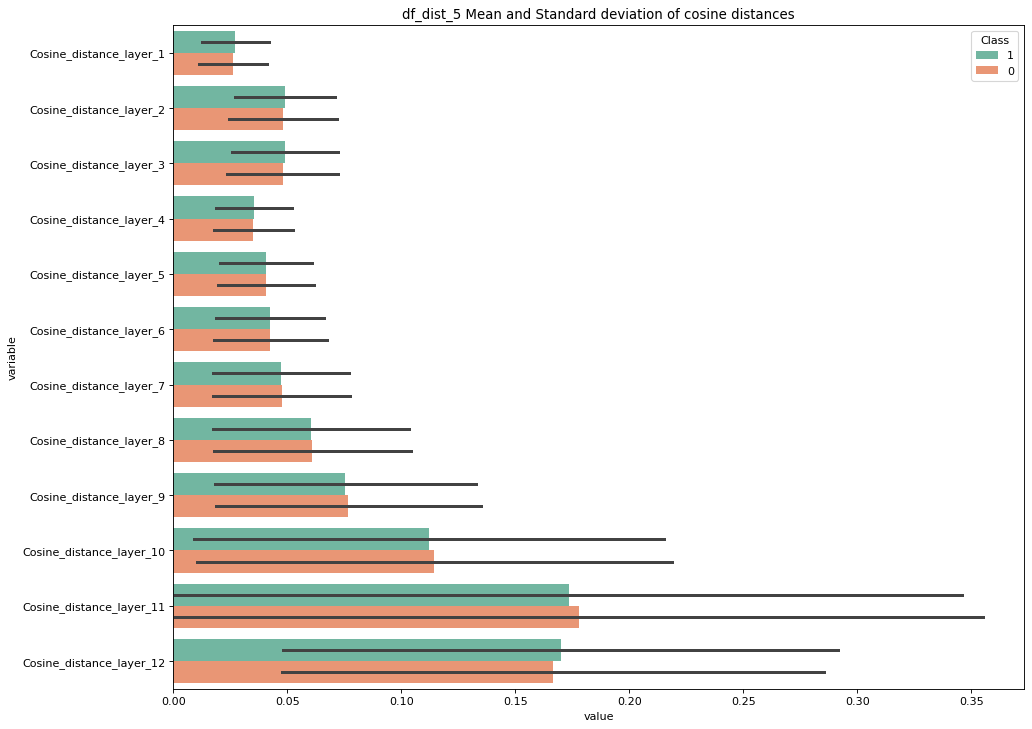


-------------------------------------------------------------------------------------------------------------------

Df_Dist_10


Id  Class                  variable   value
0       14266      1   Cosine_distance_layer_1  0.0262
1      579957      1   Cosine_distance_layer_1  0.0174
2       46520      0   Cosine_distance_layer_1  0.0466
3       58326      0   Cosine_distance_layer_1  0.0152
4      509841      0   Cosine_distance_layer_1  0.0165
...       ...    ...                       ...     ...
28795  716012      1  Cosine_distance_layer_12  0.3262
28796   82687      1  Cosine_distance_layer_12  0.0759
28797  190832      0  Cosine_distance_layer_12  0.2406
28798  435685      1  Cosine_distance_layer_12  0.1356
28799   64616      0  Cosine_distance_layer_12  0.0543

[28800 rows x 4 columns]

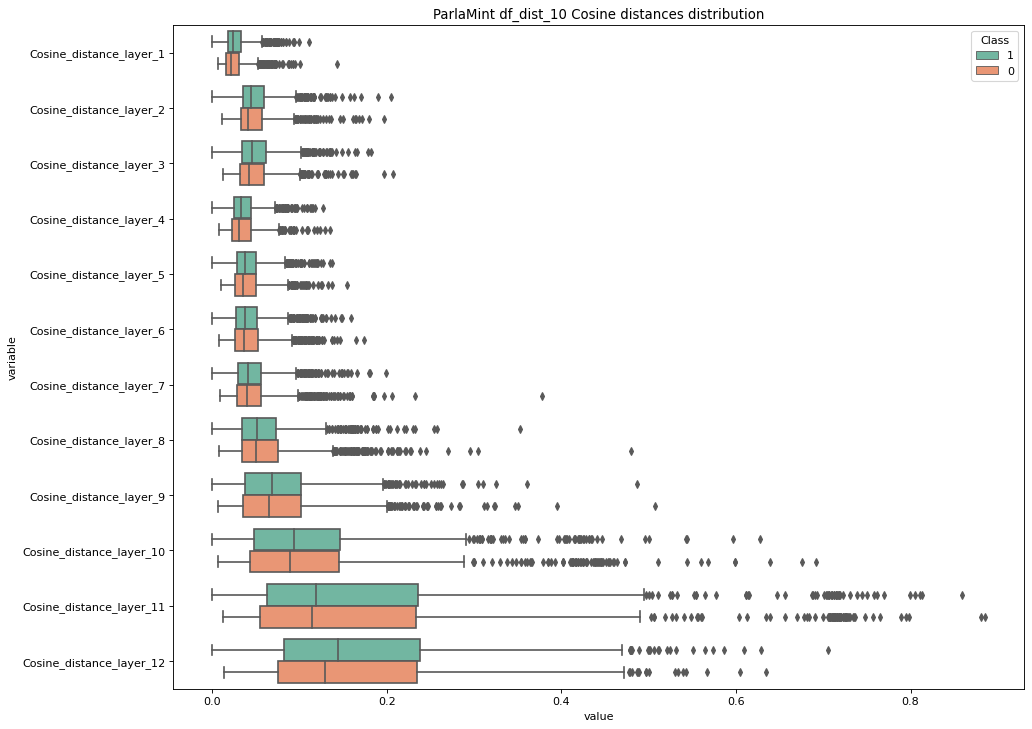

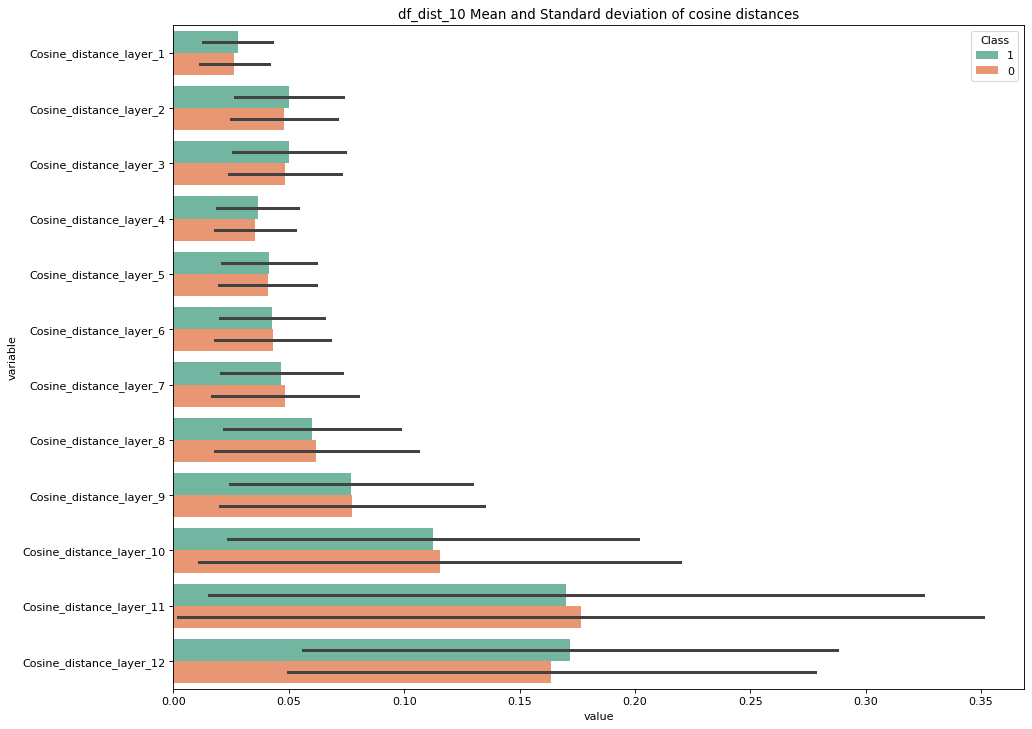


-------------------------------------------------------------------------------------------------------------------

Df_Dist_20


Id  Class                  variable   value
0      872979      0   Cosine_distance_layer_1  0.0258
1      196247      0   Cosine_distance_layer_1  0.0228
2      519084      1   Cosine_distance_layer_1  0.0189
3      651123      1   Cosine_distance_layer_1  0.0315
4      824922      0   Cosine_distance_layer_1  0.0243
...       ...    ...                       ...     ...
28795  523401      1  Cosine_distance_layer_12  0.5753
28796   17750      1  Cosine_distance_layer_12  0.1609
28797  288870      1  Cosine_distance_layer_12  0.2507
28798  451578      0  Cosine_distance_layer_12  0.2714
28799  773832      0  Cosine_distance_layer_12  0.2771

[28800 rows x 4 columns]

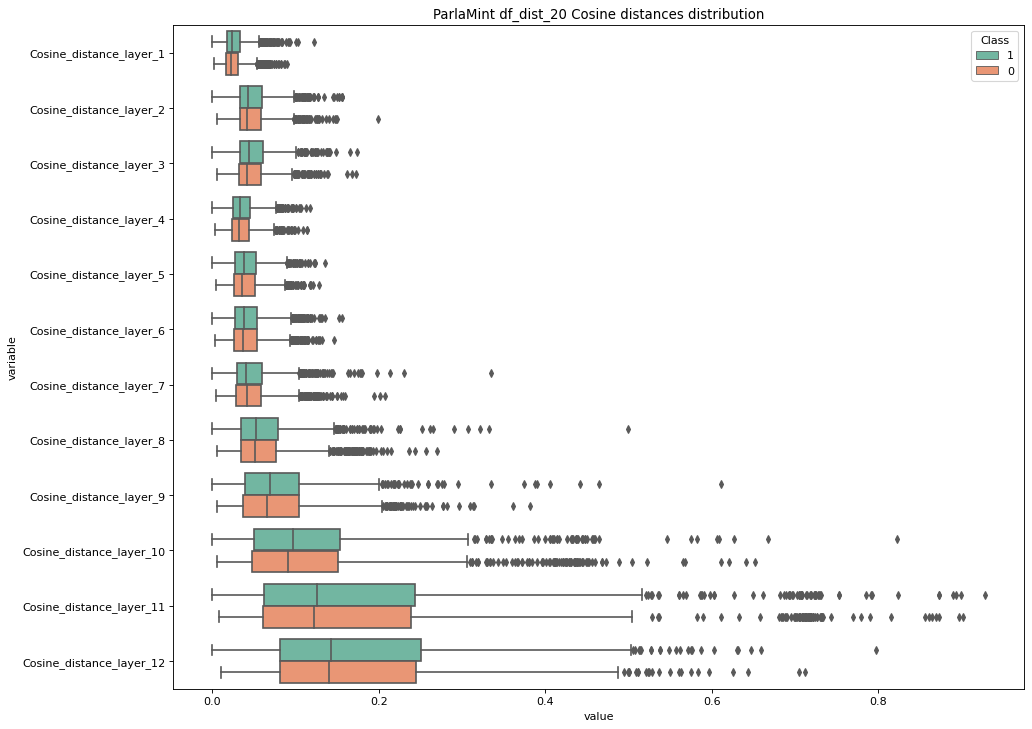

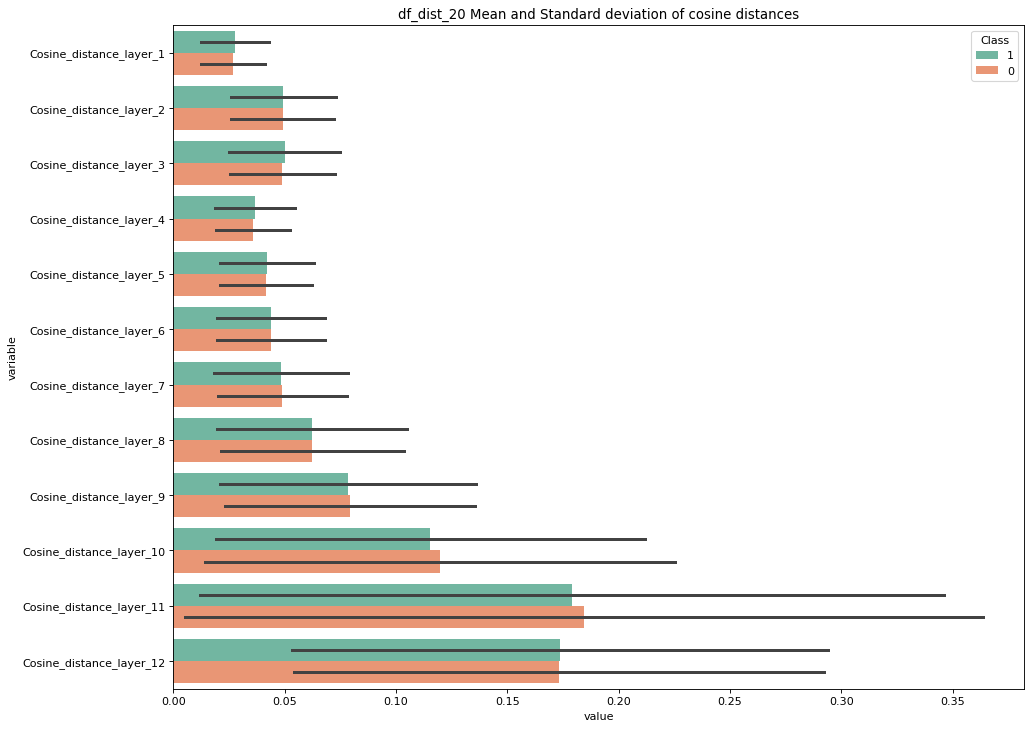


-------------------------------------------------------------------------------------------------------------------

Df_Dist_30


Id  Class                  variable   value
0      752594      0   Cosine_distance_layer_1  0.0154
1      147441      1   Cosine_distance_layer_1  0.0303
2      118812      1   Cosine_distance_layer_1  0.0368
3      396655      0   Cosine_distance_layer_1  0.0279
4      192358      0   Cosine_distance_layer_1  0.0222
...       ...    ...                       ...     ...
28795  419047      0  Cosine_distance_layer_12  0.0729
28796  425997      0  Cosine_distance_layer_12  0.1278
28797  579555      0  Cosine_distance_layer_12  0.2853
28798  398376      1  Cosine_distance_layer_12  0.0352
28799  106289      1  Cosine_distance_layer_12  0.2462

[28800 rows x 4 columns]

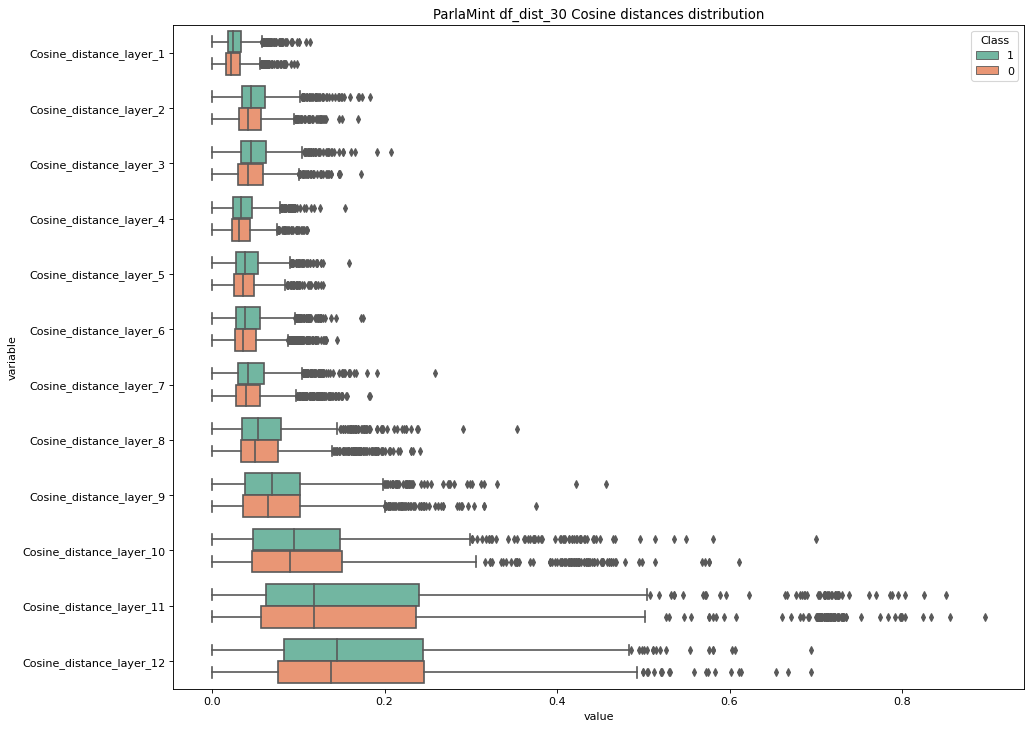

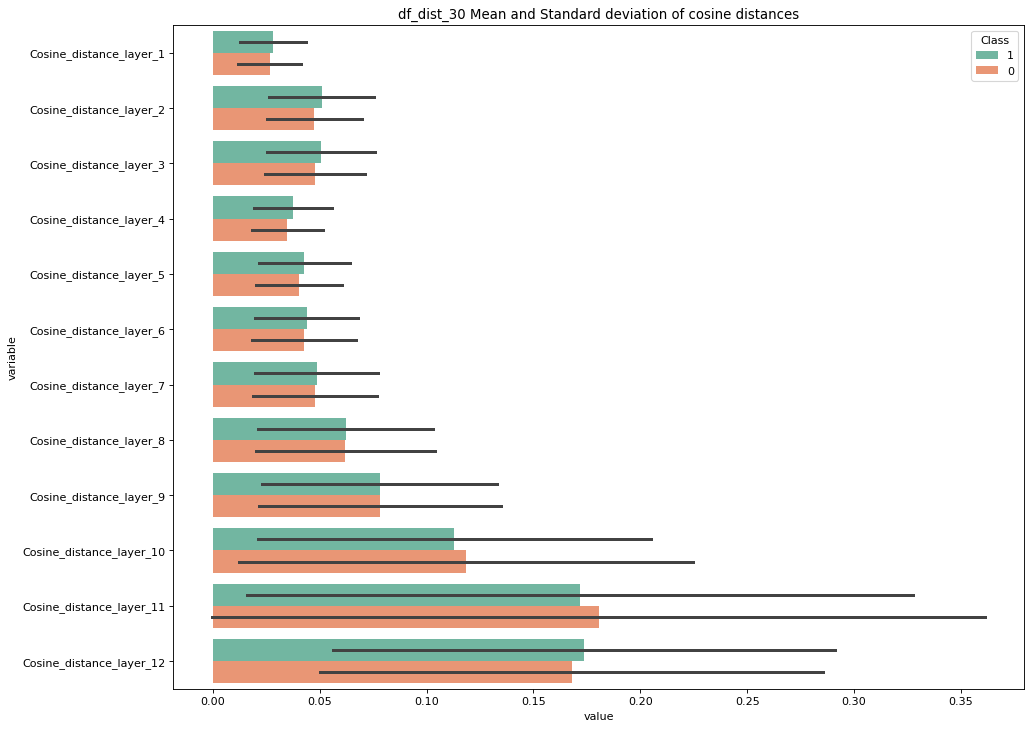


-------------------------------------------------------------------------------------------------------------------

Df_Random_Speech


Id  Class                  variable   value
0      104187      0   Cosine_distance_layer_1  0.0168
1      816288      0   Cosine_distance_layer_1  0.0224
2      794533      0   Cosine_distance_layer_1  0.0187
3       90004      0   Cosine_distance_layer_1  0.0193
4      193562      0   Cosine_distance_layer_1  0.0263
...       ...    ...                       ...     ...
28795  449610      1  Cosine_distance_layer_12  0.3071
28796  770109      1  Cosine_distance_layer_12  0.3819
28797  193789      0  Cosine_distance_layer_12  0.3023
28798  331022      0  Cosine_distance_layer_12  0.4896
28799  552730      1  Cosine_distance_layer_12  0.1550

[28800 rows x 4 columns]

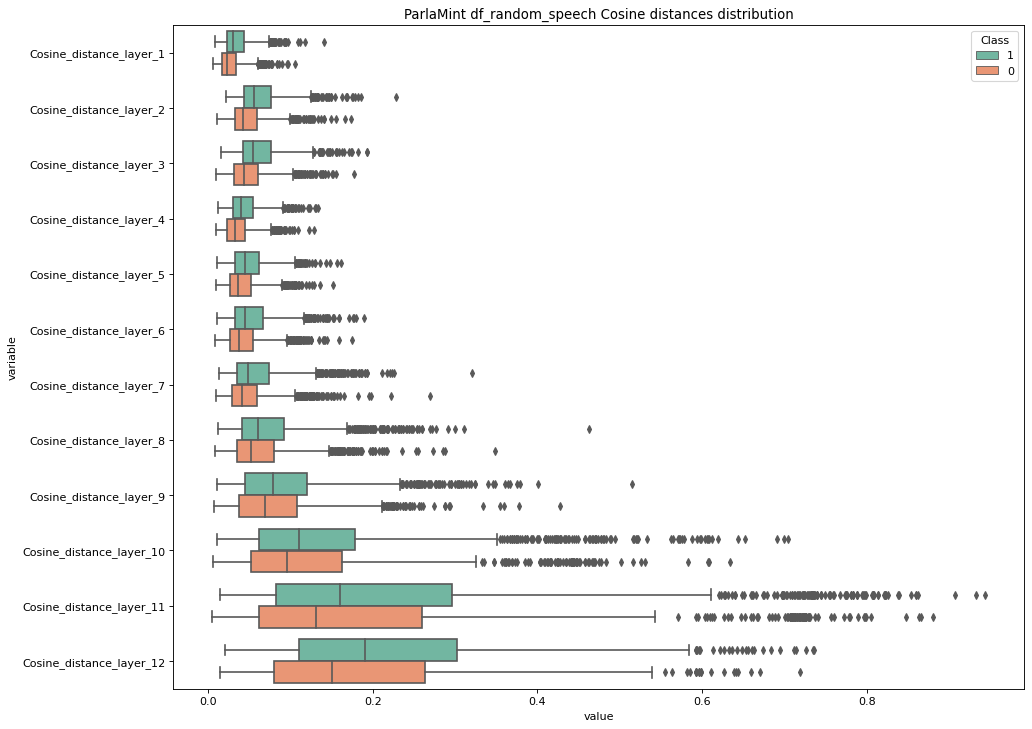

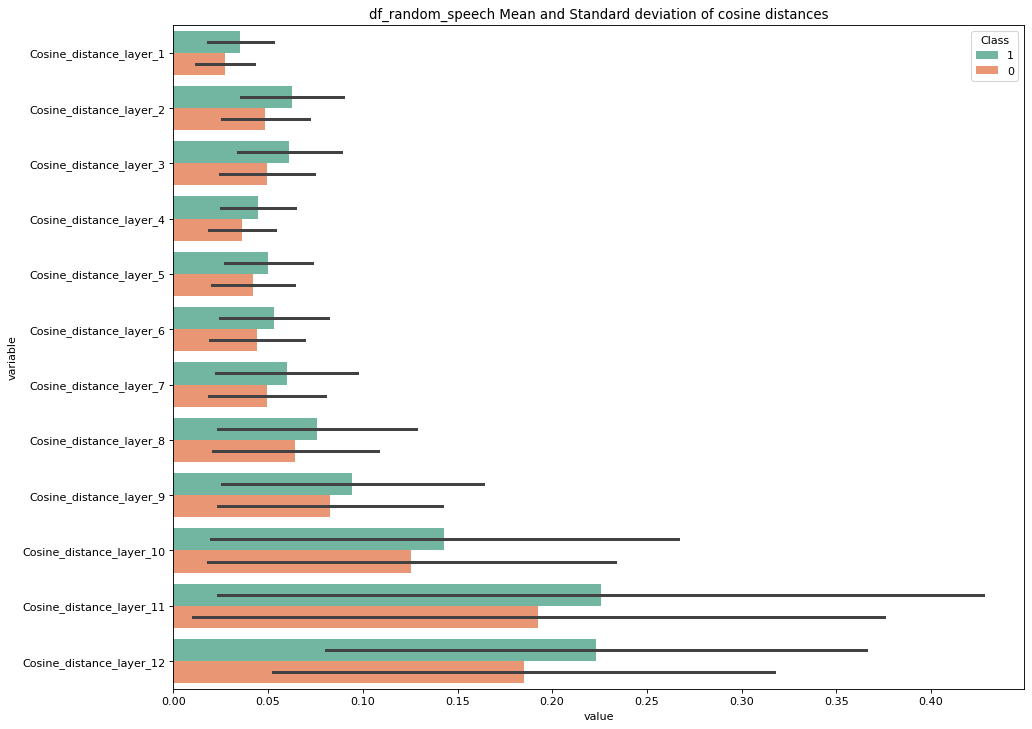


-------------------------------------------------------------------------------------------------------------------



In [44]:
for df, df_name in zip(list_of_df, list_of_names):
    plot_distribution_mean_and_sd(df, df_name + ' Mean and Standard deviation of cosine distances', df_name)